<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions-for-creating-Muller-plots" data-toc-modified-id="Functions-for-creating-Muller-plots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions for creating Muller plots</a></span></li><li><span><a href="#Create-dictionary-of-sample-names,-ages-and-diagnosis-age" data-toc-modified-id="Create-dictionary-of-sample-names,-ages-and-diagnosis-age-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create dictionary of sample names, ages and diagnosis age</a></span></li><li><span><a href="#Evolution-patterns" data-toc-modified-id="Evolution-patterns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evolution patterns</a></span></li><li><span><a href="#Cases-Muller-plots" data-toc-modified-id="Cases-Muller-plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cases Muller plots</a></span><ul class="toc-item"><li><span><a href="#Cases-that-need-midline-shift-of-trajectory" data-toc-modified-id="Cases-that-need-midline-shift-of-trajectory-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cases that need midline shift of trajectory</a></span><ul class="toc-item"><li><span><a href="#C92_034" data-toc-modified-id="C92_034-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>C92_034</a></span></li><li><span><a href="#C92_023" data-toc-modified-id="C92_023-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>C92_023</a></span></li></ul></li><li><span><a href="#Cases-that-do-not-need-midline-shift-of-trajectory" data-toc-modified-id="Cases-that-do-not-need-midline-shift-of-trajectory-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cases that do not need midline shift of trajectory</a></span></li></ul></li><li><span><a href="#Controls-Muller-plots" data-toc-modified-id="Controls-Muller-plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Controls Muller plots</a></span><ul class="toc-item"><li><span><a href="#Controls-that-need-midline-shift-of-trajectory" data-toc-modified-id="Controls-that-need-midline-shift-of-trajectory-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Controls that need midline shift of trajectory</a></span></li><li><span><a href="#Controls-that-do-not-need-midline-shift-of-trajectory" data-toc-modified-id="Controls-that-do-not-need-midline-shift-of-trajectory-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Controls that do not need midline shift of trajectory</a></span></li></ul></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# imported packages
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import ast

In [3]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Helvetica'

In [4]:
# Lists of colors for plots
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [5]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'
yellow = '#ffffd4'

In [6]:
cb_blue1 = '#a6cee3'
cb_blue2 = '#1f78b4'
cb_green1 = '#b2df8a'
cb_green2 = '#33a02c'
cb_pink = '#fb9a99'
cb_red = '#e31a1c'
cb_orange1 = '#fdbf6f'
cb_orange2 = '#ff7f00'
cb_purple1 = '#cab2d6'
cb_purple2 = '#6a3d9a'

In [7]:
mutation_number_colors = {0: [grey2],
                          1: ['#4292c6', '#6baed6', '#9ecae1', '#deebf7', '#08306b'], 
                          2: ['#74c476', '#a1d99b', '#c7e9c0', '#e5f5e0', '#238b45'], 
                          3: ['#feb24c', '#fed976', '#ffeda0', '#ffffcc'], 
                          4: ['#cb181d', '#ef3b2c', '#fb6a4a', '#fc9272', '#791614'], 
                          5: ['#834594', '#520e72'],
                         6: ['#67001f']}

In [8]:
def trajectory_colors(phylogeny):
    phylogeny_colors = {}
    colours_used = {}
    for k, v in phylogeny.items():
        number_of_mutations = v['mutations_in_clone']
        if number_of_mutations in colours_used.keys():
            number_used = colours_used[number_of_mutations]
            color = mutation_number_colors[number_of_mutations][number_used+1]
            colours_used[number_of_mutations]=number_used+1
        else:
            color = mutation_number_colors[number_of_mutations][0]
            colours_used[number_of_mutations]=0
        v_dict = v
        v_dict['variant color']=color
        phylogeny_colors[k]=v_dict
    return phylogeny_colors

In [9]:
def trajectory_colors_only_change_1_2_3(phylogeny):
    phylogeny_colors = {}
    colours_used = {}
    for k, v in phylogeny.items():
        number_of_mutations = v['mutations_in_clone']
        if number_of_mutations in [1, 2, 3]:
            if number_of_mutations in colours_used.keys():
                number_used = colours_used[number_of_mutations]
                color = mutation_number_colors[number_of_mutations][number_used+1]
                colours_used[number_of_mutations]=number_used+1
            else:
                color = mutation_number_colors[number_of_mutations][0]
                colours_used[number_of_mutations]=0
            v_dict = v
            v_dict['variant color']=color
            phylogeny_colors[k]=v_dict
        else:
            v_dict = v
            phylogeny_colors[k]=v_dict
    return phylogeny_colors

In [10]:
def trajectory_colors_non_change_3(phylogeny):
    phylogeny_colors = {}
    colours_used = {}
    for k, v in phylogeny.items():
        number_of_mutations = v['mutations_in_clone']
        if number_of_mutations !=3:
            if number_of_mutations in colours_used.keys():
                number_used = colours_used[number_of_mutations]
                color = mutation_number_colors[number_of_mutations][number_used+1]
                colours_used[number_of_mutations]=number_used+1
            else:
                color = mutation_number_colors[number_of_mutations][0]
                colours_used[number_of_mutations]=0
            v_dict = v
            v_dict['variant color']=color
            phylogeny_colors[k]=v_dict
        else:
            v_dict = v
            phylogeny_colors[k]=v_dict
    return phylogeny_colors

# Functions for creating Muller plots

- Using phylogeny csv files generated from 'Acquisition age fitness inference' code, e.g. 'C92_003_phylogenies_without_missing_drivers_for_muller_v14.csv'
- Some muller plots require subsequent trajectory position adjustment in Adobe Illustrator (e.g. if overlapping on plot).

In [11]:
def convert_to_list(column):
    new_list = ast.literal_eval(column)
    return new_list

In [12]:
def retrieve_phylogeny(sample_name):
    df = pd.read_csv('Data_files/Phylogeny_csvs/'+sample_name+'_phylogenies_without_missing_drivers_for_muller_v14.csv', 
                     header = 0, 
                     names= ['mutation', 'parent', 'siblings', 'descendents', 'parent_descendents', 'mutations_in_clone', 
                             'cell_fractions', 'age first detected', 'max cell fraction', 'variant color'])
    df['cell_fractions'] = df['cell_fractions'].apply(convert_to_list)
    df['siblings'] = df['siblings'].apply(convert_to_list)
    df['descendents'] = df['descendents'].apply(convert_to_list)
    df['parent'] = df['parent'].fillna("")
    df = df.set_index('mutation')
    df = df.sort_values(by=['mutations_in_clone', 'age first detected'], ascending=True)
    phylogeny = pd.DataFrame.to_dict(df, orient = 'index')
    return phylogeny

In [13]:
def add_midline_shift(phylogeny, shift_list): #[0, 0, 0, 0, 0] in the order of the variants in the phylogeny
    n=0
    phylogeny_midline_shift = {}
    for k, v in phylogeny.items():
        v_dict = v
        v_dict['midline_shift']=shift_list[n]
        phylogeny_midline_shift[k]=v_dict
        n+=1
    return phylogeny_midline_shift

In [14]:
def cell_fraction_timepoints(phylogeny, ages):
    timepoints = {}
    for k, v in phylogeny.items():
        timepoint_cell_fractions = {}
        for age, cell_fraction in zip(ages, v['cell_fractions']):
            timepoint_cell_fractions[age]=cell_fraction
        timepoints[k]=timepoint_cell_fractions
    return timepoints

In [15]:
def Muller_plot_v3_muller_colours(timepoints, phylogeny, sample_name, diagnosis_age):
    fig, ax1 = plt.subplots(1, 1, figsize = (20, 5.6))

    #Plot setup
    for axis in ['top','right']:
        ax1.spines[axis].set_visible(False)  
    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)
        ax1.spines[axis].set_color(grey3)
    ax1.set_ylim(0, 100)
    ax1.set_xlabel('age', fontsize = 18)
    plt.xticks(fontsize = 18)

    sibling_present = {}
    lines_plotted = {}
    descendents_shifted = {}
    
    timepoints_undetectable = {}

    helvetica_5 = 26
    helvetica_6 = 30
    
    for k, v in timepoints.items():
#         print('variant = ', k)
        parent = phylogeny[k]['parent'] #what the parent clone is
#         colour = phylogeny[k]['colour']
        colour = phylogeny[k]['variant color']
        descendents = phylogeny[k]['descendents'] #what the descendents of the clone are
        parent_descendents = phylogeny[k]['parent_descendents'] #how many ancestor clones it's parent clone has
        midline_shift = phylogeny[k]['midline_shift']
        list_of_siblings = phylogeny[k]['siblings']
        number_siblings= len(list_of_siblings)
        number_mutations = phylogeny[k]['mutations_in_clone']
        top_line = []
        bottom_line = []
        midlines = []
        ages = []

        if (k != 'stem cells') and (parent != 'stem cells'):
            if parent in sibling_present.keys(): #look to see if the other clone from the parent is already plotted
                number_of_siblings_already_plotted = sibling_present[parent]
            else:
                number_of_siblings_already_plotted = 0
            
            position_parent_not_zero=[]
            j=0
            for top_pos in lines_plotted[parent][0]: #the top line positions plotted for the parent - want to find the first one that isn't zero
                if np.isnan(top_pos):
#                     print('parent top = np.nan')
                    parentisnantop=0 #just something to write in the if loop
                else:
#                     print('parent top is not nan at =', j)
                    position_parent_not_zero.append(j)
                j+=1
                
            first_position_parent_not_zero = position_parent_not_zero[0]

            parent_top = lines_plotted[parent][0][first_position_parent_not_zero]
            parent_bottom = lines_plotted[parent][1][first_position_parent_not_zero]
            #find the y-axis value to start the clonal trajectory from...
            
            center_line = parent_top-(((parent_top-parent_bottom)/(parent_descendents+1))*(number_of_siblings_already_plotted+1))

            if parent in sibling_present.keys(): #record that the offspring of one of the parents has been plotted
                sibling_present[parent]+=1
            else:
                sibling_present[parent]=1

        n=0
#         print(v)
        for age, cell_fraction in v.items():
            if cell_fraction==0:
                if k in timepoints_undetectable.keys():
                    timepoints_undetectable[k].append(age)
                else:
                    timepoints_undetectable[k]=[age]
#             print()
#             print('age = ', age)
            if (k != 'stem cells') and (parent != 'stem cells'):
                ages.append(age)
                descendents_cell_fraction = 0

                if len(descendents)>0: #add the cell fraction of the descendents at that time point to it's cell fraction
                    for i in descendents:
                        ancestor_cell_fraction = timepoints[i][age]
                        if np.isnan(ancestor_cell_fraction):
                            ancestor_cell_fraction = 0
                        descendents_cell_fraction+=ancestor_cell_fraction

                top = center_line+midline_shift+((cell_fraction+descendents_cell_fraction)/2)
                bottom = center_line+midline_shift-((cell_fraction+descendents_cell_fraction)/2)

                parent_top = lines_plotted[parent][0][n]
                parent_bottom = lines_plotted[parent][1][n]
                parent_midpoint = lines_plotted[parent][2][n]

                if np.isnan(parent_top):
                    parent_top = np.nan
                else: #if the top isn't nan
                    if (top > parent_top) or (bottom < parent_bottom):
                        top = parent_midpoint+((cell_fraction+descendents_cell_fraction)/2)
                        bottom = parent_midpoint-((cell_fraction+descendents_cell_fraction)/2)

                for sibling in list_of_siblings:
                    if sibling in lines_plotted.keys():
                        sibling_bottom = lines_plotted[sibling][1][n]
                        if sibling_bottom<top:#if the clone already plotted above is extending below where the top would be plotted....
                            difference = top-sibling_bottom
                            midline_shift = midline_shift-difference
                            top = top-difference
                            bottom = bottom-difference
                            if k in descendents_shifted.keys():
                                descendents_shifted[k][age]=difference
                            else:
                                descendents_shifted[k]={}
                                descendents_shifted[k][age]=difference

                if top ==center_line+midline_shift:
                    top = np.nan
                if bottom == center_line+midline_shift:
                    bottom = np.nan

                top_line.append(top)
                bottom_line.append(bottom)
                midlines.append(center_line+midline_shift)

            if k == 'stem cells':
                ages.append(age)
                top_line.append(100)
                bottom_line.append(0)
                midlines.append(50)

            if parent == 'stem cells':
#                 print('parent = stem cells')
                ages.append(age)
                cell_fraction = timepoints[k][age]

                midpoints_for_all_siblings = list(np.linspace(100/(number_siblings+2), 100-(100/(number_siblings+2)), number_siblings+1))
                midpoints_for_all_siblings = midpoints_for_all_siblings[::-1]
#                 print('midlines for all siblings = ', midpoints_for_all_siblings)

                number_of_siblings_plotted = 0
                for i in list_of_siblings:
                    if i in lines_plotted.keys():
                        number_of_siblings_plotted+=1

                descendents_cell_fraction = 0
                if len(descendents)>0: #add the cell fraction of the descendents at that time point to it's cell fraction
                    for i in descendents:
                        ancestor_cell_fraction = timepoints[i][age]
                        descendents_cell_fraction+=ancestor_cell_fraction

                total_cell_fraction = cell_fraction+descendents_cell_fraction

                midline = midpoints_for_all_siblings[number_of_siblings_plotted]

                top_line.append(midline+midline_shift+total_cell_fraction/2)
                bottom_line.append(midline+midline_shift-total_cell_fraction/2)
                midlines.append(midline+midline_shift)

            n+=1

        lines_plotted[k]=(top_line, bottom_line, midlines)

        ages2 = []
        top_line2 = []
        bottom_line2 = []

        if (number_mutations==1) and (len(descendents)==0) and (k in timepoints_undetectable.keys()):
            print(k+' has 1 mutation and no descendents')
            undetectable_timepoints = timepoints_undetectable[k]
            print('undetectable timepoints = ', undetectable_timepoints)
            for age, top, bottom in zip(ages, top_line, bottom_line):
                if np.isnan(top) == False:
                    if age not in undetectable_timepoints:
                        if top != bottom:
                            ages2.append(age)
                            top_line2.append(top)
                            bottom_line2.append(bottom)
        else:
            for age, top, bottom in zip(ages, top_line, bottom_line):
                if np.isnan(top) == False:
                    if top != bottom:
                        ages2.append(age)
                        top_line2.append(top)
                        bottom_line2.append(bottom)
                        
        xlimits = ax1.get_xlim()
        xmin = xlimits[0]
        xmax = xlimits[1]
        thick_line = 0.0075*(xmax-xmin) #so line thickness of single timepoint mutation will be same across plots
#         print('thick line = ', thick_line)
                    
        if len(ages2)>1:
            ax1.plot(ages2, top_line2, color = 'white', lw = 2)
            ax1.plot(ages2, bottom_line2, color = 'white', lw = 2)
            ax1.fill_between(ages2, top_line2, bottom_line2, color=colour, label = k)
        else:
            print(k+' only present at one age') #make the line thicker so easier to see
            ages = [ages2[0]-thick_line, ages2[0]]
            ax1.plot(ages, [top_line2[0], top_line2[0]] , color = 'white', lw = 2)
            ax1.plot(ages, [bottom_line2[0], bottom_line2[0]], color = 'white', lw = 2)
            ax1.fill_between(ages, [top_line2[0], top_line2[0]], [bottom_line2[0], bottom_line2[0]], color=colour, label = k)

    ax1.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), fontsize = 16)

    #plot diagnosis age
    ax1.plot([diagnosis_age, diagnosis_age], [0, 100], color = '#333333', lw = 4, linestyle = '--', zorder = 150)
    for time in ages_list:
        ax1.plot([time, time], [0, 100], color = '#f7f7f7', lw = 3, linestyle = ':', alpha = 1.0, zorder = 50)  

    ax1.set_yticks([])
    ax1.yaxis.set_minor_locator(MultipleLocator(25))
    y_major_ticks = [0, 100]
    y_major_tick_labels = ["0", "100"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels)
    
    xlimits = ax1.get_xlim()
    xmin = xlimits[0]
    xmax = xlimits[1]
    ax1.fill_between([xmin, xmax], [0, 0], [100, 100], color = grey1, zorder = 0)
    ax1.set_xlim(xmin, xmax)
    
    ax1.set_xlabel('age', fontsize = helvetica_6)
    ax1.set_ylabel('fraction of cells (%)', fontsize = helvetica_6, labelpad = -55)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(axis = 'both', which='major', length=6, width=1.5, color = '#969696', labelsize=helvetica_6)
    ax1.tick_params(axis = 'y', which='minor', length=6, width=1.5, color = '#969696', labelsize=helvetica_6)
    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)
        ax1.spines[axis].set_color('#969696')
        
    if sample_name in linear_evolution:
        evolution_pattern = 'linear evolution'
    elif sample_name in clonal_interference:
        evolution_pattern = 'clonal interference'
    elif sample_name in late_evolution:
        evolution_pattern = 'late evolution'
    elif sample_name in linear_late_evolution:
        evolution_pattern = 'linear/ late evolution'
    else:
        evolution_pattern = ''
    
#     ax1.text(1.02, 0.02, evolution_pattern, transform=ax1.transAxes, fontsize = helvetica_5, color = grey4, zorder = 10, rotation = 90, rotation_mode = 'anchor')
    ax1.text(0.99, 0.02, sample_name+': ', transform=ax1.transAxes, fontsize = helvetica_5, color = grey4, zorder = 10, rotation = 90, rotation_mode = 'anchor')
    
#     ax1.text(0.99, 0.02, sample_name, transform=ax1.transAxes, fontsize = helvetica_5, color = grey4, zorder = 10, rotation = 90, rotation_mode = 'anchor')
    
    plt.tight_layout()
#     plt.savefig('Figures_for_paper/Muller_plots/'+sample_name+'_muller_plot.pdf', bbox_inches='tight')

    return plt.show()

In [16]:
def Muller_plot_v3_muller_colours_no_legend(timepoints, phylogeny, sample_name, diagnosis_age):
    fig, ax1 = plt.subplots(1, 1, figsize = (19.7, 6.5))

    #Plot setup
    for axis in ['top','right']:
        ax1.spines[axis].set_visible(False)  
    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)
        ax1.spines[axis].set_color(grey3)
    ax1.set_ylim(0, 100)
    ax1.set_xlabel('age', fontsize = 18)
    plt.xticks(fontsize = 18)

    sibling_present = {}
    lines_plotted = {}
    descendents_shifted = {}
    
    timepoints_undetectable = {}

    helvetica_4 = 25
    helvetica_5 = 29
    helvetica_6 = 35
    
    for k, v in timepoints.items():
#         print('variant = ', k)
        parent = phylogeny[k]['parent'] #what the parent clone is
#         colour = phylogeny[k]['colour']
        colour = phylogeny[k]['variant color']
        descendents = phylogeny[k]['descendents'] #what the descendents of the clone are
        parent_descendents = phylogeny[k]['parent_descendents'] #how many ancestor clones it's parent clone has
        midline_shift = phylogeny[k]['midline_shift']
        list_of_siblings = phylogeny[k]['siblings']
        number_siblings= len(list_of_siblings)
        number_mutations = phylogeny[k]['mutations_in_clone']
        top_line = []
        bottom_line = []
        midlines = []
        ages = []

        if (k != 'stem cells') and (parent != 'stem cells'):
            if parent in sibling_present.keys(): #look to see if the other clone from the parent is already plotted
                number_of_siblings_already_plotted = sibling_present[parent]
            else:
                number_of_siblings_already_plotted = 0
            
            position_parent_not_zero=[]
            j=0
            for top_pos in lines_plotted[parent][0]: #the top line positions plotted for the parent - want to find the first one that isn't zero
                if np.isnan(top_pos):
#                     print('parent top = np.nan')
                    parentisnantop=0 #just something to write in the if loop
                else:
#                     print('parent top is not nan at =', j)
                    position_parent_not_zero.append(j)
                j+=1
                
            first_position_parent_not_zero = position_parent_not_zero[0]

            parent_top = lines_plotted[parent][0][first_position_parent_not_zero]
            parent_bottom = lines_plotted[parent][1][first_position_parent_not_zero]
            #find the y-axis value to start the clonal trajectory from...
            
            center_line = parent_top-(((parent_top-parent_bottom)/(parent_descendents+1))*(number_of_siblings_already_plotted+1))

            if parent in sibling_present.keys(): #record that the offspring of one of the parents has been plotted
                sibling_present[parent]+=1
            else:
                sibling_present[parent]=1

        n=0
#         print(v)
        for age, cell_fraction in v.items():
            if cell_fraction==0:
                if k in timepoints_undetectable.keys():
                    timepoints_undetectable[k].append(age)
                else:
                    timepoints_undetectable[k]=[age]
#             print()
#             print('age = ', age)
            if (k != 'stem cells') and (parent != 'stem cells'):
                ages.append(age)
                descendents_cell_fraction = 0

                if len(descendents)>0: #add the cell fraction of the descendents at that time point to it's cell fraction
                    for i in descendents:
                        ancestor_cell_fraction = timepoints[i][age]
                        if np.isnan(ancestor_cell_fraction):
                            ancestor_cell_fraction = 0
                        descendents_cell_fraction+=ancestor_cell_fraction

                top = center_line+midline_shift+((cell_fraction+descendents_cell_fraction)/2)
                bottom = center_line+midline_shift-((cell_fraction+descendents_cell_fraction)/2)

                parent_top = lines_plotted[parent][0][n]
                parent_bottom = lines_plotted[parent][1][n]
                parent_midpoint = lines_plotted[parent][2][n]

                if np.isnan(parent_top):
                    parent_top = np.nan
                else: #if the top isn't nan
                    if (top > parent_top) or (bottom < parent_bottom):
                        top = parent_midpoint+((cell_fraction+descendents_cell_fraction)/2)
                        bottom = parent_midpoint-((cell_fraction+descendents_cell_fraction)/2)

                for sibling in list_of_siblings:
                    if sibling in lines_plotted.keys():
                        sibling_bottom = lines_plotted[sibling][1][n]
                        if sibling_bottom<top:#if the clone already plotted above is extending below where the top would be plotted....
                            difference = top-sibling_bottom
                            midline_shift = midline_shift-difference
                            top = top-difference
                            bottom = bottom-difference
                            if k in descendents_shifted.keys():
                                descendents_shifted[k][age]=difference
                            else:
                                descendents_shifted[k]={}
                                descendents_shifted[k][age]=difference

                if top ==center_line+midline_shift:
                    top = np.nan
                if bottom == center_line+midline_shift:
                    bottom = np.nan

                top_line.append(top)
                bottom_line.append(bottom)
                midlines.append(center_line+midline_shift)

            if k == 'stem cells':
                ages.append(age)
                top_line.append(100)
                bottom_line.append(0)
                midlines.append(50)

            if parent == 'stem cells':
#                 print('parent = stem cells')
                ages.append(age)
                cell_fraction = timepoints[k][age]

                midpoints_for_all_siblings = list(np.linspace(100/(number_siblings+2), 100-(100/(number_siblings+2)), number_siblings+1))
                midpoints_for_all_siblings = midpoints_for_all_siblings[::-1]
#                 print('midlines for all siblings = ', midpoints_for_all_siblings)

                number_of_siblings_plotted = 0
                for i in list_of_siblings:
                    if i in lines_plotted.keys():
                        number_of_siblings_plotted+=1

                descendents_cell_fraction = 0
                if len(descendents)>0: #add the cell fraction of the descendents at that time point to it's cell fraction
                    for i in descendents:
                        ancestor_cell_fraction = timepoints[i][age]
                        descendents_cell_fraction+=ancestor_cell_fraction

                total_cell_fraction = cell_fraction+descendents_cell_fraction

                midline = midpoints_for_all_siblings[number_of_siblings_plotted]

                top_line.append(midline+midline_shift+total_cell_fraction/2)
                bottom_line.append(midline+midline_shift-total_cell_fraction/2)
                midlines.append(midline+midline_shift)

            n+=1

        lines_plotted[k]=(top_line, bottom_line, midlines)

        ages2 = []
        top_line2 = []
        bottom_line2 = []
        
#         print('timepoints undetectable = ', timepoints_undetectable)
#         print('ages = ', ages)
#         print('top = ', top_line)
#         print('bottom = ', bottom_line)

        if (number_mutations==1) and (len(descendents)==0) and (k in timepoints_undetectable.keys()):
            print(k+' has 1 mutation and no descendents')
            undetectable_timepoints = timepoints_undetectable[k]
            print('undetectable timepoints = ', undetectable_timepoints)
            for age, top, bottom in zip(ages, top_line, bottom_line):
                if np.isnan(top) == False:
                    if age not in undetectable_timepoints:
                        if top != bottom:
                            ages2.append(age)
                            top_line2.append(top)
                            bottom_line2.append(bottom)
        else:
            for age, top, bottom in zip(ages, top_line, bottom_line):
                if np.isnan(top) == False:
                    if top != bottom:
                        ages2.append(age)
                        top_line2.append(top)
                        bottom_line2.append(bottom)
                        
        xlimits = ax1.get_xlim()
        xmin = xlimits[0]
        xmax = xlimits[1]
        thick_line = 0.0075*(xmax-xmin) #so line thickness of single timepoint mutation will be same across plots
#         print('thick line = ', thick_line)
                    
        if len(ages2)>1:
            ax1.plot(ages2, top_line2, color = 'white', lw = 2)
            ax1.plot(ages2, bottom_line2, color = 'white', lw = 2)
            ax1.fill_between(ages2, top_line2, bottom_line2, color=colour, label = k)
        else:
            print(k+' only present at one age') #make the line thicker so easier to see
            ages = [ages2[0]-thick_line, ages2[0]]
            ax1.plot(ages, [top_line2[0], top_line2[0]] , color = 'white', lw = 2)
            ax1.plot(ages, [bottom_line2[0], bottom_line2[0]], color = 'white', lw = 2)
            ax1.fill_between(ages, [top_line2[0], top_line2[0]], [bottom_line2[0], bottom_line2[0]], color=colour, label = k)

#     ax1.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), fontsize = 16)

    #plot diagnosis age
    ax1.plot([diagnosis_age, diagnosis_age], [0, 100], color = '#333333', lw = 4, linestyle = '--', zorder = 150)
    for time in ages_list:
        ax1.plot([time, time], [0, 100], color = '#f7f7f7', lw = 3, linestyle = ':', alpha = 1.0, zorder = 50)  

    ax1.set_yticks([])
    ax1.yaxis.set_minor_locator(MultipleLocator(25))
    y_major_ticks = [0, 100]
    y_major_tick_labels = ["0", "100"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels)
    
    xlimits = ax1.get_xlim()
    xmin = xlimits[0]
    xmax = xlimits[1]
    ax1.fill_between([xmin, xmax], [0, 0], [100, 100], color = grey1, zorder = 0)
    ax1.set_xlim(xmin, xmax)
    
    ax1.set_xlabel('age', fontsize = helvetica_6)
    ax1.set_ylabel('fraction of cells (%)', fontsize = helvetica_6, labelpad = -55)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(axis = 'both', which='major', length=6, width=2, color = '#969696', labelsize=helvetica_6)
    ax1.tick_params(axis = 'y', which='minor', length=6, width=2, color = '#969696', labelsize=helvetica_6)
    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(2)
        ax1.spines[axis].set_color('#969696')
        
    if sample_name in linear_evolution:
        evolution_pattern = 'linear evolution'
    elif sample_name in clonal_interference:
        evolution_pattern = 'clonal interference'
    elif sample_name in late_evolution:
        evolution_pattern = 'late evolution'
    elif sample_name in linear_late_evolution:
        evolution_pattern = 'linear/ late evolution'
    else:
        evolution_pattern = ''
    
#     ax1.text(1.02, 0.02, evolution_pattern, transform=ax1.transAxes, fontsize = helvetica_5, color = grey4, zorder = 10, rotation = 90, rotation_mode = 'anchor')
    ax1.text(0.99, 0.02, sample_name+': ', transform=ax1.transAxes, fontsize = helvetica_5, color = grey4, zorder = 10, rotation = 90, rotation_mode = 'anchor')
    if 'C92' in sample_name:
        ax1.text(0.99, 0.40, evolution_pattern, transform=ax1.transAxes, fontsize = helvetica_4, ha = 'left', color = grey4, zorder = 10, rotation = 90, rotation_mode = 'anchor')
    if 'CNTRL' in sample_name:
        if evolution_pattern == 'clonal interference':
            ax1.text(0.99, 0.525, 'clonal\n interference', transform=ax1.transAxes, fontsize = helvetica_4, ha = 'left', color = grey4, zorder = 10, rotation = 90, rotation_mode = 'anchor')
        else:
            ax1.text(0.99, 0.525, evolution_pattern, transform=ax1.transAxes, fontsize = helvetica_4, ha = 'left', color = grey4, zorder = 10, rotation = 90, rotation_mode = 'anchor')
    
#     ax1.text(0.99, 0.02, sample_name, transform=ax1.transAxes, fontsize = helvetica_5, color = grey4, zorder = 10, rotation = 90, rotation_mode = 'anchor')
    
    plt.tight_layout()
#     plt.savefig('Figures_for_paper/Muller_plots/'+sample_name+'_muller_plot_no_legend.pdf', bbox_inches='tight')

    return plt.show()

# Create dictionary of sample names, ages and diagnosis age

In [17]:
#create a dictionary of the sample details
cases = {} #e.g. {'C92_002': ['C92_002_s1', 'C92_002_s2', 'C92_002_s3', 'C92_002_s4'....]}
controls = {} #e.g. {'CNTRL_001': ['CNTRL_001_s1', 'CNTRL_001_s10', 'CNTRL_001_s2'...]}
cases_and_controls = {}
sample_ages = {} #e.g. {'C92_002_s1': 73.73, 'C92_002_s2': 75.0, 'C92_002_s3': 75.83...}
sample_diagnosis_age = {} #e.g. {'C92_002': 81.1, 'C92_003': 75.21, 'C92_005': 70.09...}
sample_DNA_amount = {} #e.g. {'C92_002_s1': '45', 'C92_002_s2': '50', 'C92_002_s3': '50'...}
matched_sample = {} #e.g. {'C92_002': 'CNTRL_169', 'C92_003': 'CNTRL_002'...}

with open('Data_files/UKCTOCS_samples_processed_information.csv') as csvfile:
    readreader = csv.reader(csvfile)
    row_count=0
    for row in readreader:
        if row_count>0:
            sample_name = row[1].split('_')[0]+'_'+row[1].split('_')[1]
            timepoint = row[1]
            sample_ages[timepoint]=float(row[6])
            sample_DNA_amount[timepoint]=row[2]
            if row[7]!='':
                if '_' in row[7]:
                    matched_sample_name = row[7].split('_')[0]+'_'+row[7].split('_')[1]
                    matched_sample[sample_name]=matched_sample_name
                    
            if sample_name in cases_and_controls.keys():
                cases_and_controls[sample_name].append(timepoint)
            else:
                cases_and_controls[sample_name]=[timepoint]
                    
            if row[0]=='Case':
                if sample_name in cases.keys():
                    cases[sample_name].append(timepoint)
                else:
                    cases[sample_name]=[timepoint]
                    
                sample_diagnosis_age[sample_name]=float(row[5])
                
            if row[0]=='Control':
                if sample_name in controls.keys():
                    controls[sample_name].append(timepoint)
                else:
                    controls[sample_name]=[timepoint]
                if sample_name in matched_sample.keys():
                    sample_diagnosis_age[sample_name]=sample_diagnosis_age[matched_sample[sample_name]]

        row_count+=1
        
cases_and_controls_sorted = {}
for k, v in cases_and_controls.items():
    ages_sorted = []
    for i in v:
        timepoint_number = int(i.split('_')[2][1:])
        ages_sorted.append((timepoint_number, i))
    sorted_v = sorted(ages_sorted, reverse = False)
    cases_and_controls_sorted[k]=[]
    for i in sorted_v:
        cases_and_controls_sorted[k].append(i[1])
        
# cases_and_controls_sorted

In [18]:
# Create a dictionary of the sample ages for each sample
sample_ages_dict = {}
for k, v in sample_ages.items():
    sample = k.split('_')[0]+'_'+k.split('_')[1]
    if sample in sample_ages_dict.keys():
        sample_ages_dict[sample].append(v)
    else:
        sample_ages_dict[sample]=[v]
        
sample_ages_sorted = {}
for k, v in sample_ages_dict.items():
    sample_ages_sorted[k]=sorted(v)

# sample_ages_sorted

# Evolution patterns

In [19]:
linear_evolution = ['C92_002', 
                    'C92_003',
                    'C92_005',
                    'C92_007',
                    'C92_011',
                    'C92_018',
                    'C92_019',
                    'C92_024',
                    'C92_032',
                    'C92_033',
                    'C92_034',
                    'C92_041',
                    'C92_042',
                    'C92_049',
                    'C92_051',
                    'C92_053',
                    'C92_057',
                    'C92_058',
                    'C92_061',
                    'C92_062',
                    'C92_064',
                    'C92_065',
                    'C92_067',
                    'C92_068',
                    'C92_070', #??linear or olate
                    'C92_086', 
                    'CNTRL_001', 
                    'CNTRL_002', 
                    'CNTRL_004', 
                    'CNTRL_122', 
                    'CNTRL_160', 
                    'CNTRL_162', 
                    'CNTRL_163', 
                    'CNTRL_164', 
                    'CNTRL_166', 
                    'CNTRL_167', 
                    'CNTRL_168', 
                    'CNTRL_169', 
                    'CNTRL_172', 
                    'CNTRL_173', 
                    'CNTRL_175', 
                    'CNTRL_178', 
                    'CNTRL_179', 
                    'CNTRL_180', 
                    'CNTRL_182', 
                    'CNTRL_183', 
                    'CNTRL_184', 
                    'CNTRL_186', 
                    'CNTRL_187', 
                    'CNTRL_190', 
                    'CNTRL_191', 
                    'CNTRL_193', 
                    'CNTRL_194', 
                    'CNTRL_195', 
                    'CNTRL_196', 
                    'CNTRL_197', 
                    'CNTRL_199', 
                    'CNTRL_202', 
                    'CNTRL_204']

print(len(linear_evolution))

59


In [20]:
clonal_interference = ['C92_008',
                       'C92_009',
                       'C92_012',
                       'C92_022',
                       'C92_023',
                       'C92_036',
                       'C92_045',
                       'C92_050',
                       'C92_054',
                       'C92_056',
                       'C92_066',
                       'C92_088',
                       'C92_090',
                      'CNTRL_005',
                      'CNTRL_192',
                      'CNTRL_201']

print(len(clonal_interference))

16


In [21]:
late_evolution = ['C92_015',
                  'C92_039',
                  'C92_043',
                  'C92_044',
                  'C92_047',
                  'C92_048',
                  'C92_052',
                  'C92_055',
                  'C92_063',
                  'C92_072',
                  'CNTRL_203']

print(len(late_evolution))

11


In [22]:
linear_late_evolution = ['C92_016']

# Cases Muller plots

In [23]:
# stem_cell_color = grey2
# SRSF2_P95H_color = '#A7CDE3'
# CNLOH_19p_color = '#F8992D'
# JAK2_V617F_color = '#1A9099'
# CNLOH_9p_color = '#025B8D'

## Cases that need midline shift of trajectory

In [24]:
cases_midline_shift = {
    'C92_002': [0, -15, -25, 0, 0, 0],
    'C92_003': [0, -28, 37, -37, -12, 0, 0],
    'C92_007': [0, -17, -27.5, 0, 0],
    'C92_009': [0, -10, -15, 0, 0, 0],
    'C92_012': [0, -10, -20, 0, 0, 0],
    'C92_016': [0, 10, 17.5, 0, 0, 0, 0],
    'C92_022': [0,  # stem cells
                                          0,  # blue TET2
                                          -10,  # green TET2
                                          -20,  # yellow SRSF2
                                          -15,  # pink 19p 
                                          -3,  # red KRAS
                                          5,  # red CBL
                                          0,  # pink JAK2
                                          0,  # pink MPL
                                          -3], # purple 9p
    'C92_023': [0, 0, 0, -25, -30, -30, -30, -30, -20, 0],
    'C92_036': [0, -10, -15],
    'C92_042': [0, -14, -30, 0, 0, 0, 0, 0],
    'C92_056': [0, 0, -10, -20, -10, 0, 0, 0],
    'C92_066': [0, 5, -5, 0, 0],
    'C92_061': [0, -24, -48, -20, 0],
    'C92_068': [0, -15, -30, 0, 0],
    'C92_086': [0, -7.5, -10, 0, 0]    
}

C92_002


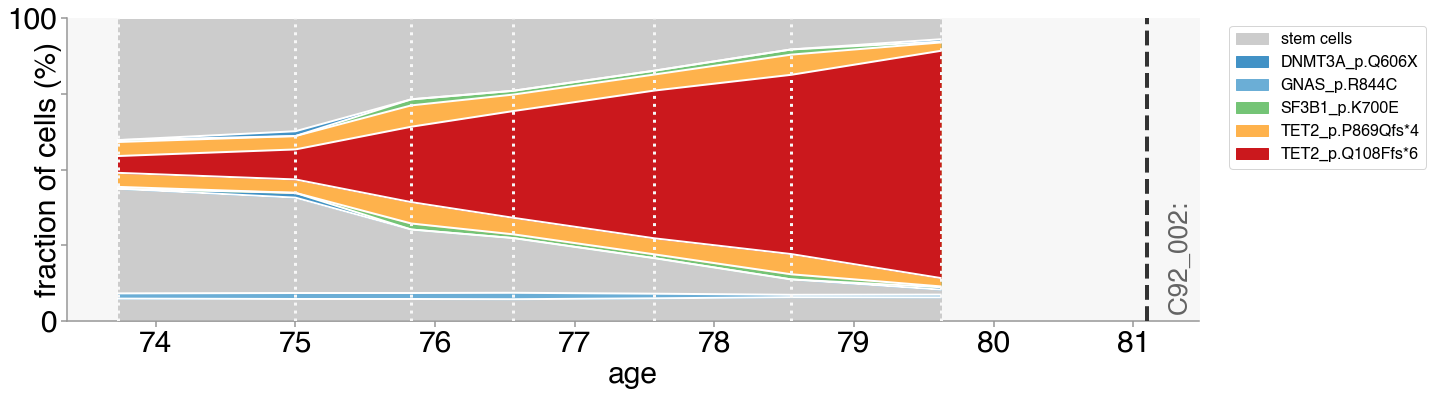

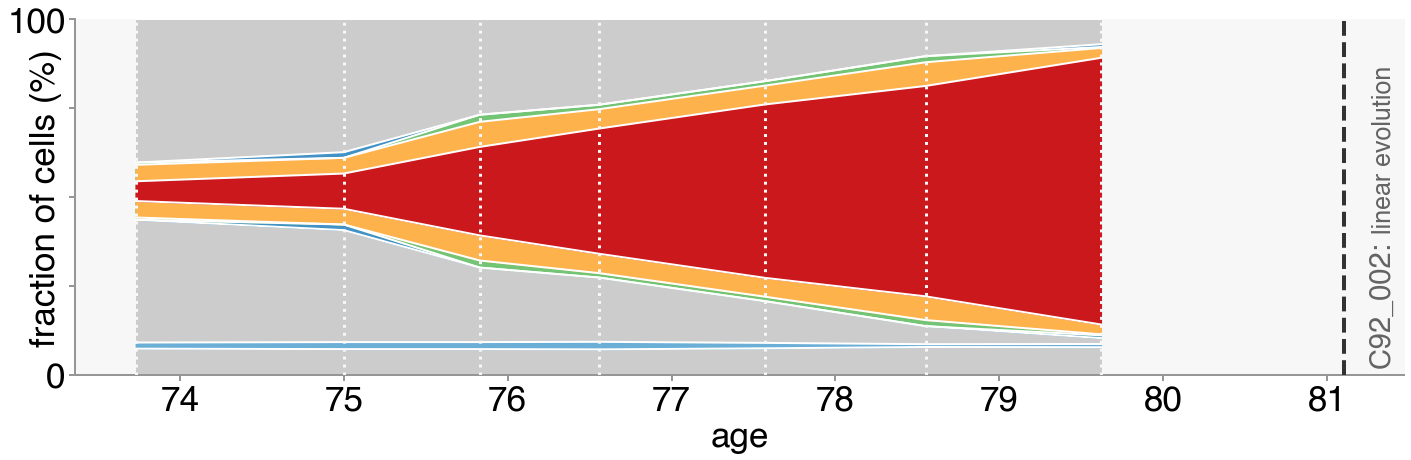

C92_003
RUNX1_p.G190E has 1 mutation and no descendents
undetectable timepoints =  [70.07, 71.07, 72.18, 74.11, 74.97]
RUNX1_p.G190E only present at one age
RAD21_p.Q435X has 1 mutation and no descendents
undetectable timepoints =  [74.97]
DNMT3A_p.W860R has 1 mutation and no descendents
undetectable timepoints =  [72.18]


RUNX1_p.G190E has 1 mutation and no descendents
undetectable timepoints =  [70.07, 71.07, 72.18, 74.11, 74.97]
RUNX1_p.G190E only present at one age
RAD21_p.Q435X has 1 mutation and no descendents
undetectable timepoints =  [74.97]
DNMT3A_p.W860R has 1 mutation and no descendents
undetectable timepoints =  [72.18]


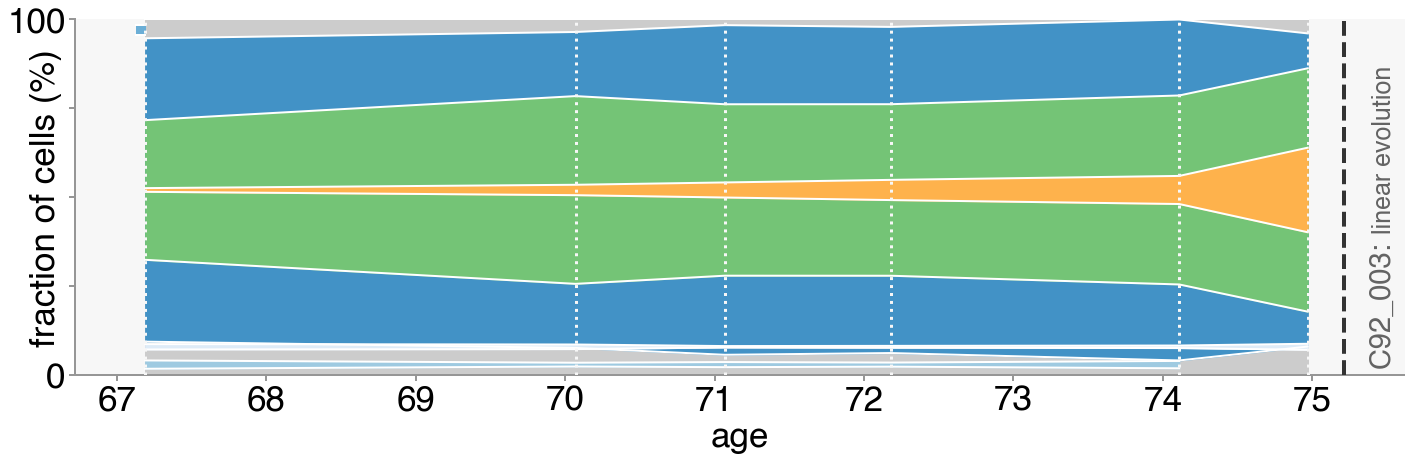

C92_007
CHEK2_p.Q330X has 1 mutation and no descendents
undetectable timepoints =  [78.93, 80.13]


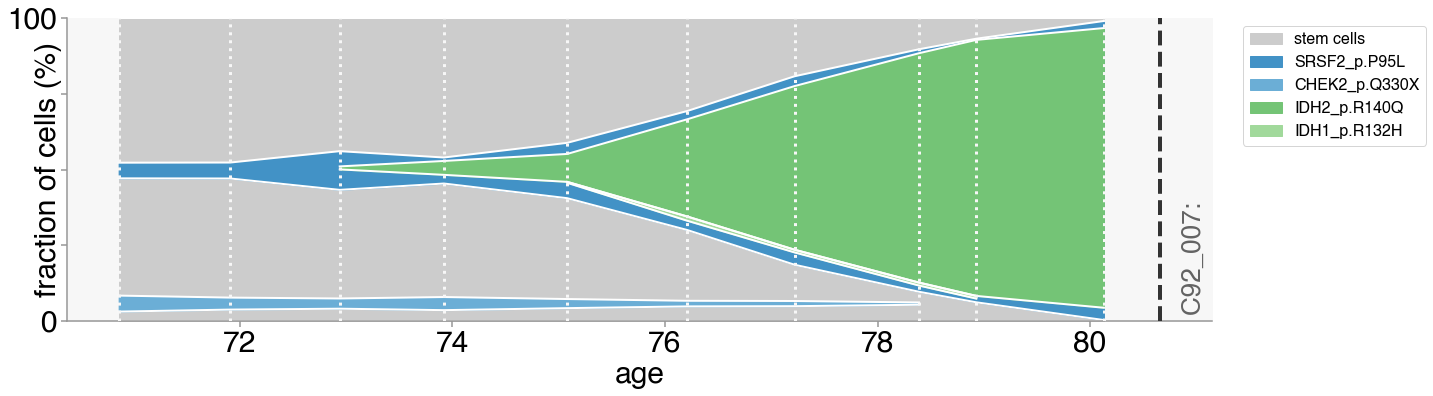

CHEK2_p.Q330X has 1 mutation and no descendents
undetectable timepoints =  [78.93, 80.13]


C92_009
U2AF1_p.Q157R only present at one age


U2AF1_p.Q157R only present at one age


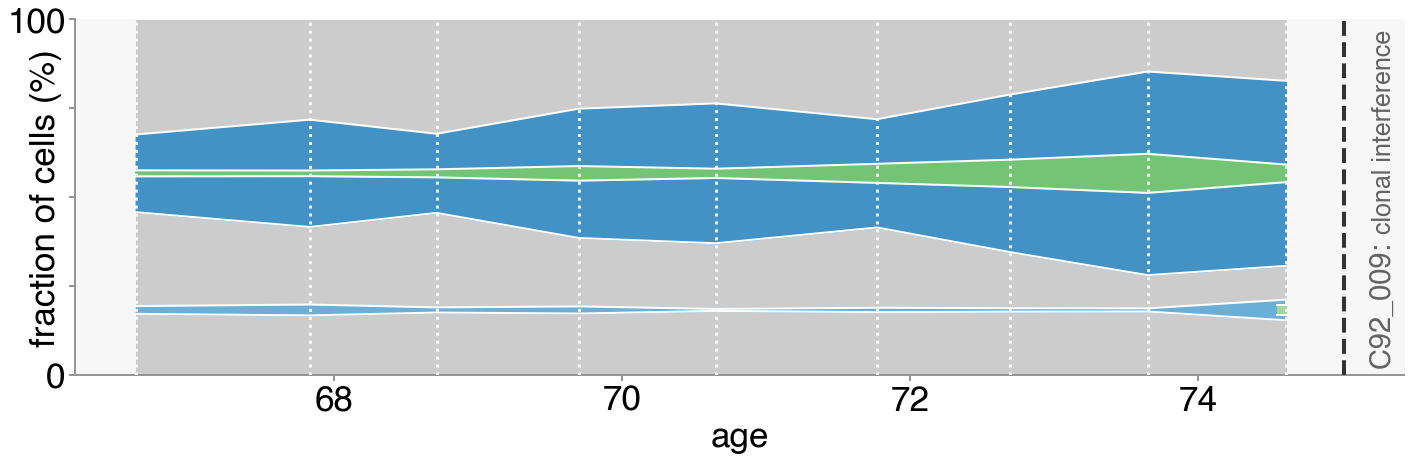

C92_012
TET2_p.C1273Gfs*25 has 1 mutation and no descendents
undetectable timepoints =  [67.03, 68.11]
RUNX1_p.N69S has 1 mutation and no descendents
undetectable timepoints =  [67.03, 68.11]


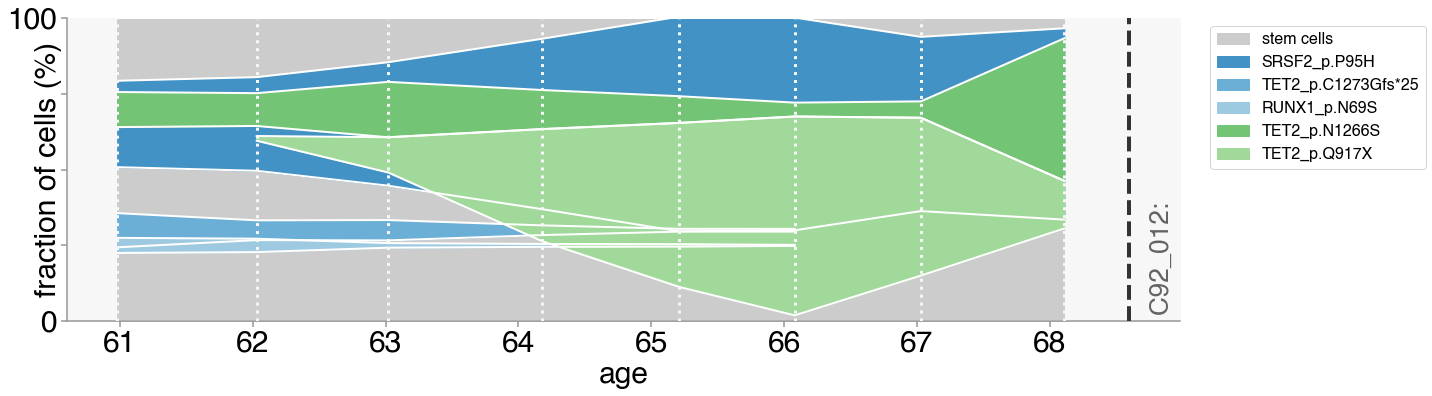

TET2_p.C1273Gfs*25 has 1 mutation and no descendents
undetectable timepoints =  [67.03, 68.11]
RUNX1_p.N69S has 1 mutation and no descendents
undetectable timepoints =  [67.03, 68.11]


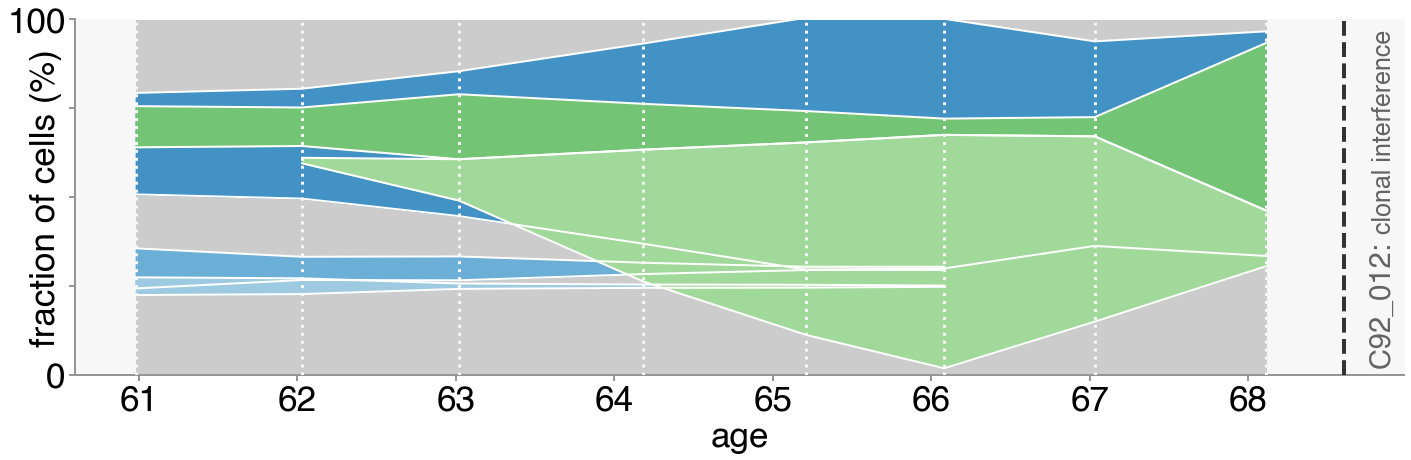

C92_016
FLT3_ITD only present at one age


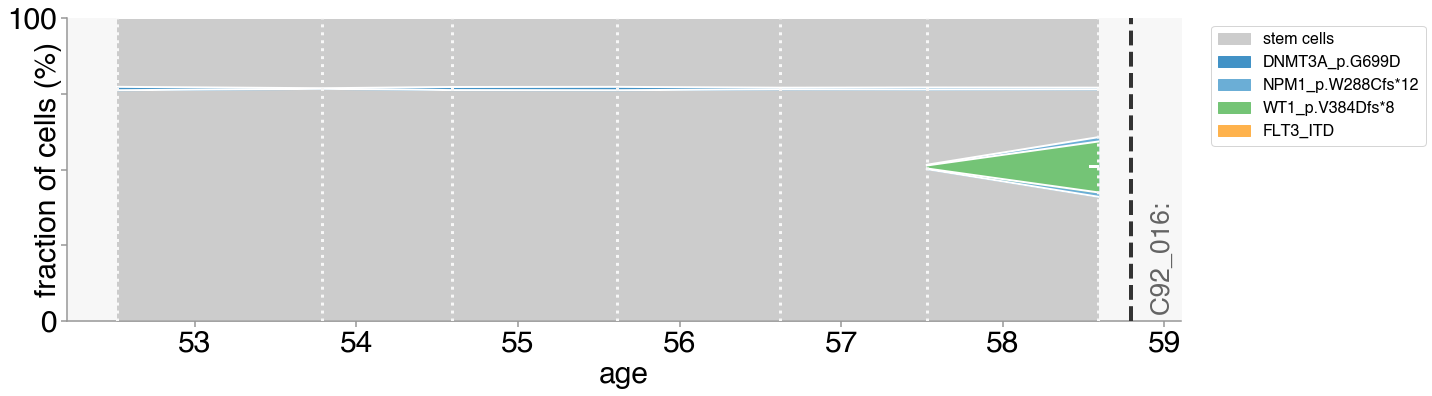

FLT3_ITD only present at one age


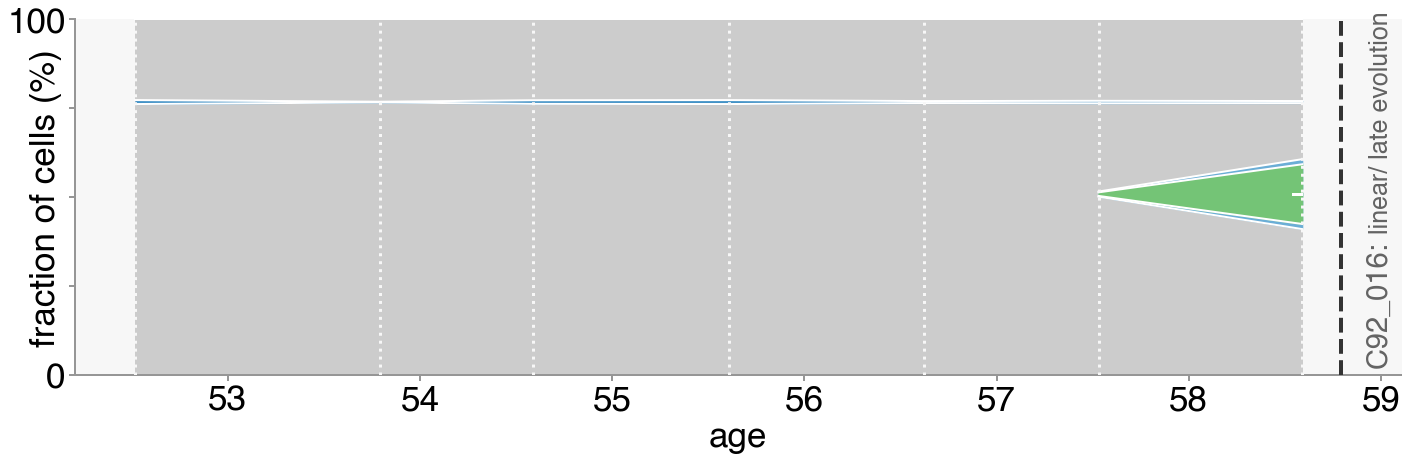

C92_022
CBL_p.R420Q has 1 mutation and no descendents
undetectable timepoints =  [61.96, 62.85, 63.8, 64.78]


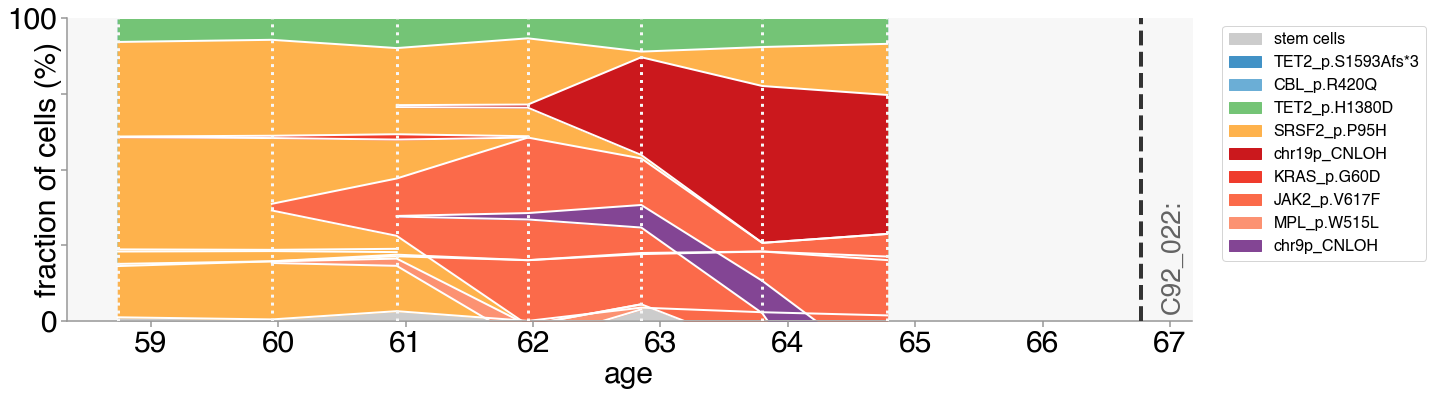

CBL_p.R420Q has 1 mutation and no descendents
undetectable timepoints =  [61.96, 62.85, 63.8, 64.78]


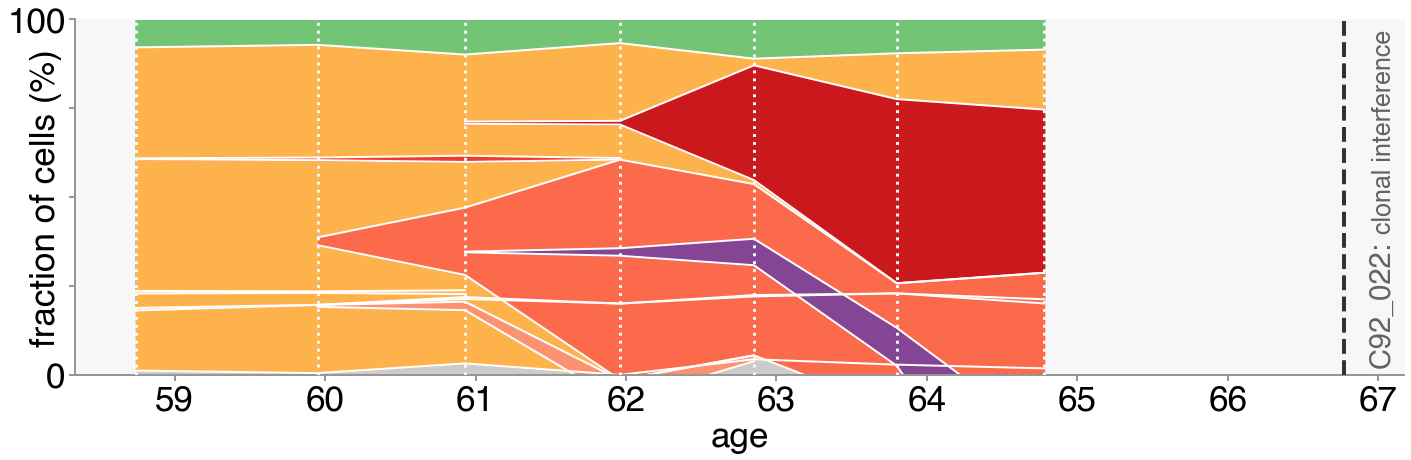

C92_036


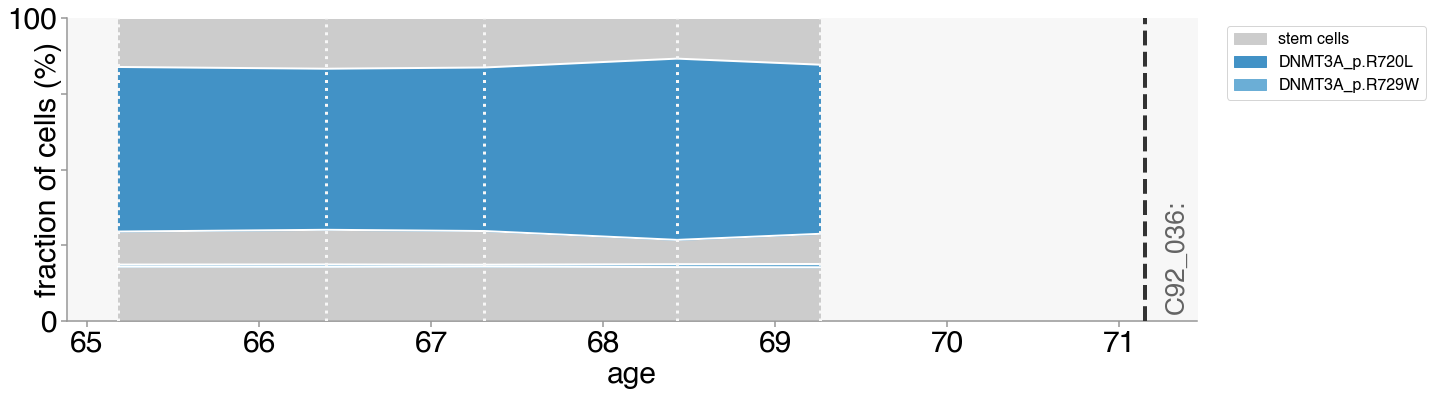

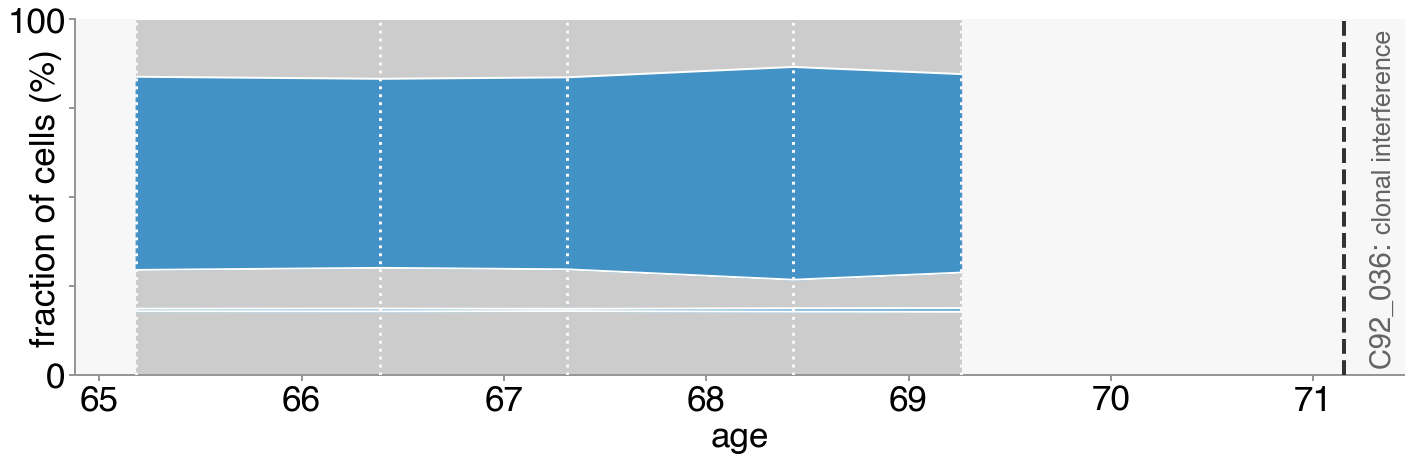

C92_042
SF3B1_p.K666N only present at one age


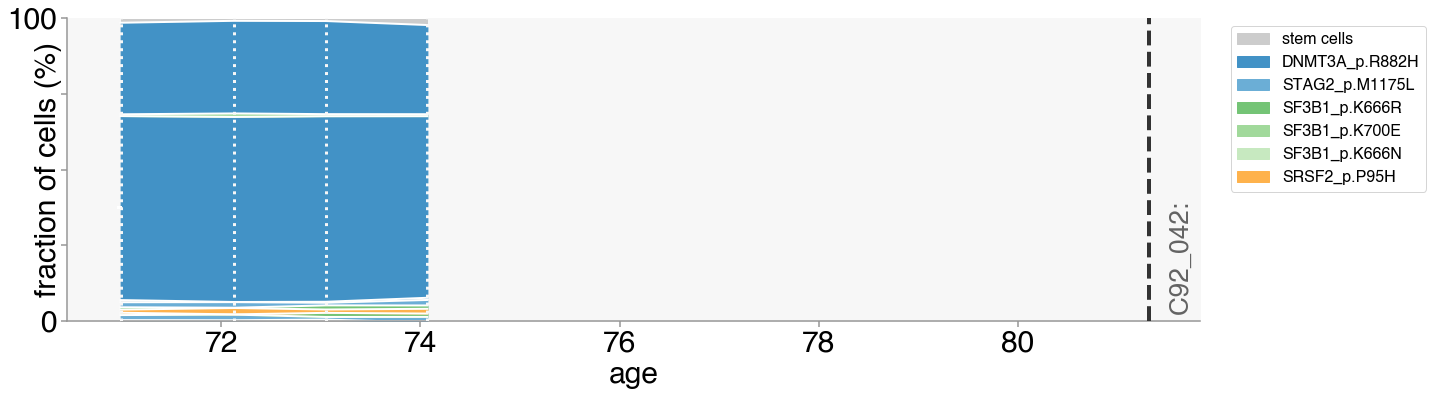

SF3B1_p.K666N only present at one age


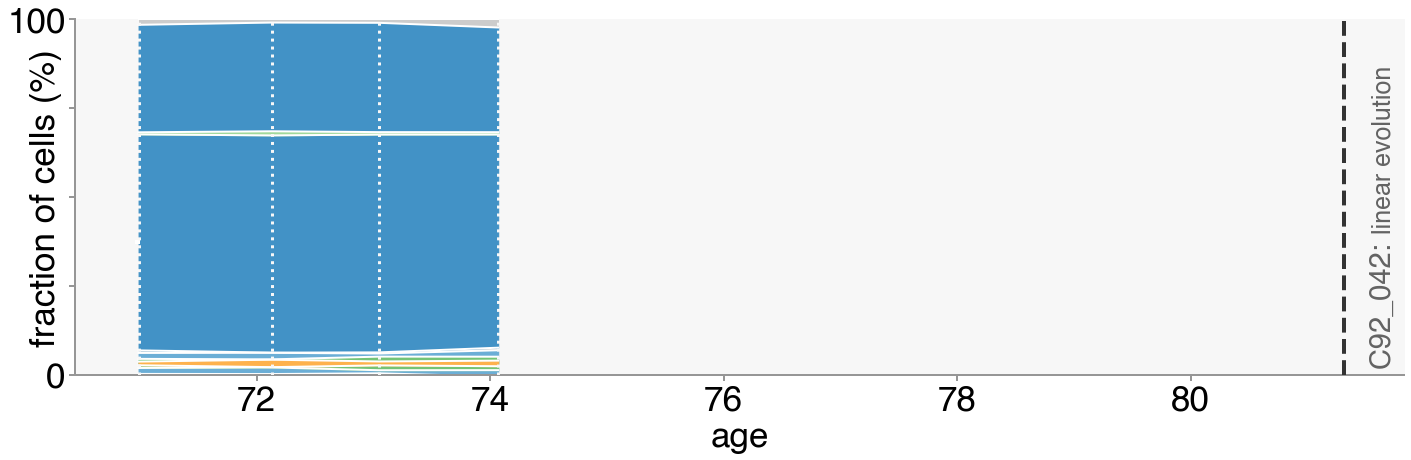

C92_056
EZH2_p.S690W only present at one age


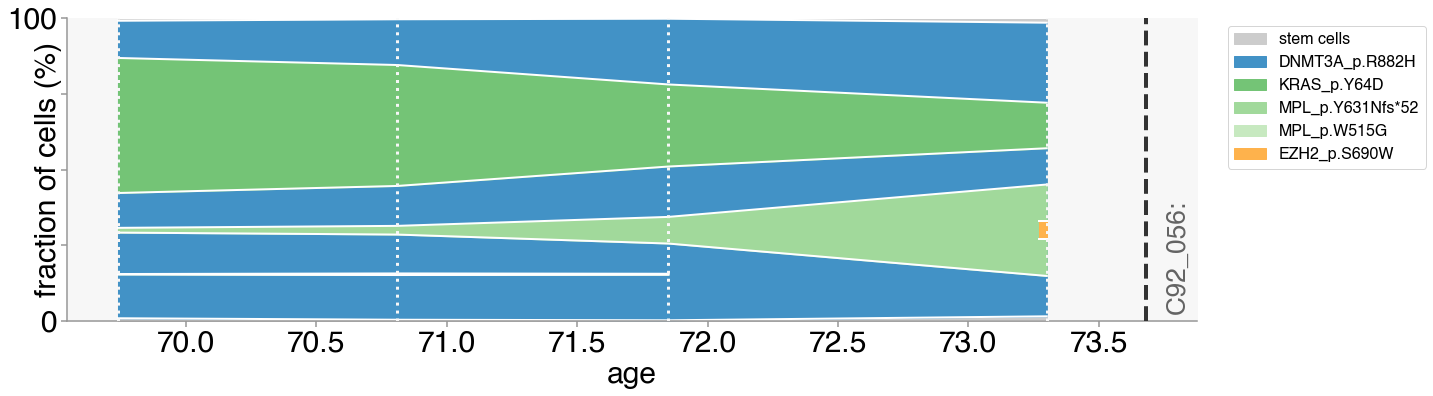

EZH2_p.S690W only present at one age


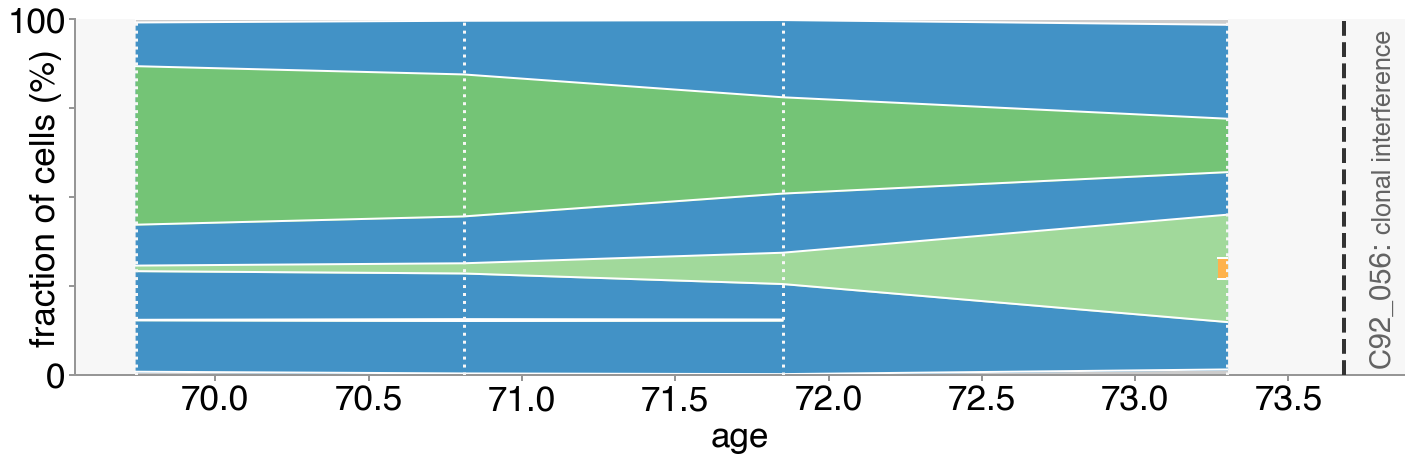

C92_066


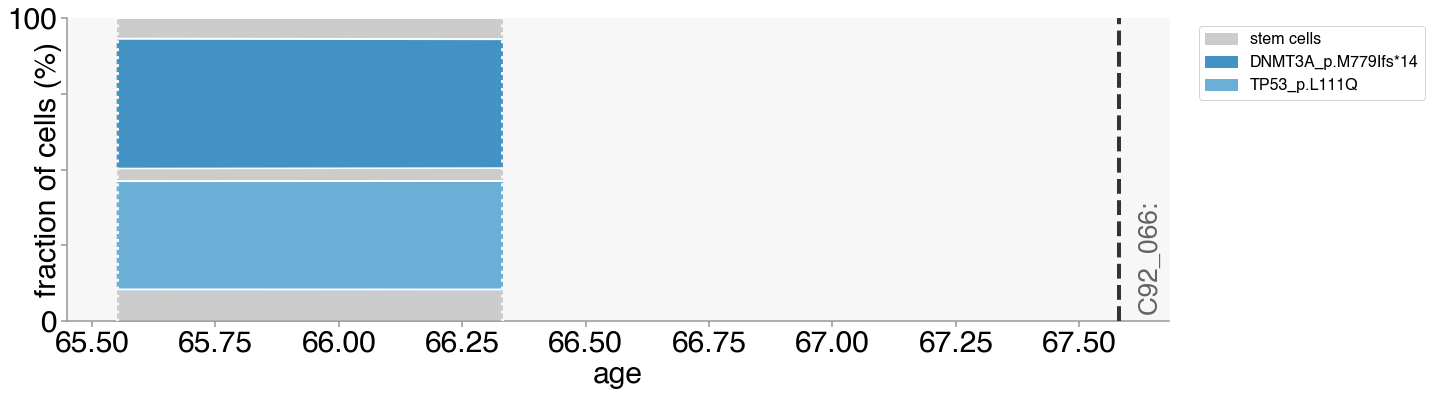

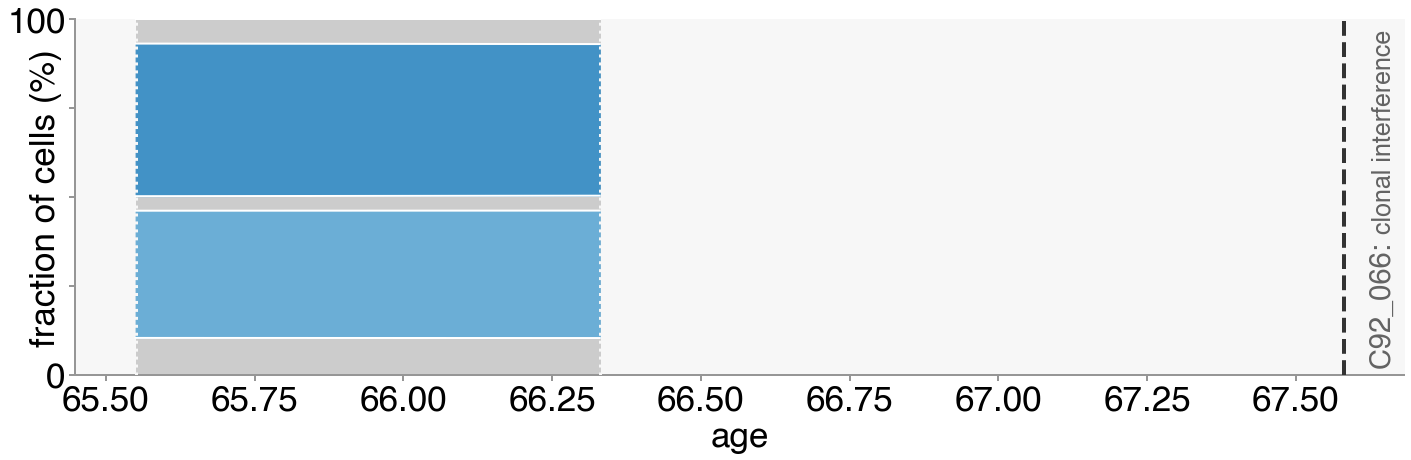

C92_061


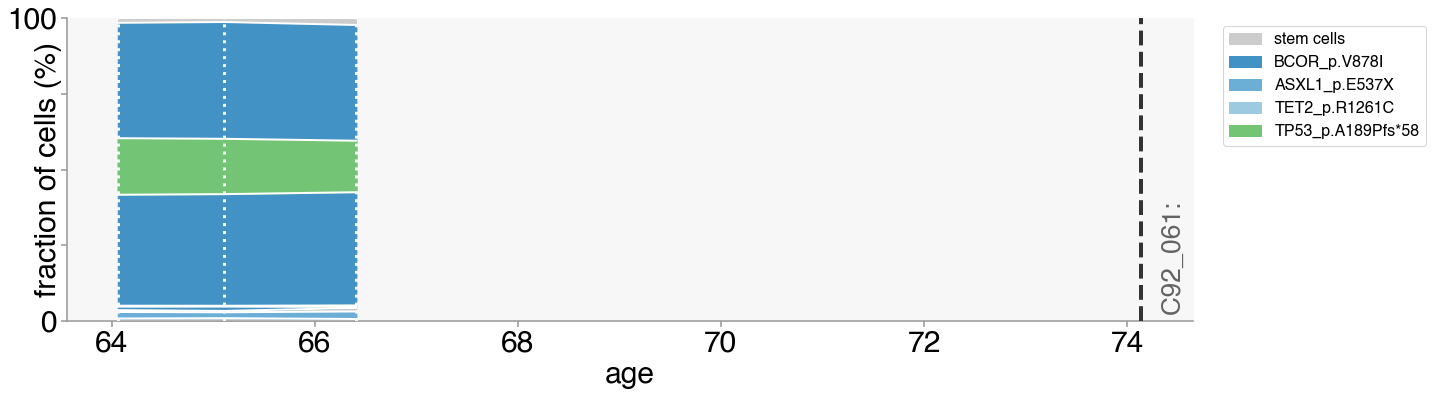

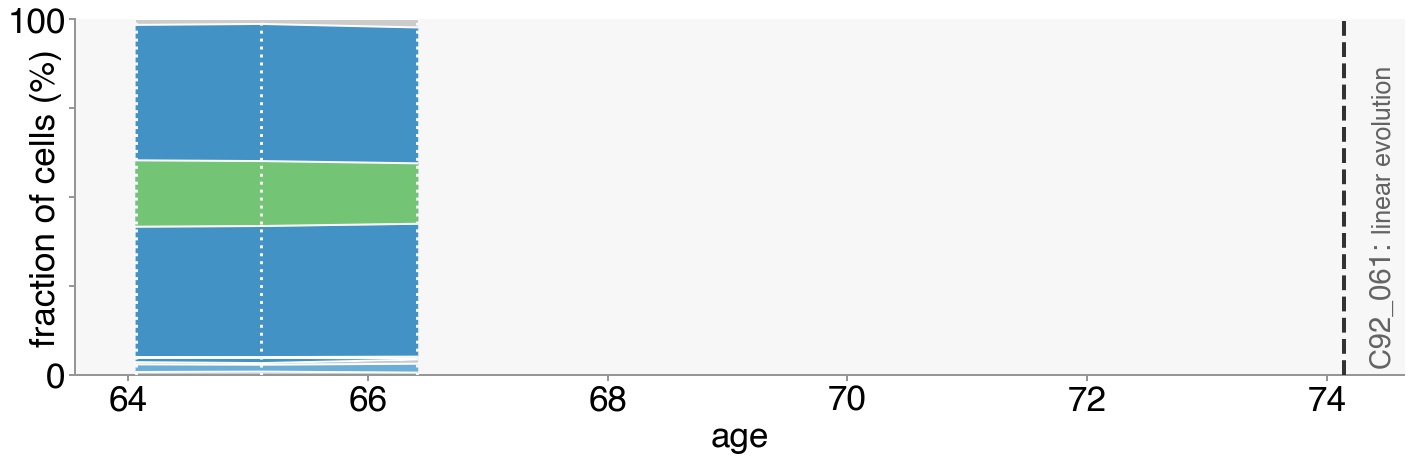

C92_068


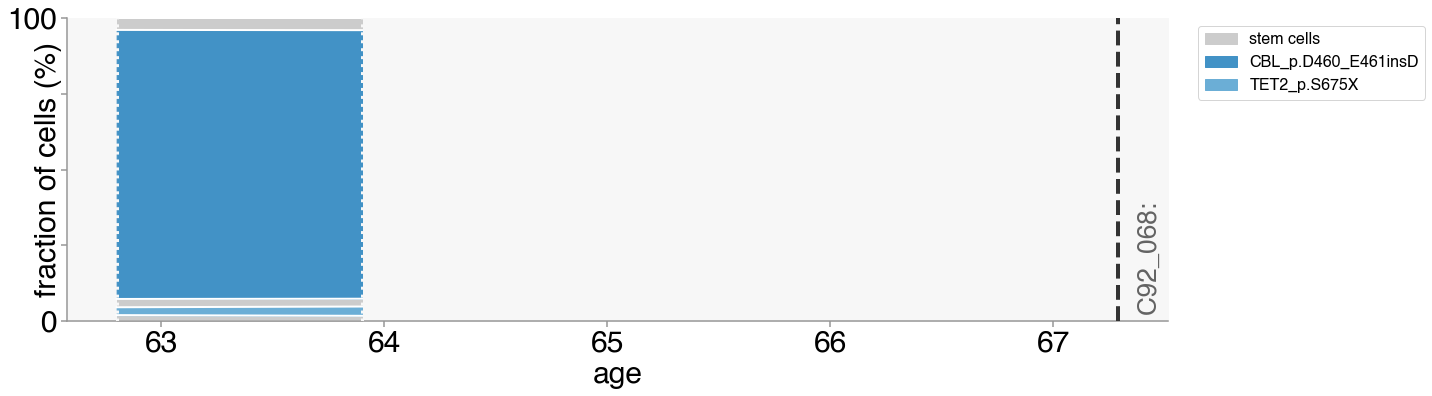

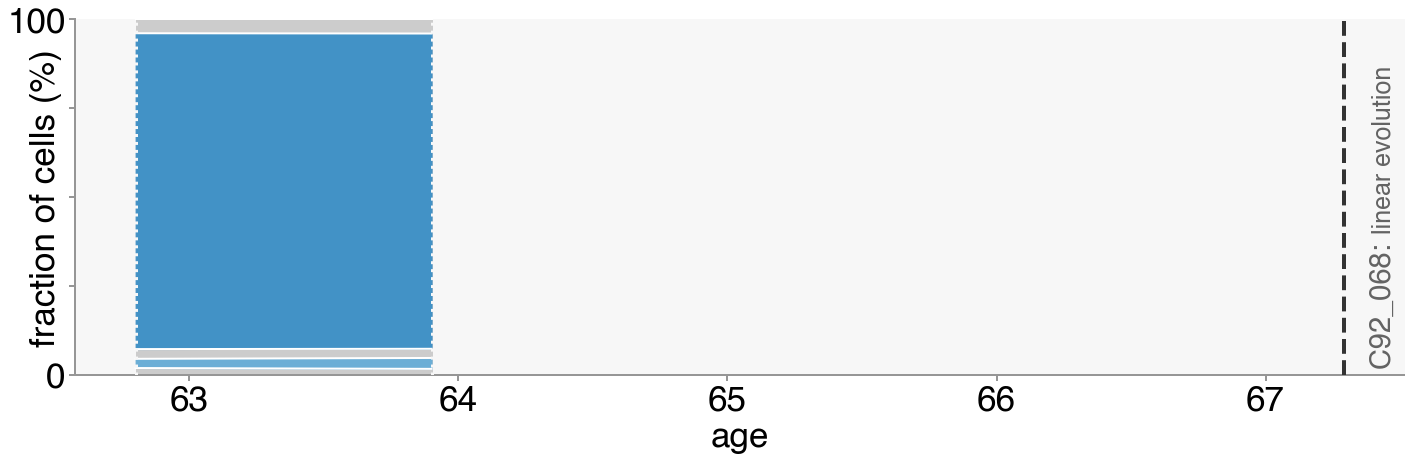

C92_086
JAK2_p.V617F has 1 mutation and no descendents
undetectable timepoints =  [60.11]


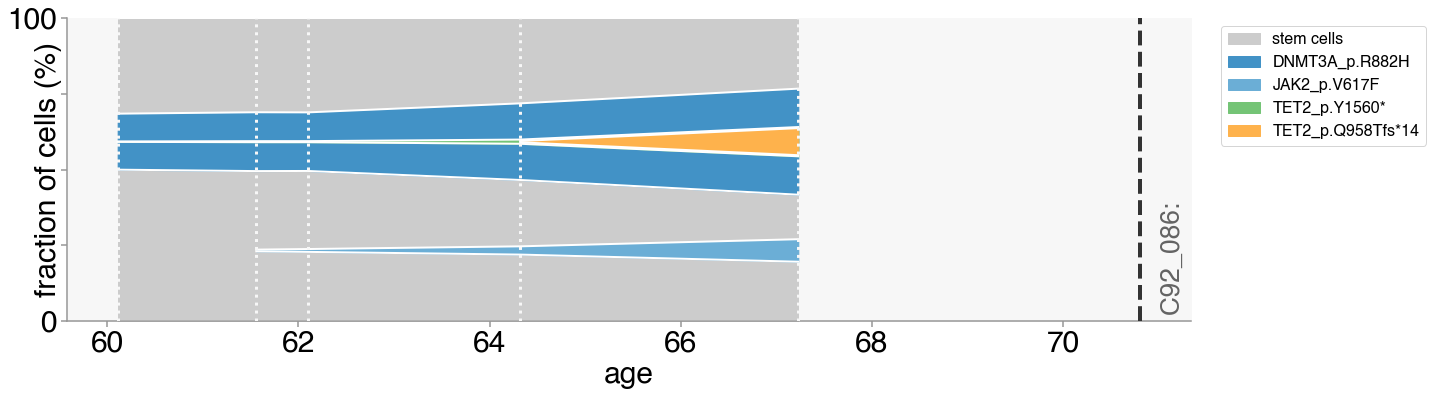

JAK2_p.V617F has 1 mutation and no descendents
undetectable timepoints =  [60.11]


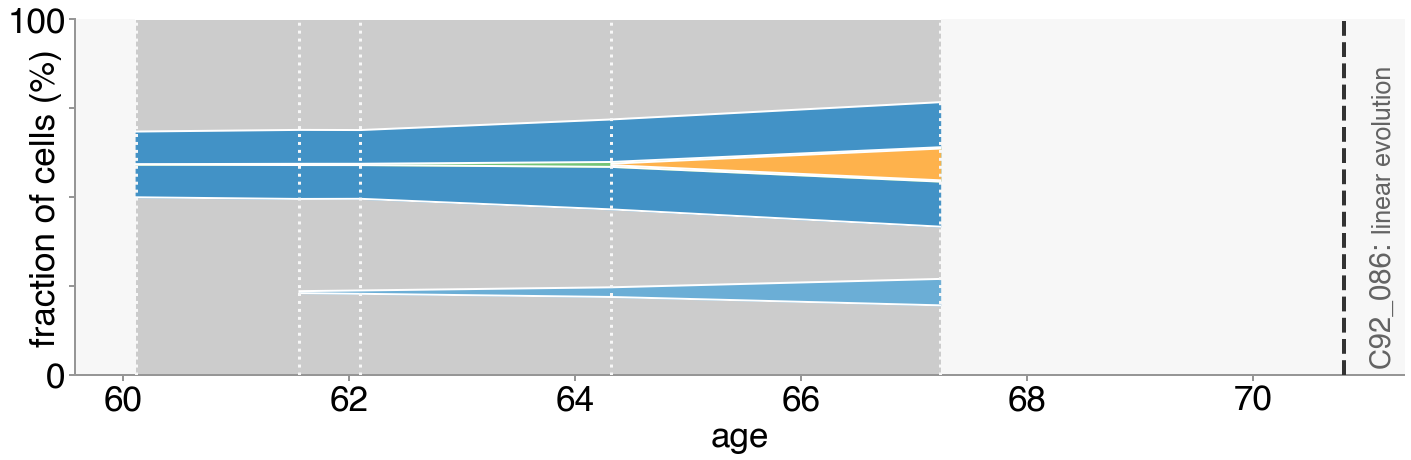

In [25]:
#Cases which need midline adjustment
cases_without_variants = []

for sample_name in cases_midline_shift.keys():
    if sample_name not in ['C92_023']:
        print(sample_name)
        try:
            ages_list = sample_ages_sorted[sample_name]
            diagnosis_age = sample_diagnosis_age[sample_name]
            phylogeny = retrieve_phylogeny(sample_name)
            phylogeny = add_midline_shift(phylogeny, cases_midline_shift[sample_name])
            phylogeny = trajectory_colors(phylogeny)
            timepoints = cell_fraction_timepoints(phylogeny, ages_list)
            Muller_plot_v3_muller_colours(timepoints, phylogeny, sample_name, diagnosis_age)
            Muller_plot_v3_muller_colours_no_legend(timepoints, phylogeny, sample_name, diagnosis_age)
        except FileNotFoundError:
            cases_without_variants.append(sample_name)

### C92_034

- Keep the colours the same as on the trajectory plot

SRSF2_p.P95L has 1 mutation and no descendents
undetectable timepoints =  [71.27, 72.42, 73.35, 74.26]
SRSF2_p.P95H only present at one age


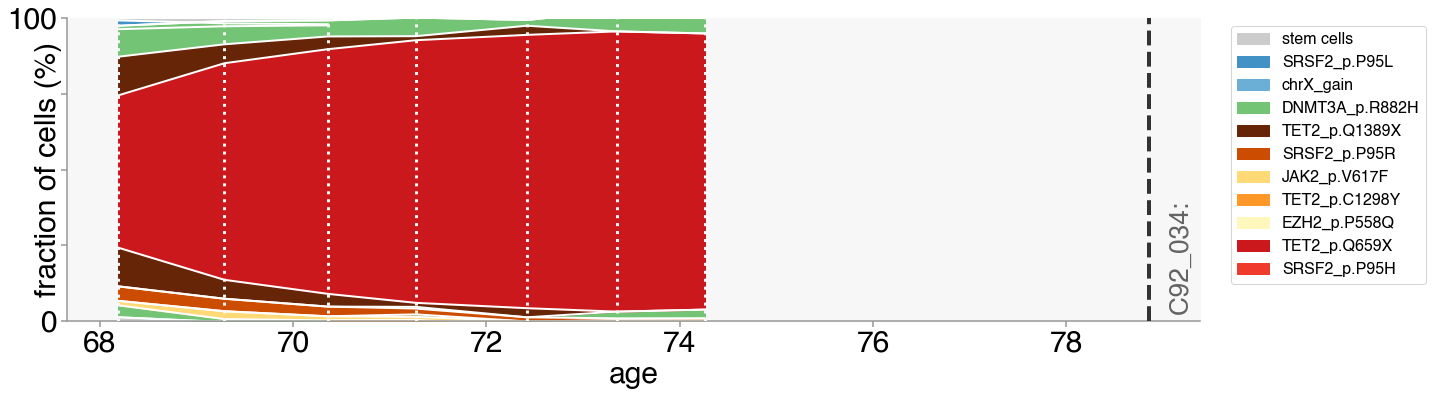

SRSF2_p.P95L has 1 mutation and no descendents
undetectable timepoints =  [71.27, 72.42, 73.35, 74.26]
SRSF2_p.P95H only present at one age


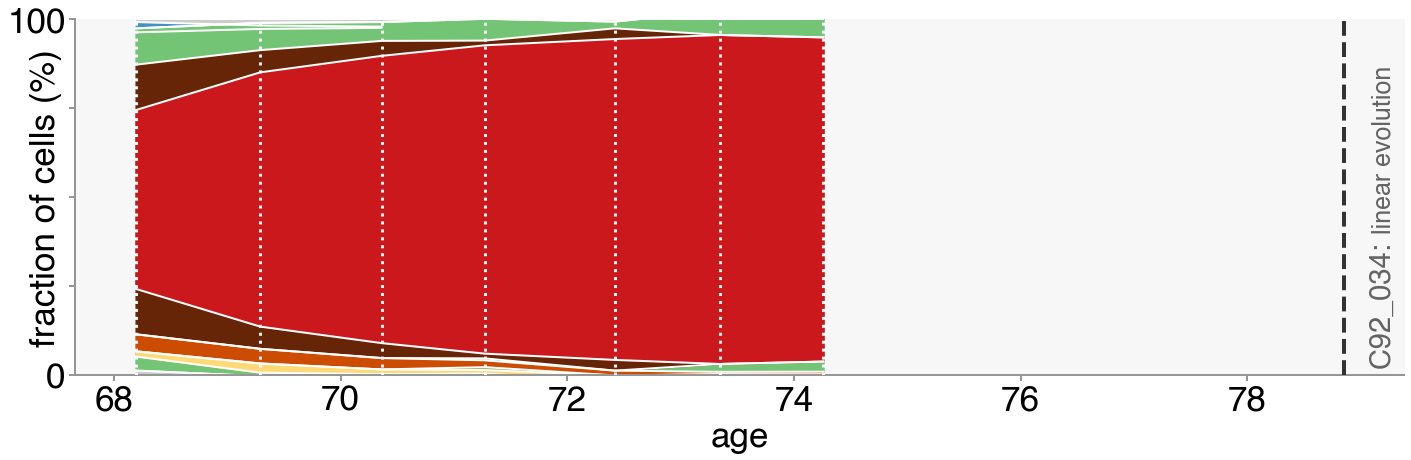

In [26]:
sample_name = 'C92_034'
ages_list = sample_ages_sorted[sample_name]
diagnosis_age = sample_diagnosis_age[sample_name]
phylogeny = retrieve_phylogeny(sample_name)
phylogeny = add_midline_shift(phylogeny, [0, 31, 16, 0, 0, 0, 0, 0, 0, 0, 0])
phylogeny = trajectory_colors_non_change_3(phylogeny)
timepoints = cell_fraction_timepoints(phylogeny, ages_list)
Muller_plot_v3_muller_colours(timepoints, phylogeny, sample_name, diagnosis_age)
Muller_plot_v3_muller_colours_no_legend(timepoints, phylogeny, sample_name, diagnosis_age)

### C92_023

- Keep the colours the same as on the trajectory plot

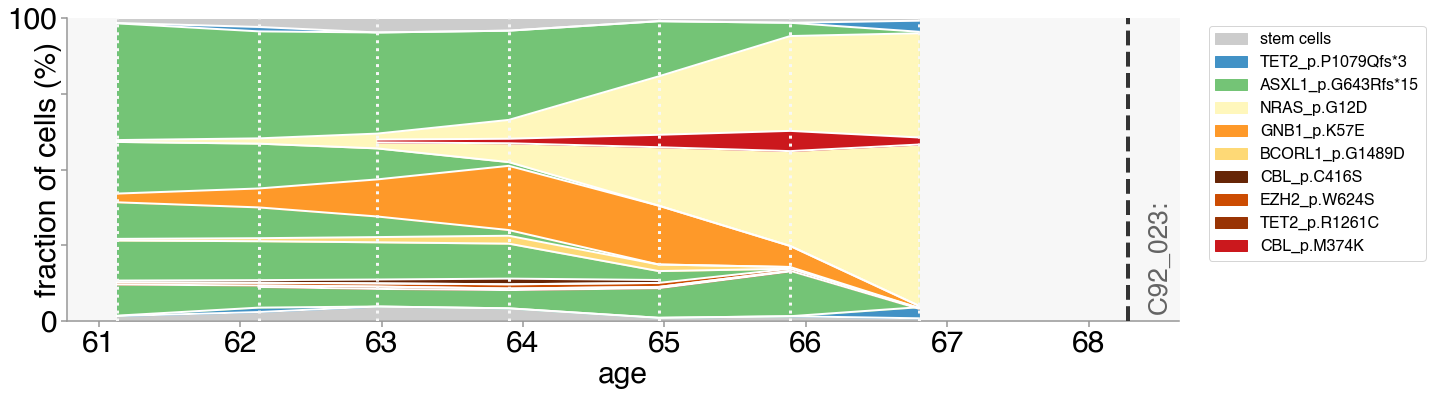

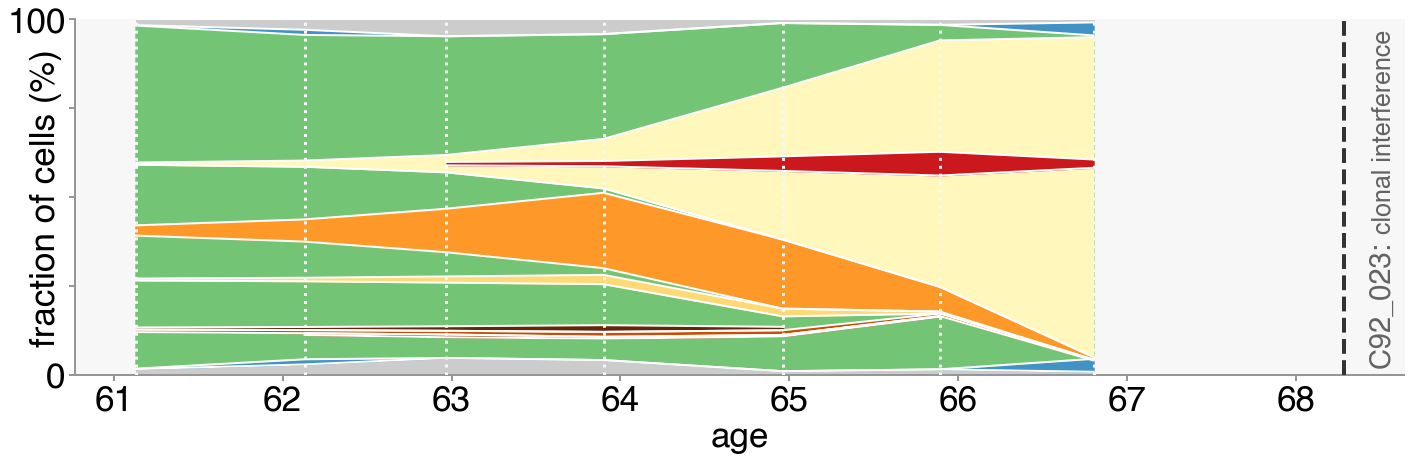

In [27]:
sample_name = 'C92_023'
ages_list = sample_ages_sorted[sample_name]
diagnosis_age = sample_diagnosis_age[sample_name]
phylogeny = retrieve_phylogeny(sample_name)
phylogeny = add_midline_shift(phylogeny, [0, 0, 0, -25, -30, -30, -30, -30, -20, 0])
phylogeny = trajectory_colors_non_change_3(phylogeny)
timepoints = cell_fraction_timepoints(phylogeny, ages_list)
Muller_plot_v3_muller_colours(timepoints, phylogeny, sample_name, diagnosis_age)
Muller_plot_v3_muller_colours_no_legend(timepoints, phylogeny, sample_name, diagnosis_age)

## Cases that do not need midline shift of trajectory

C92_005
GATA2_p.A302S only present at one age
DNMT3A_p.R544S only present at one age


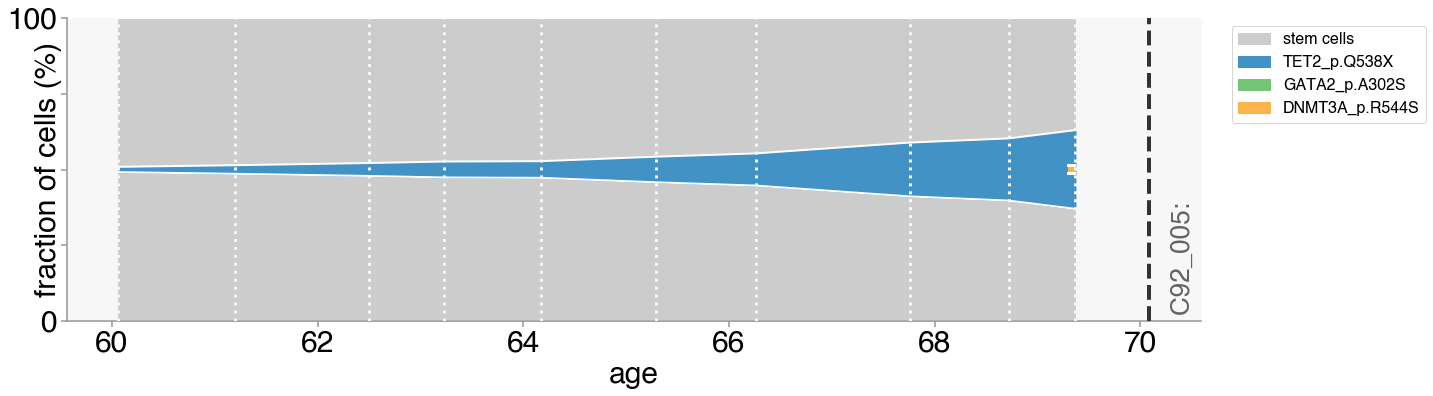

GATA2_p.A302S only present at one age
DNMT3A_p.R544S only present at one age


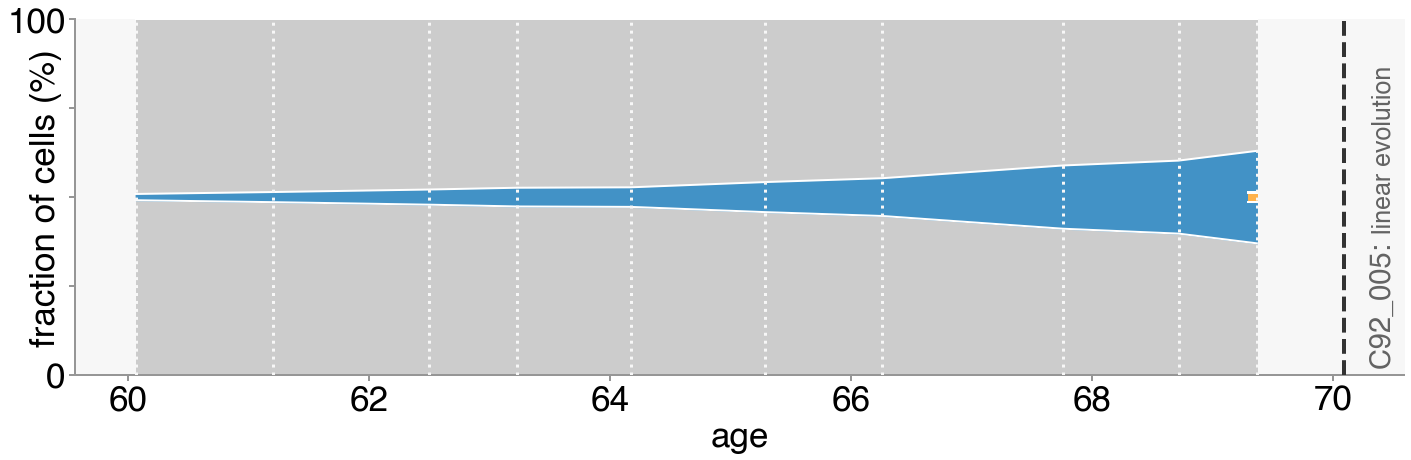

C92_008


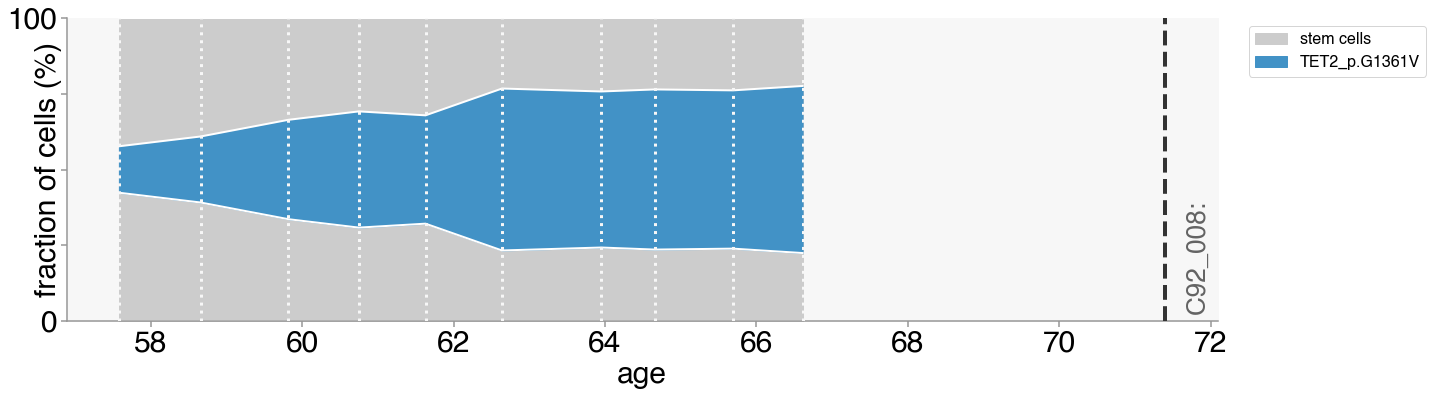

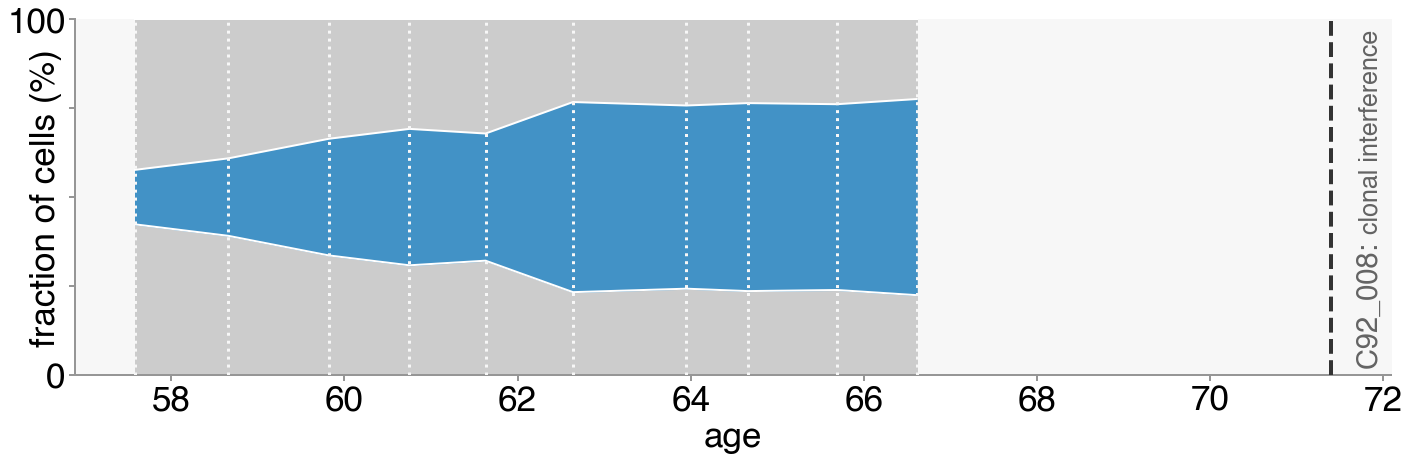

C92_011
MPL_p.W515L has 1 mutation and no descendents
undetectable timepoints =  [71.28]


MPL_p.W515L has 1 mutation and no descendents
undetectable timepoints =  [71.28]


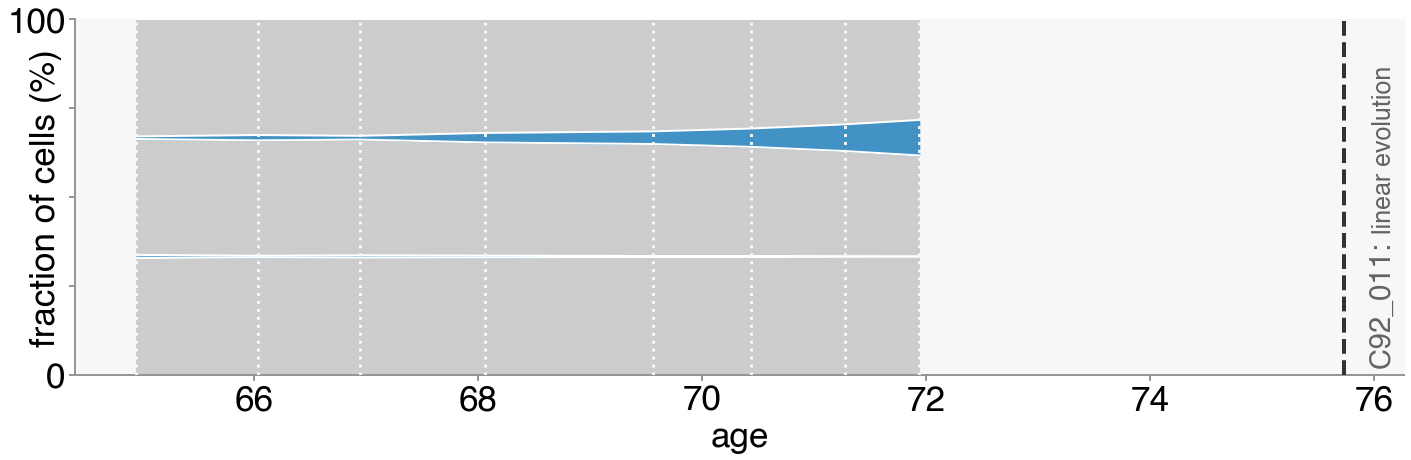

C92_015
C92_018


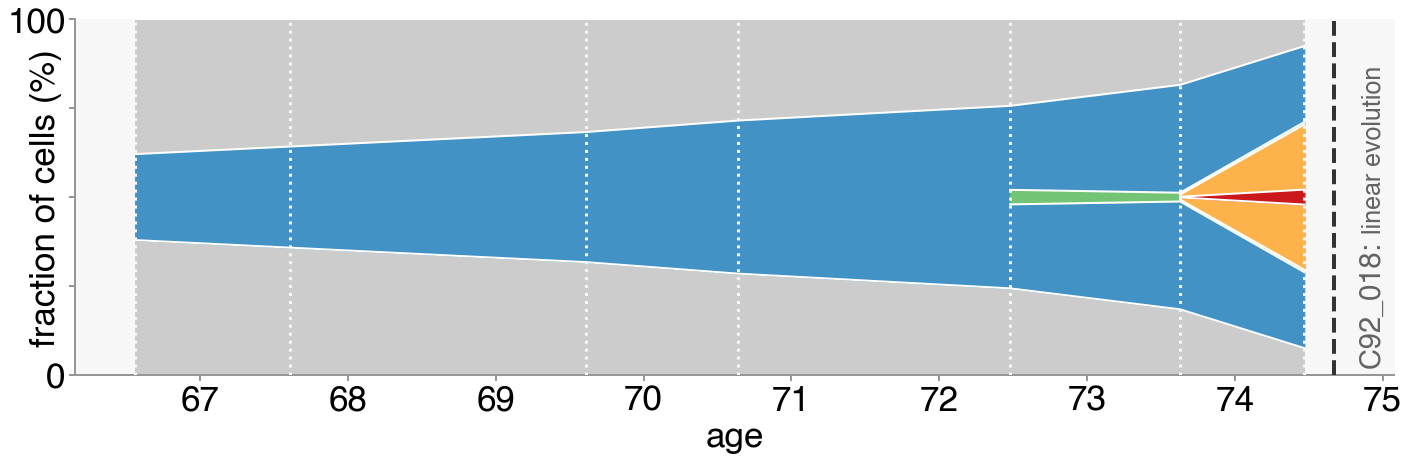

C92_019
ASXL1_p.A709T only present at one age


ASXL1_p.A709T only present at one age


C92_024
WT1_p.P381Rfs*73 only present at one age


WT1_p.P381Rfs*73 only present at one age


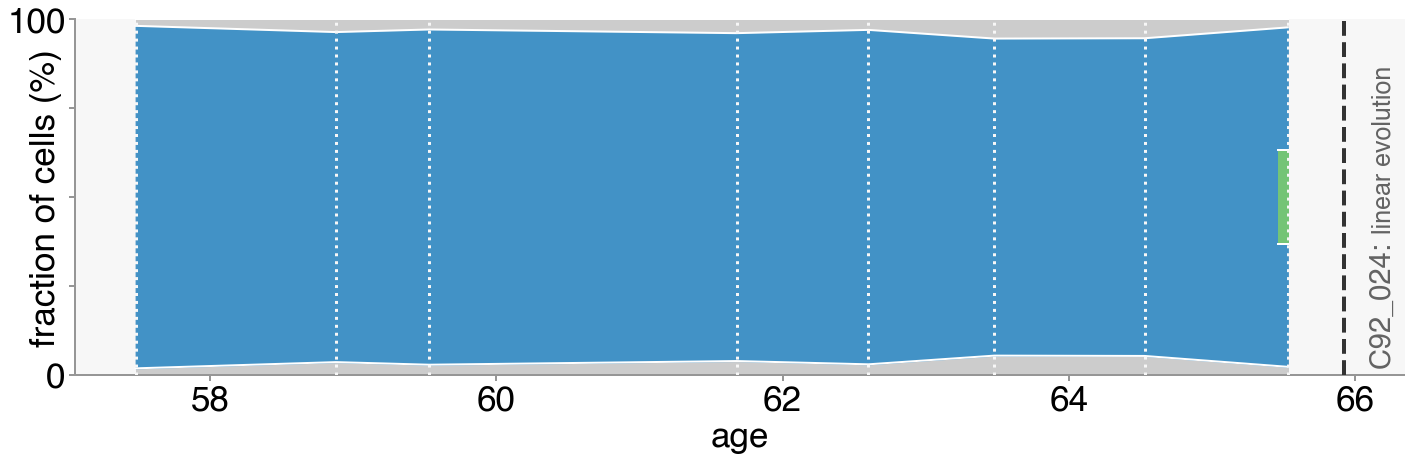

C92_032


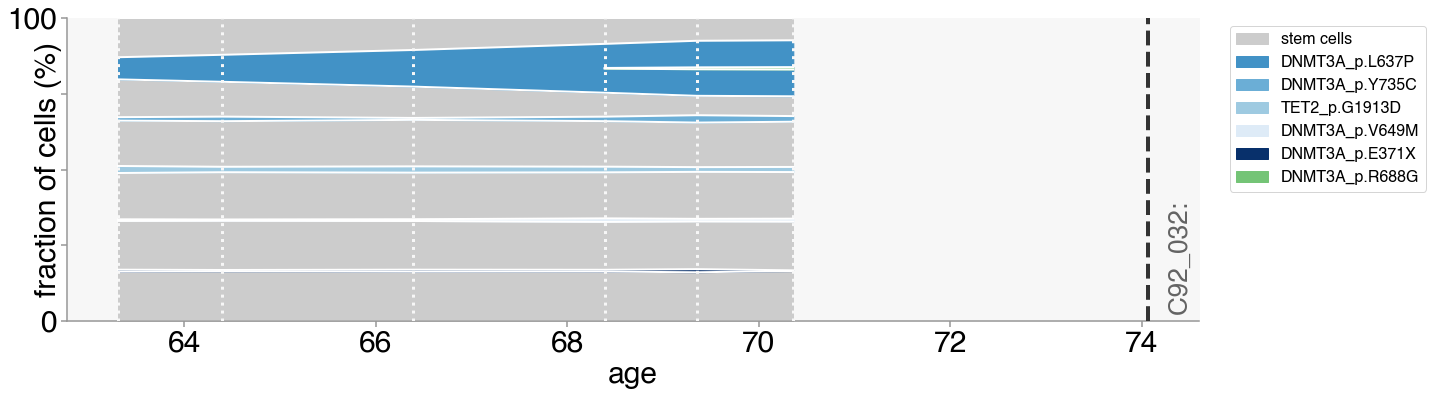

C92_033


C92_039
C92_041
DNMT3A_p.R882H has 1 mutation and no descendents
undetectable timepoints =  [69.47]


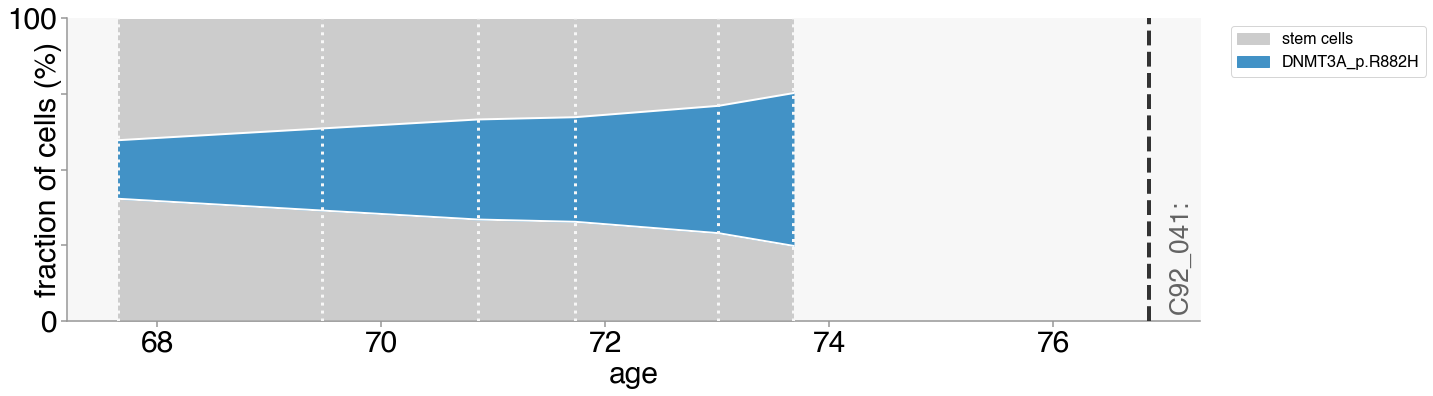

DNMT3A_p.R882H has 1 mutation and no descendents
undetectable timepoints =  [69.47]


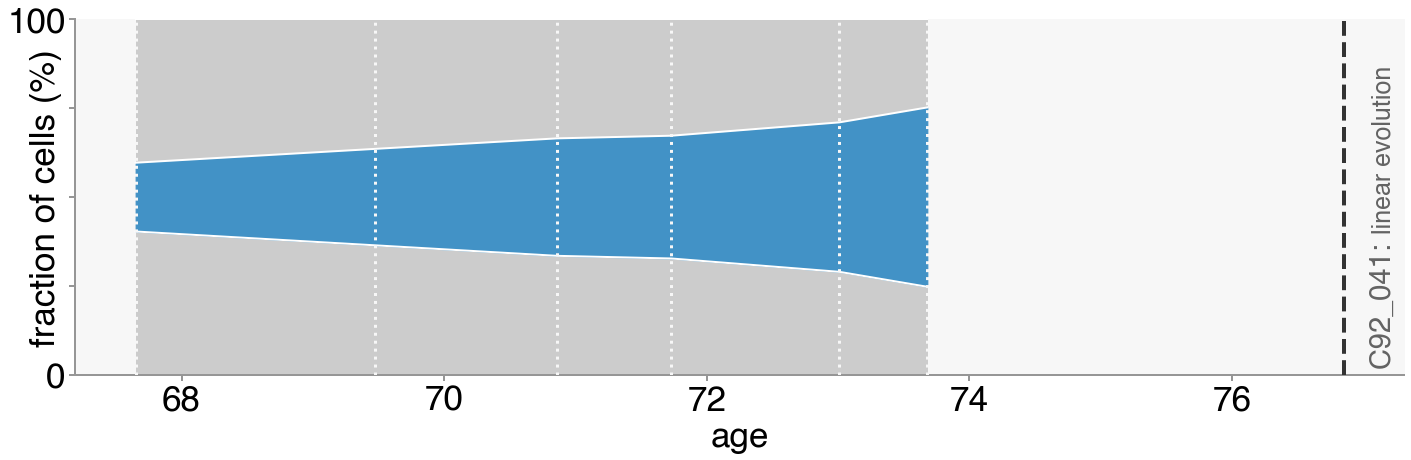

C92_043
C92_044
C92_045


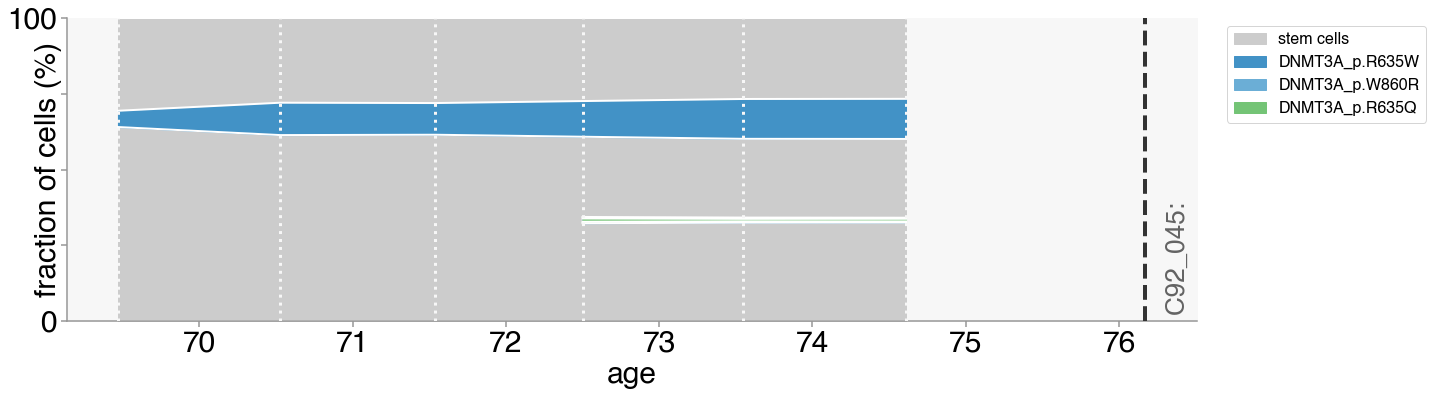

C92_047
DNMT3A_p.E229Kfs*87 has 1 mutation and no descendents
undetectable timepoints =  [71.31, 72.83]
RUNX1_p.R139X has 1 mutation and no descendents
undetectable timepoints =  [71.31, 72.83, 75.78]
RUNX1_p.R139X only present at one age


DNMT3A_p.E229Kfs*87 has 1 mutation and no descendents
undetectable timepoints =  [71.31, 72.83]
RUNX1_p.R139X has 1 mutation and no descendents
undetectable timepoints =  [71.31, 72.83, 75.78]
RUNX1_p.R139X only present at one age


C92_048
C92_049


C92_050


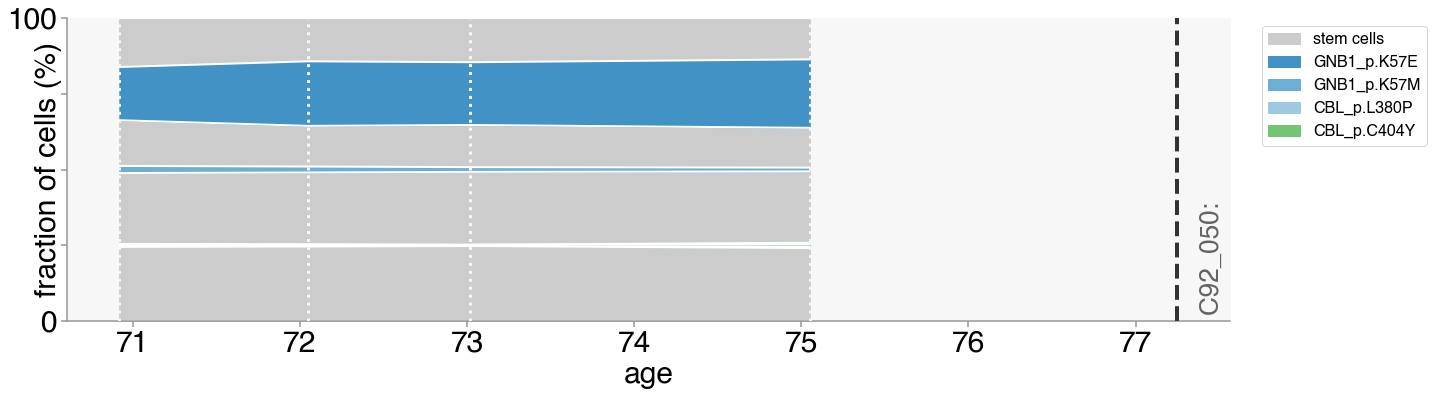

C92_051
ASXL1_p.E1006X has 1 mutation and no descendents
undetectable timepoints =  [71.08, 72.29, 73.17, 74.15]
ASXL1_p.E1006X only present at one age


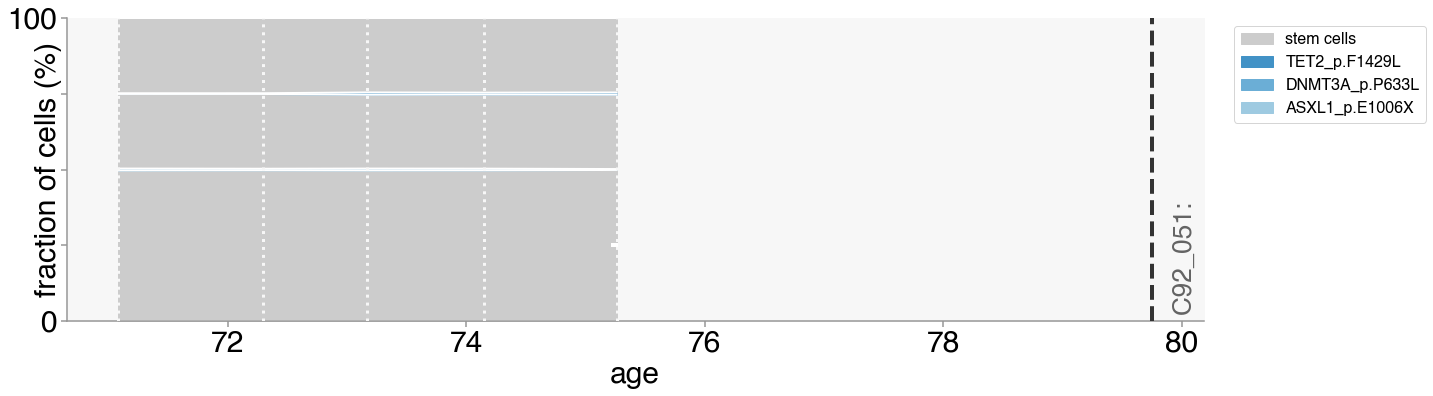

ASXL1_p.E1006X has 1 mutation and no descendents
undetectable timepoints =  [71.08, 72.29, 73.17, 74.15]
ASXL1_p.E1006X only present at one age


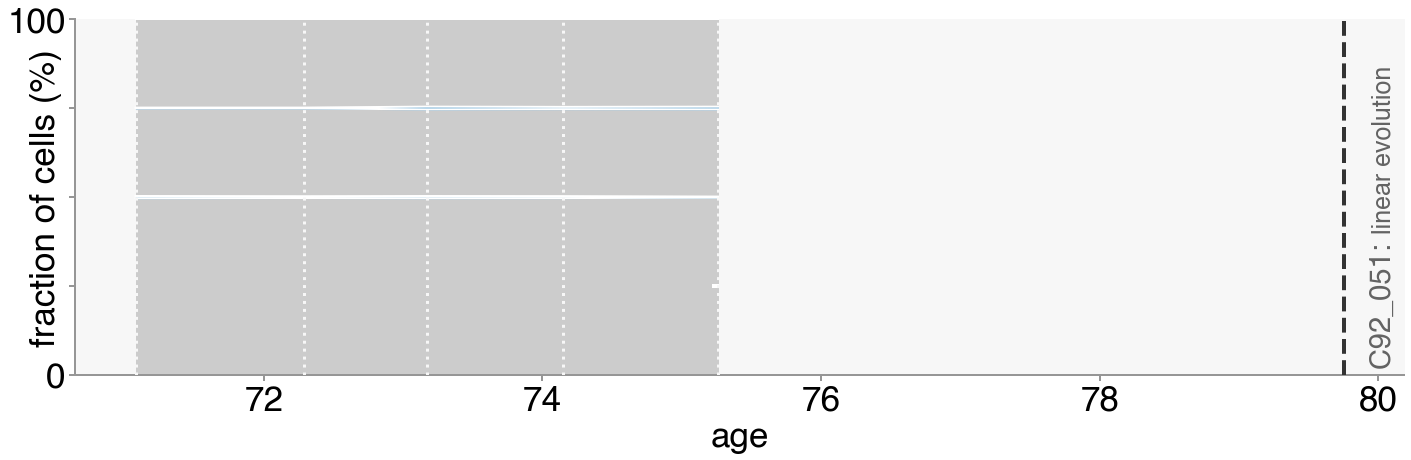

C92_052
DDX41_p.D344E only present at one age
SRSF2_p.P95H only present at one age


DDX41_p.D344E only present at one age
SRSF2_p.P95H only present at one age


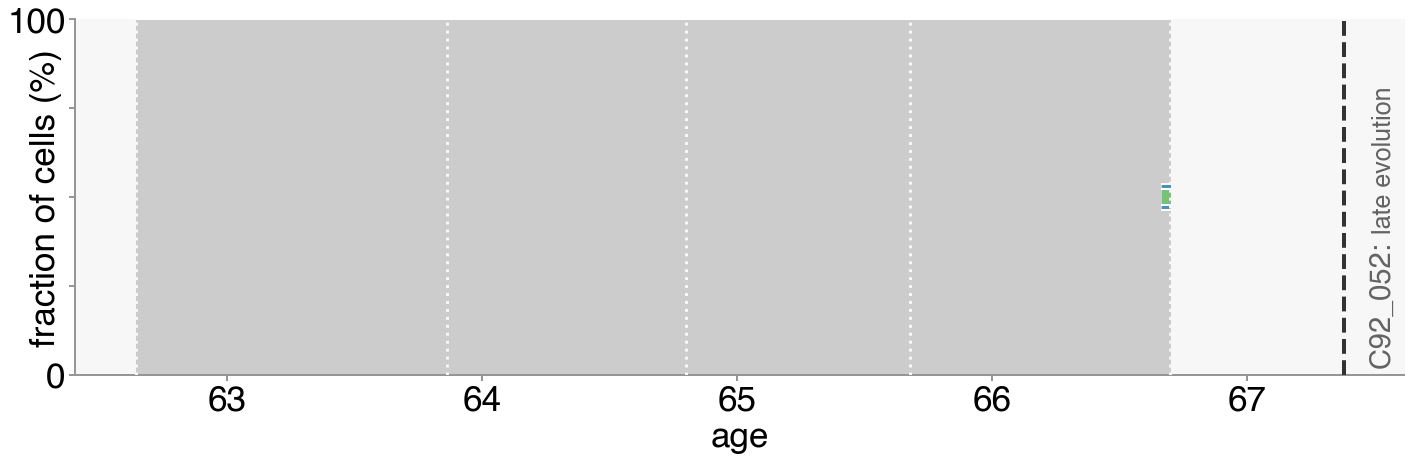

C92_053


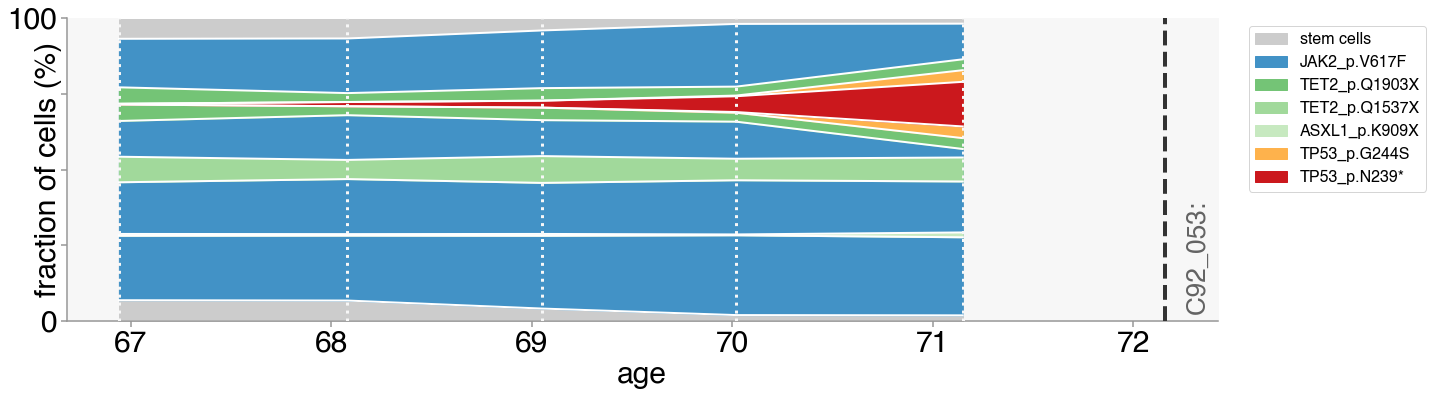

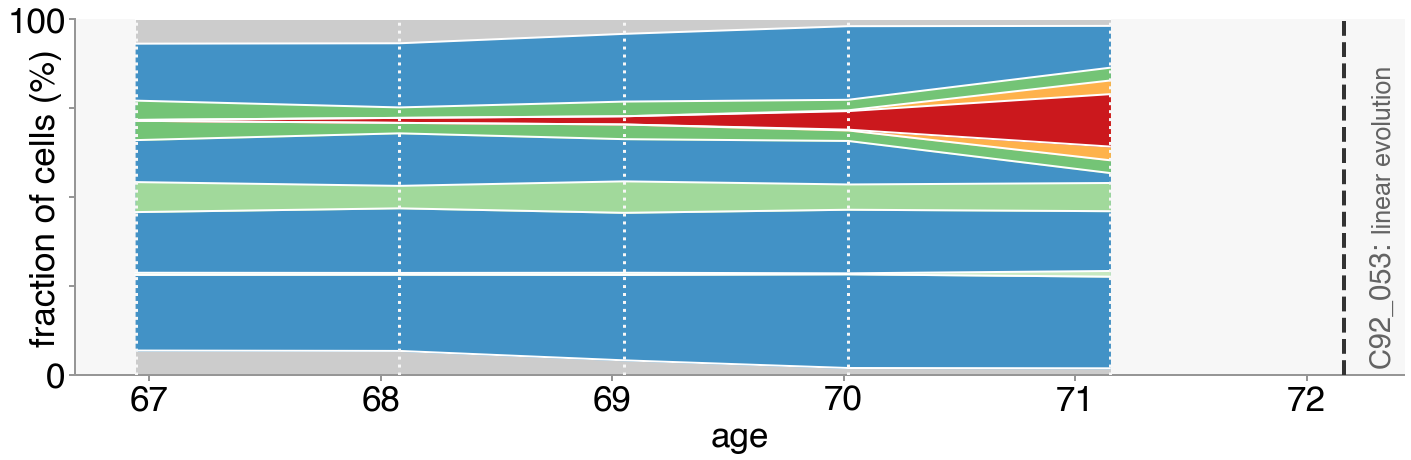

C92_054
RUNX1_p.A443T only present at one age


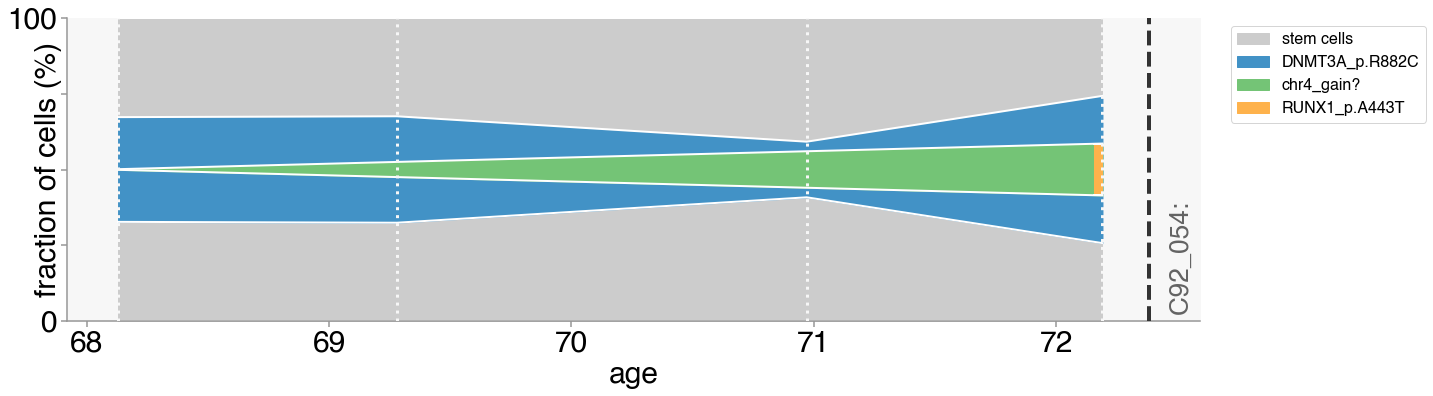

RUNX1_p.A443T only present at one age


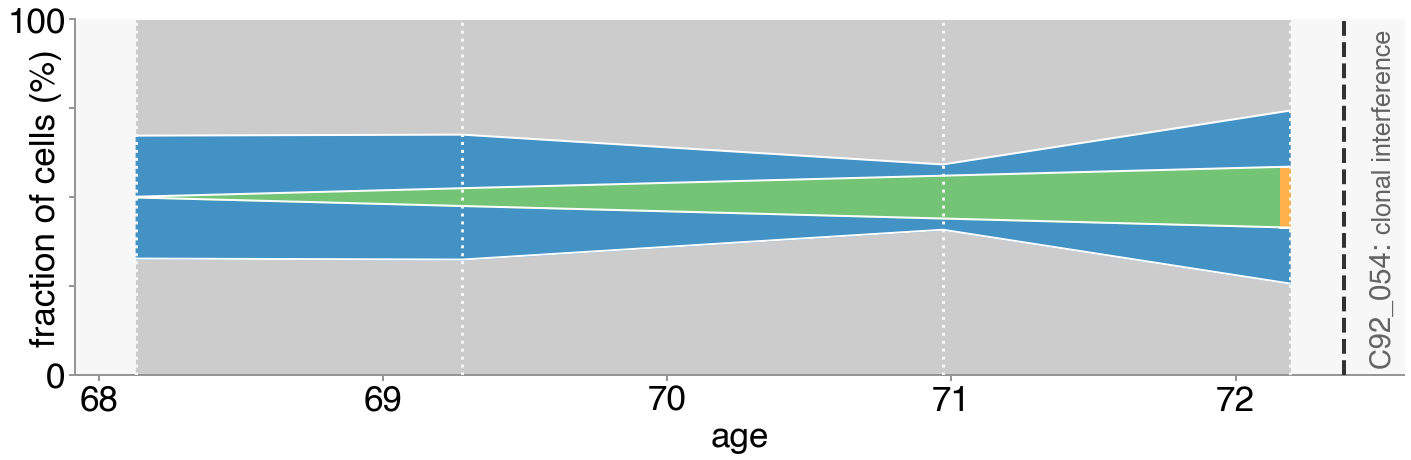

C92_055
NPM1_p.W288Cfs*12 has 1 mutation and no descendents
undetectable timepoints =  [50.47, 51.63]
NPM1_p.W288Cfs*12 only present at one age


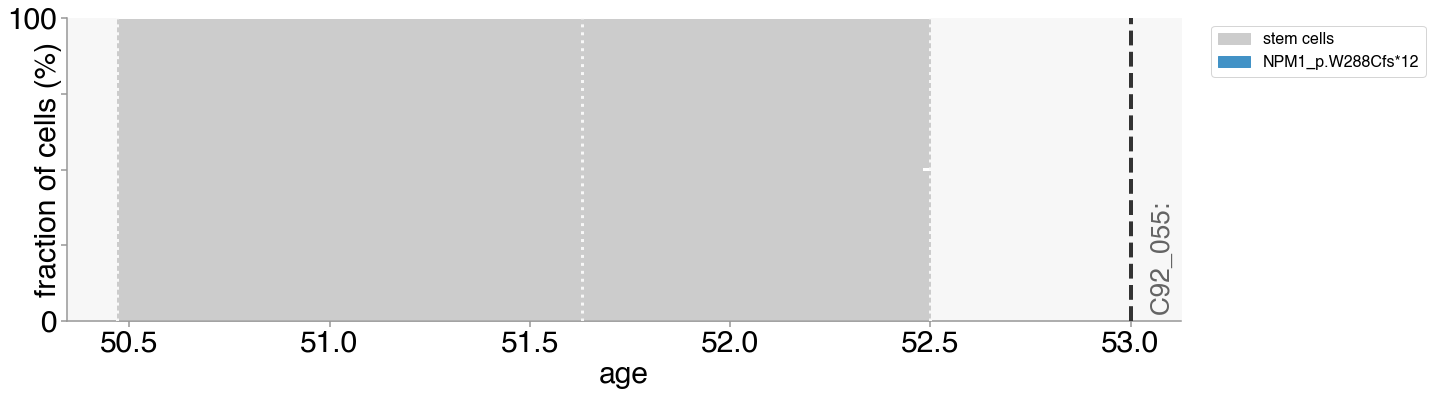

NPM1_p.W288Cfs*12 has 1 mutation and no descendents
undetectable timepoints =  [50.47, 51.63]
NPM1_p.W288Cfs*12 only present at one age


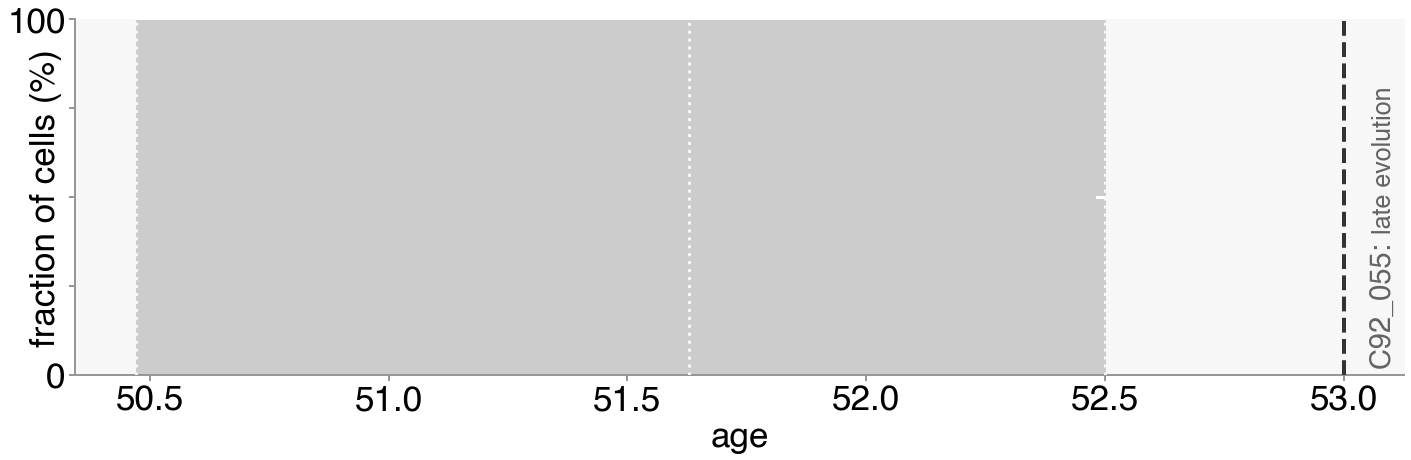

C92_057


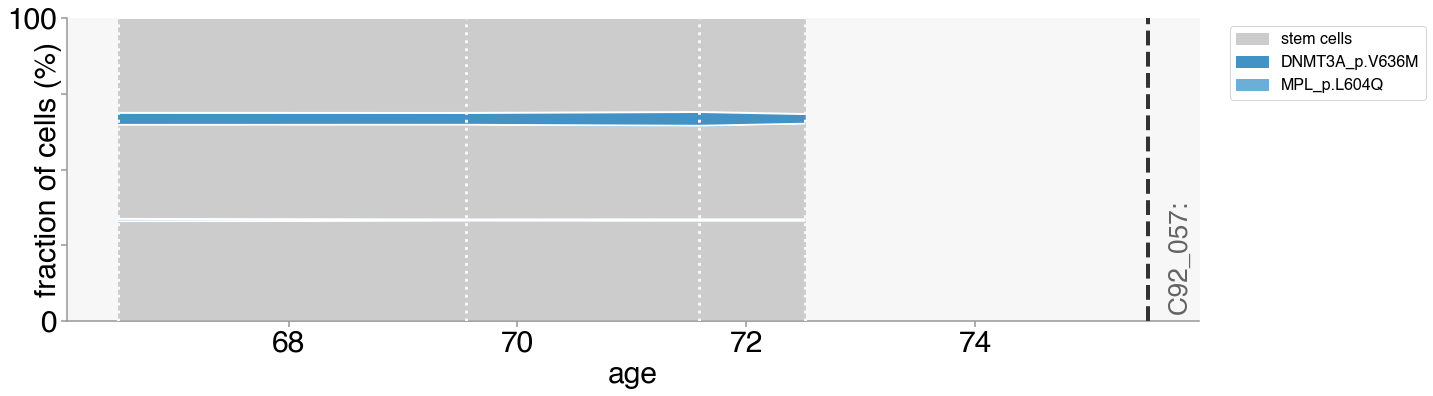

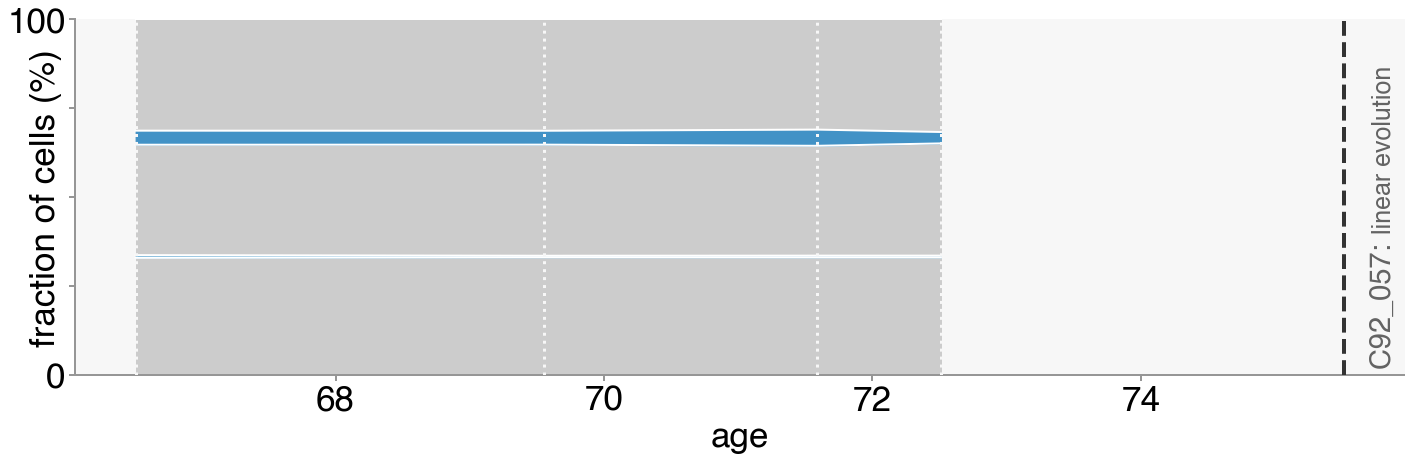

C92_058


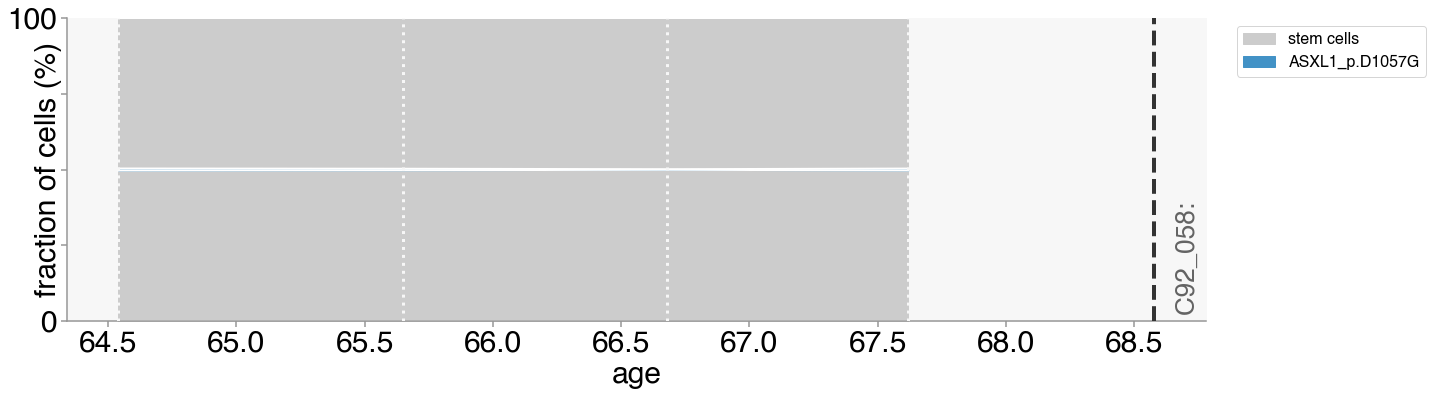

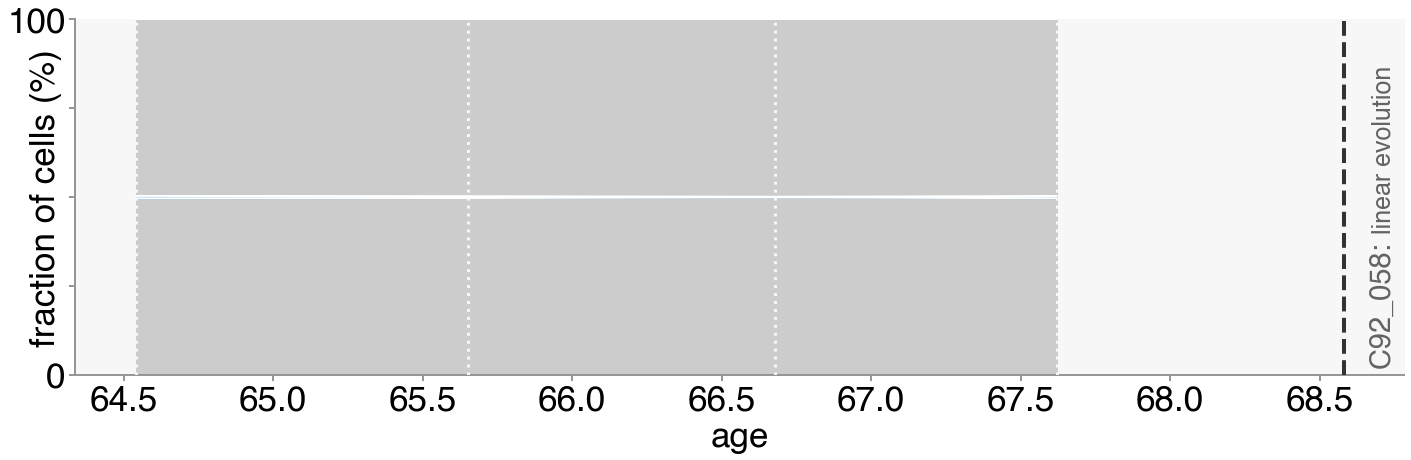

C92_062


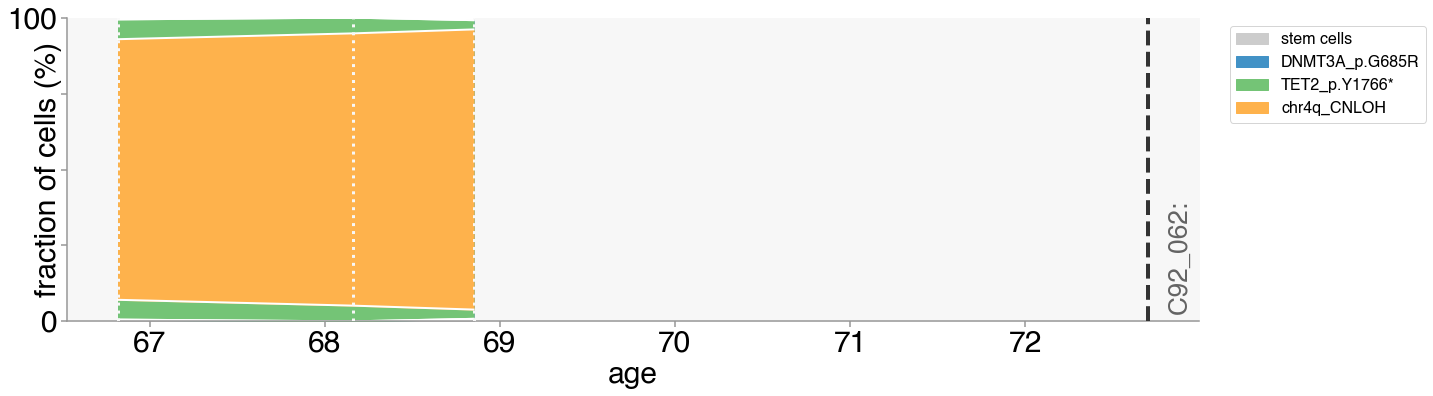

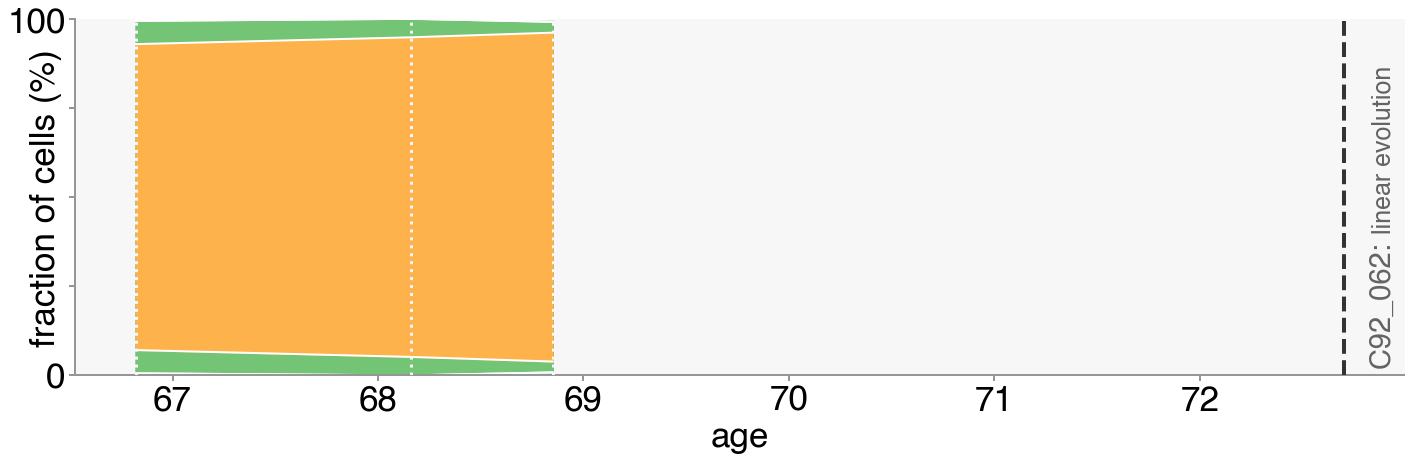

C92_063
C92_064
CEBPA_p.A170V has 1 mutation and no descendents
undetectable timepoints =  [67.27, 68.28]
CEBPA_p.A170V only present at one age


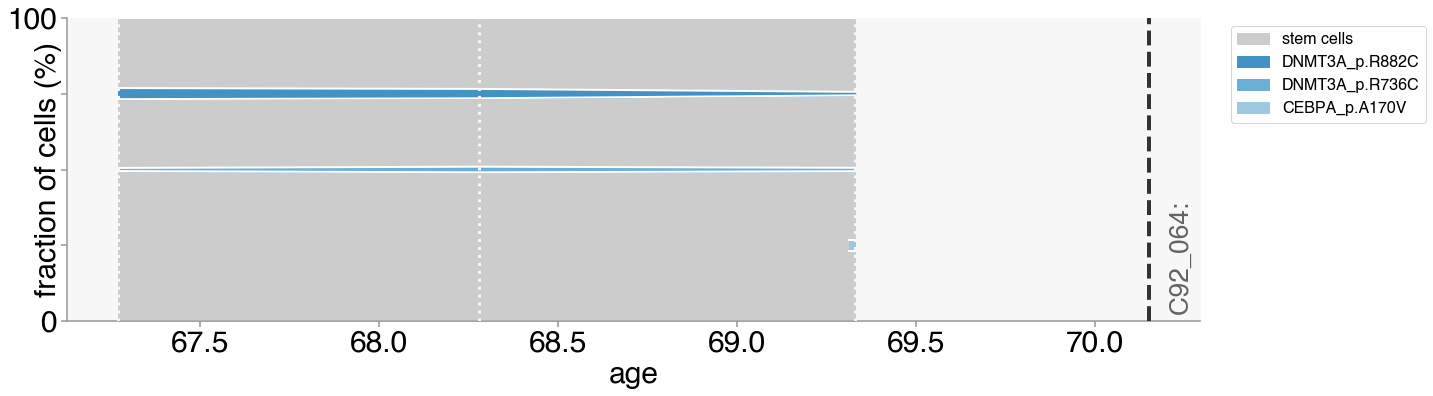

CEBPA_p.A170V has 1 mutation and no descendents
undetectable timepoints =  [67.27, 68.28]
CEBPA_p.A170V only present at one age


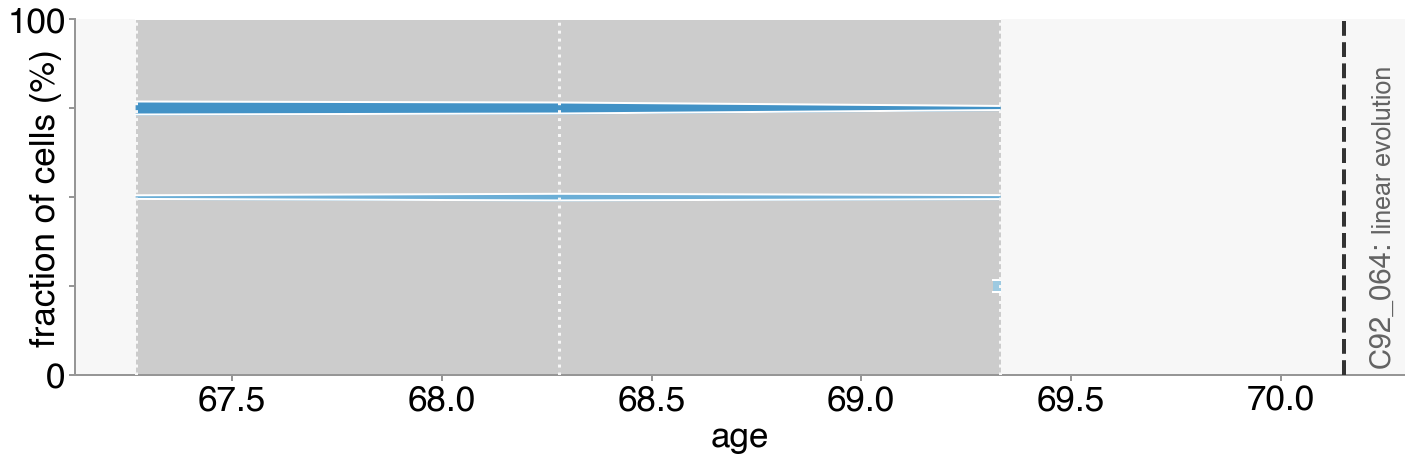

C92_065


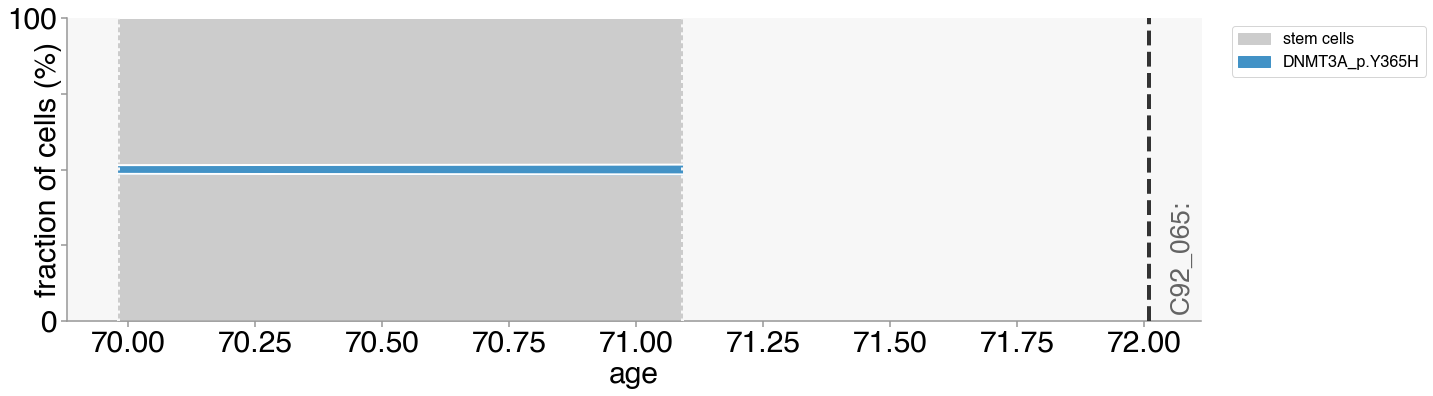

C92_067


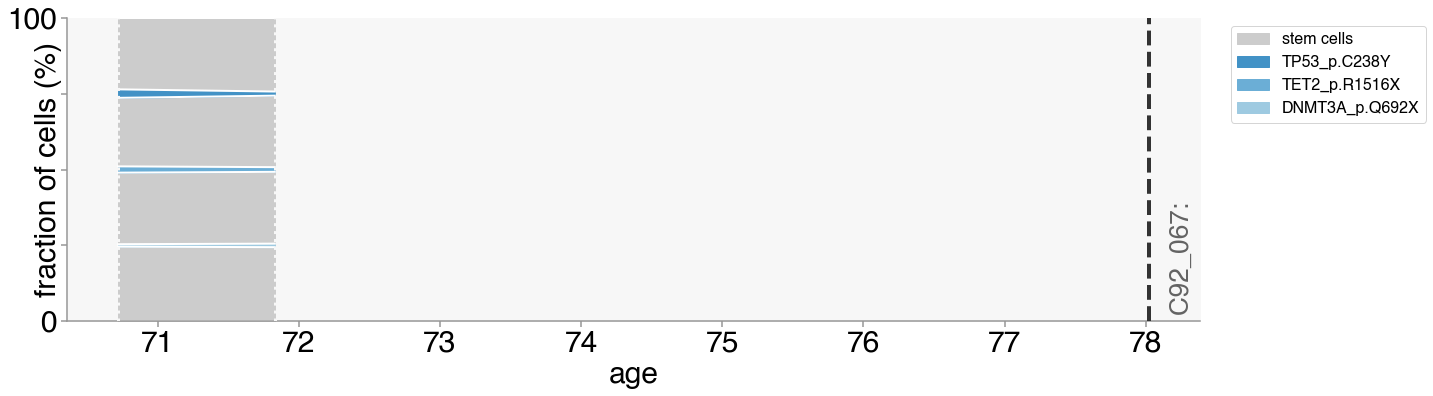

C92_070
TP53_p.Y234C has 1 mutation and no descendents
undetectable timepoints =  [67.57]
TP53_p.Y234C only present at one age


TP53_p.Y234C has 1 mutation and no descendents
undetectable timepoints =  [67.57]
TP53_p.Y234C only present at one age


C92_072
STAG2_p.R246X has 1 mutation and no descendents
undetectable timepoints =  [71.17]
STAG2_p.R246X only present at one age


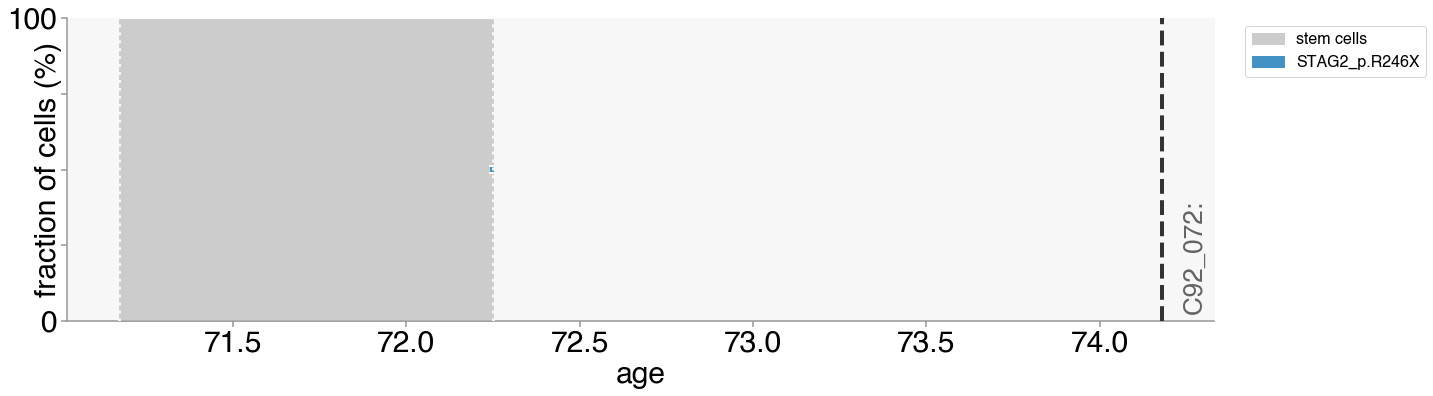

STAG2_p.R246X has 1 mutation and no descendents
undetectable timepoints =  [71.17]
STAG2_p.R246X only present at one age


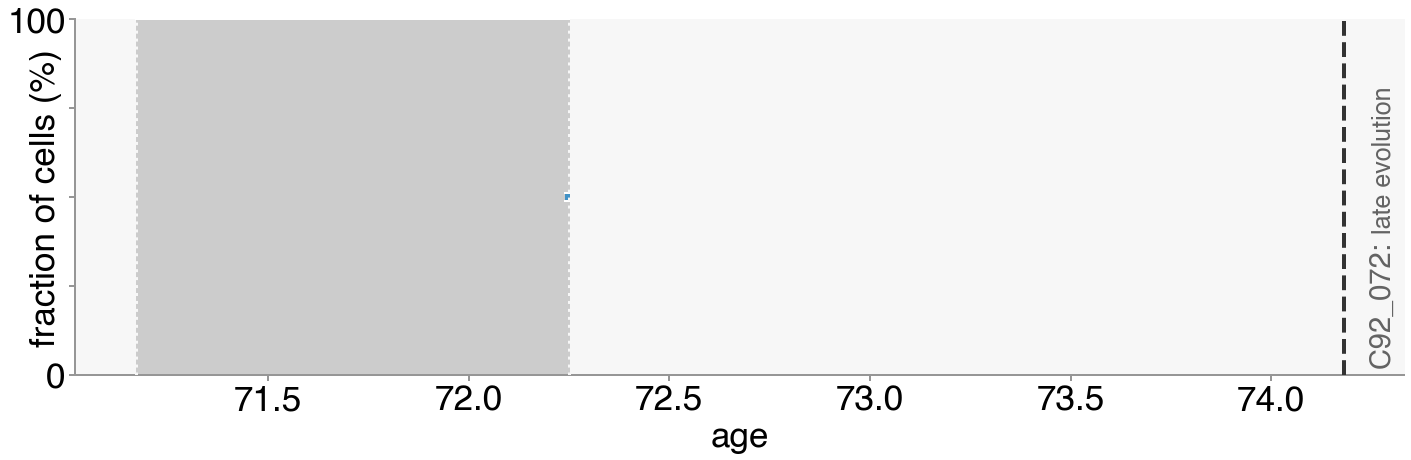

C92_088


C92_090
DNMT3A_p.R803K has 1 mutation and no descendents
undetectable timepoints =  [51.45]
DNMT3A_p.R803K only present at one age


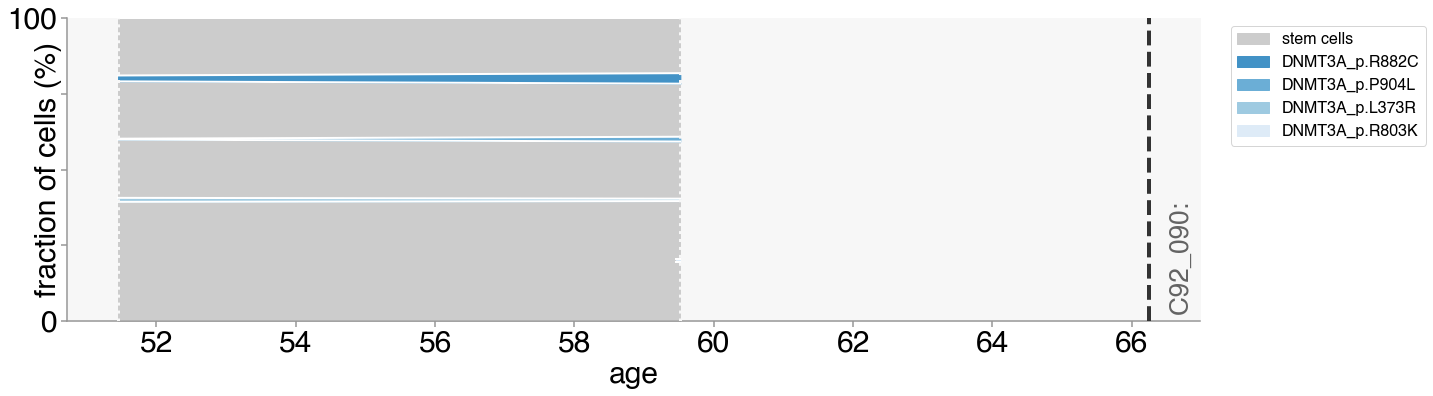

DNMT3A_p.R803K has 1 mutation and no descendents
undetectable timepoints =  [51.45]
DNMT3A_p.R803K only present at one age


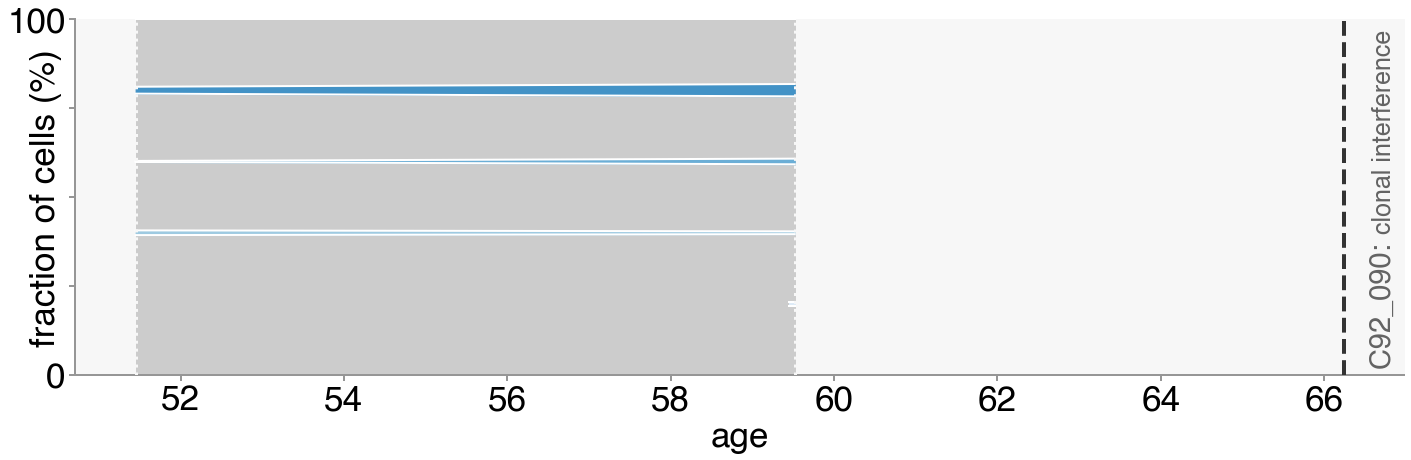

In [28]:
#Cases which don't need midline adjustment
cases_without_variants = []

for sample_name in cases:
    if sample_name not in cases_midline_shift.keys():
        if sample_name not in ['C92_034', 'C92_023']:
            print(sample_name)
            try:
                ages_list = sample_ages_sorted[sample_name]
                diagnosis_age = sample_diagnosis_age[sample_name]
                phylogeny = retrieve_phylogeny(sample_name)
                phylogeny = add_midline_shift(phylogeny, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                phylogeny = trajectory_colors(phylogeny)
                timepoints = cell_fraction_timepoints(phylogeny, ages_list)
                Muller_plot_v3_muller_colours(timepoints, phylogeny, sample_name, diagnosis_age)
                Muller_plot_v3_muller_colours_no_legend(timepoints, phylogeny, sample_name, diagnosis_age)
            except FileNotFoundError:
                cases_without_variants.append(sample_name)

# Controls Muller plots

## Controls that need midline shift of trajectory

TET2_p.Q1542_Q1548del has 1 mutation and no descendents
undetectable timepoints =  [67.93]


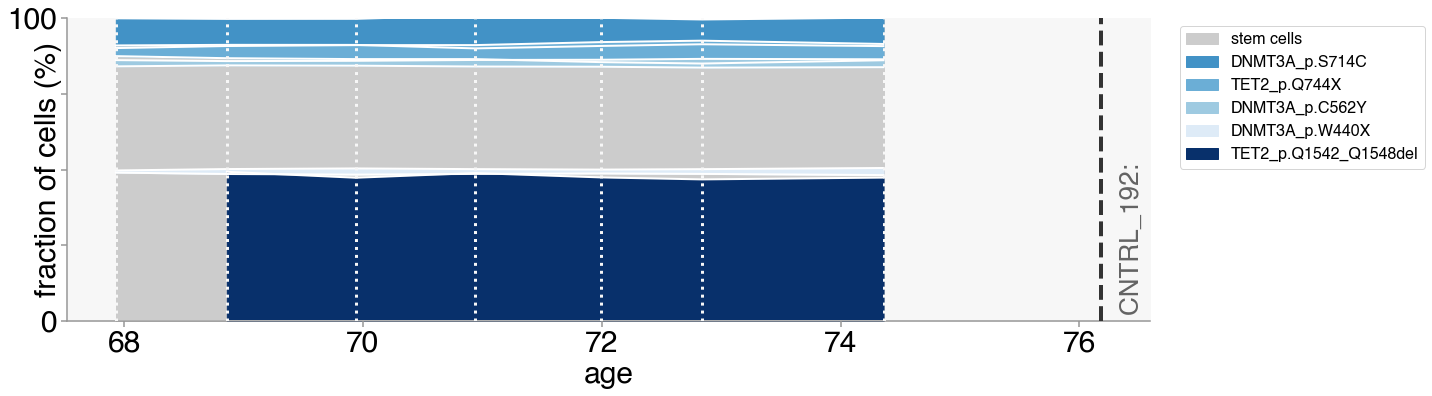

TET2_p.Q1542_Q1548del has 1 mutation and no descendents
undetectable timepoints =  [67.93]


In [29]:
sample_name = 'CNTRL_192'
ages_list = sample_ages_sorted[sample_name]
diagnosis_age = sample_diagnosis_age[sample_name]
phylogeny = retrieve_phylogeny(sample_name)
phylogeny = add_midline_shift(phylogeny, [0, 12, 22, 35, 16, 0, 0])
phylogeny = trajectory_colors(phylogeny)
timepoints = cell_fraction_timepoints(phylogeny, ages_list)
Muller_plot_v3_muller_colours(timepoints, phylogeny, sample_name, diagnosis_age)
Muller_plot_v3_muller_colours_no_legend(timepoints, phylogeny, sample_name, diagnosis_age)

## Controls that do not need midline shift of trajectory

DNMT3A_p.G699D has 1 mutation and no descendents
undetectable timepoints =  [68.64, 69.46]


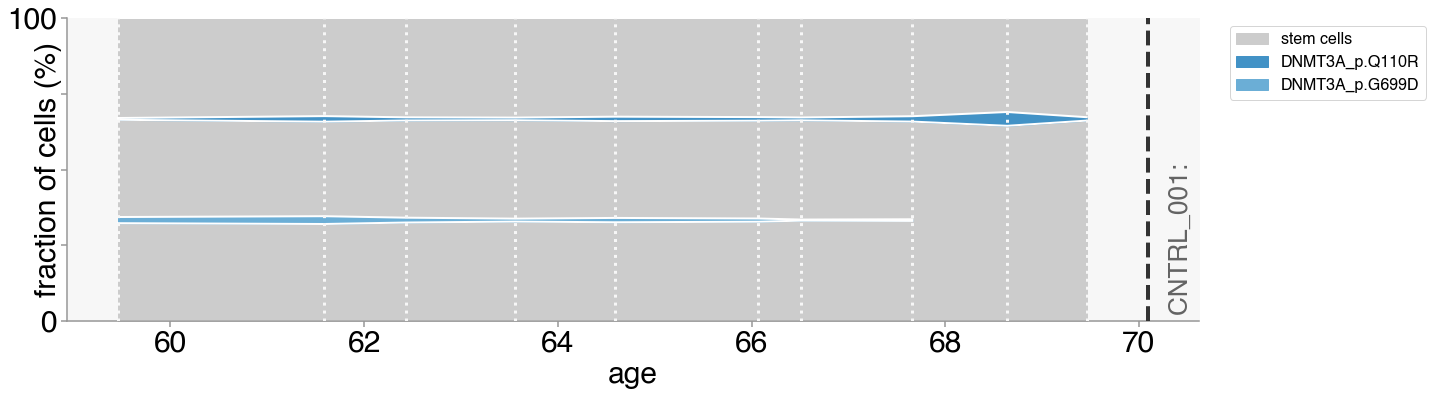

DNMT3A_p.G699D has 1 mutation and no descendents
undetectable timepoints =  [68.64, 69.46]


TP53_p.P151S has 1 mutation and no descendents
undetectable timepoints =  [66.66]
ASXL1_p.L1173S has 1 mutation and no descendents
undetectable timepoints =  [66.66, 69.72, 70.87, 73.9, 74.65]
ASXL1_p.L1173S only present at one age


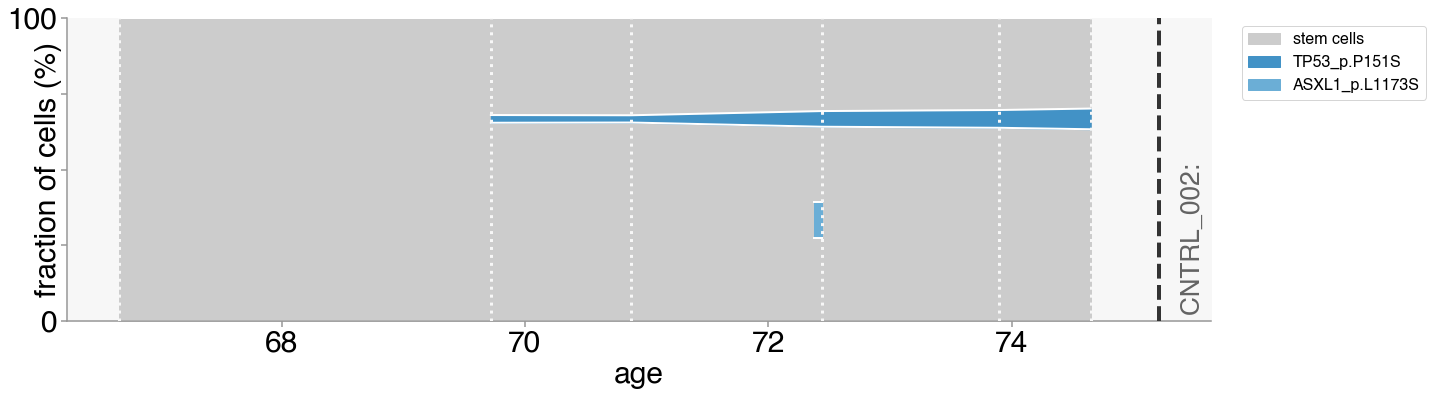

TP53_p.P151S has 1 mutation and no descendents
undetectable timepoints =  [66.66]
ASXL1_p.L1173S has 1 mutation and no descendents
undetectable timepoints =  [66.66, 69.72, 70.87, 73.9, 74.65]
ASXL1_p.L1173S only present at one age


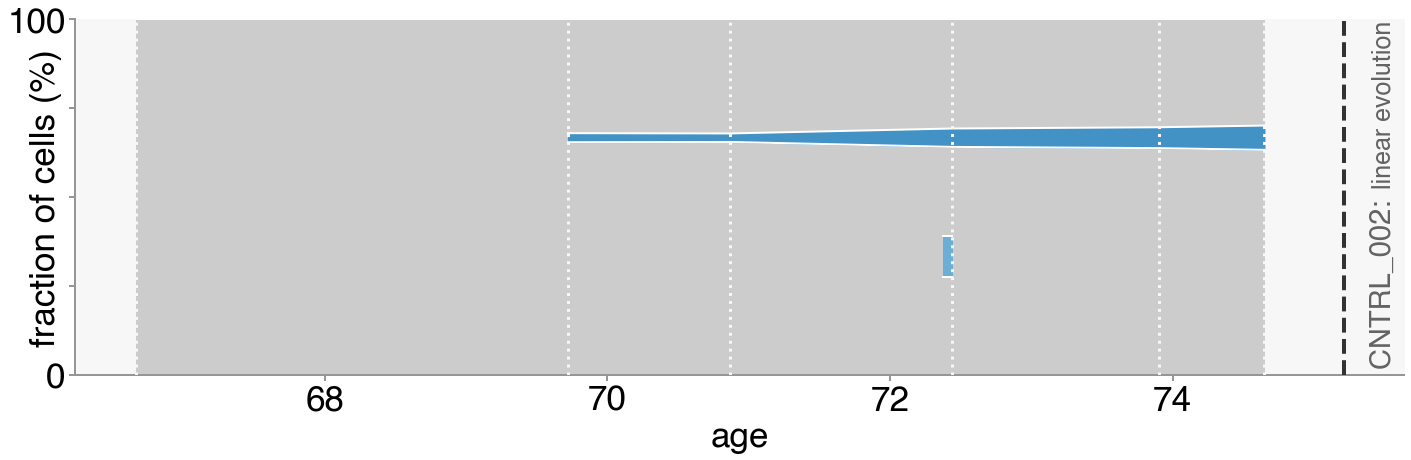

DNMT3A_p.F731I has 1 mutation and no descendents
undetectable timepoints =  [74.33]


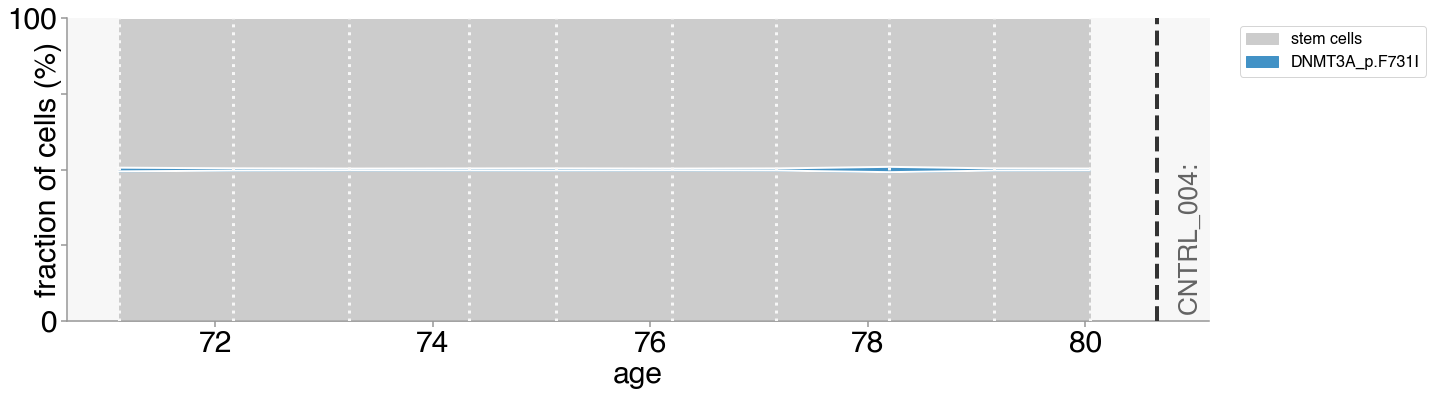

DNMT3A_p.F731I has 1 mutation and no descendents
undetectable timepoints =  [74.33]


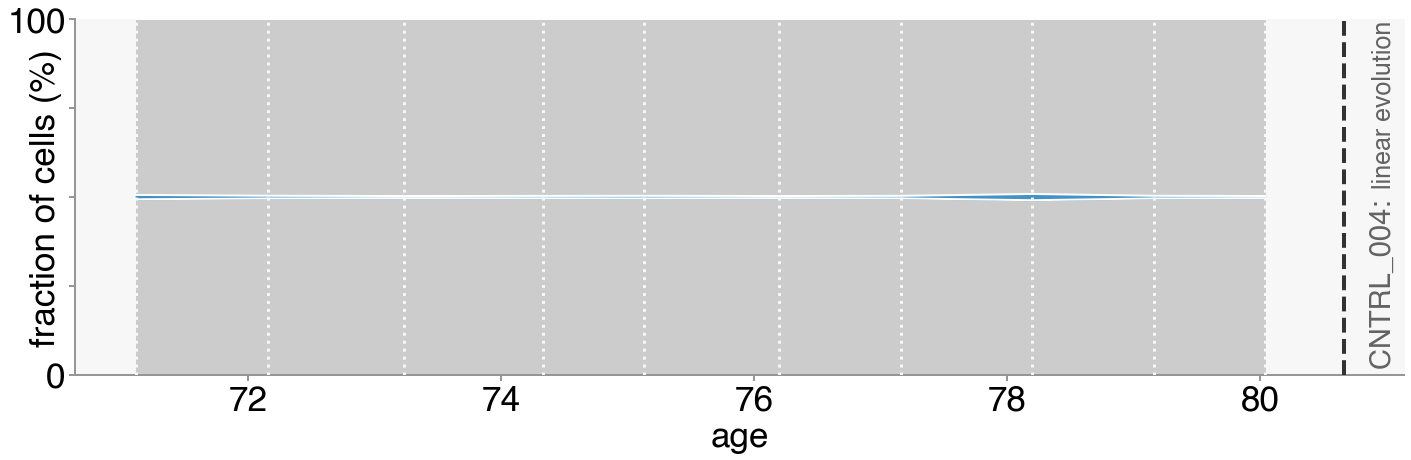

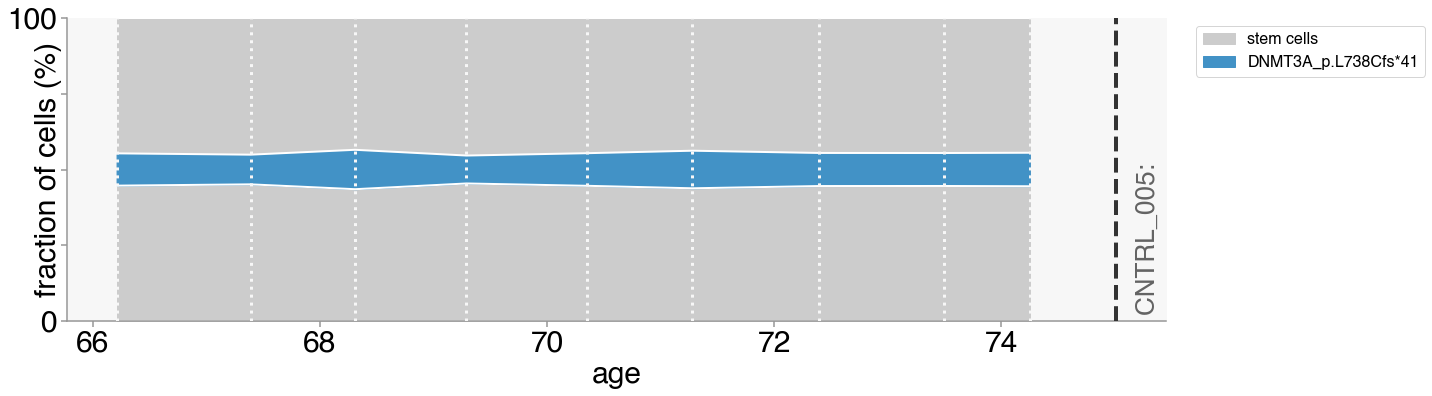

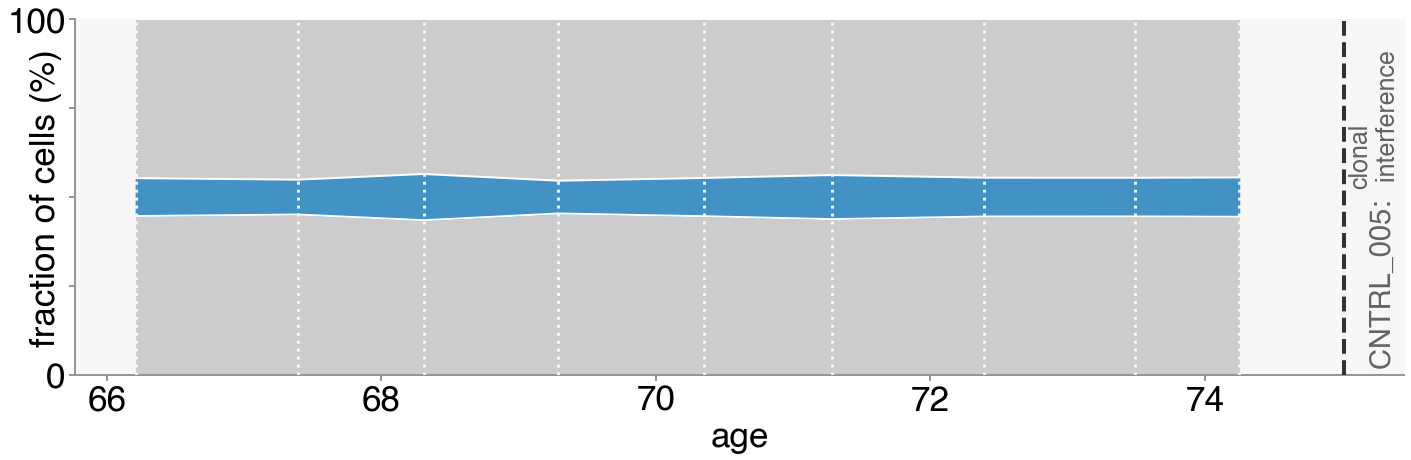

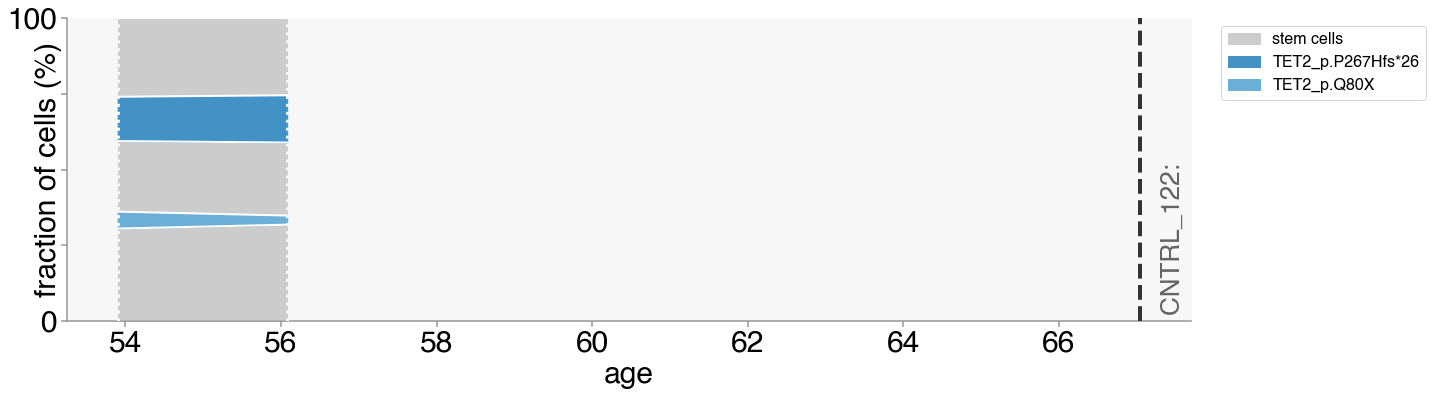

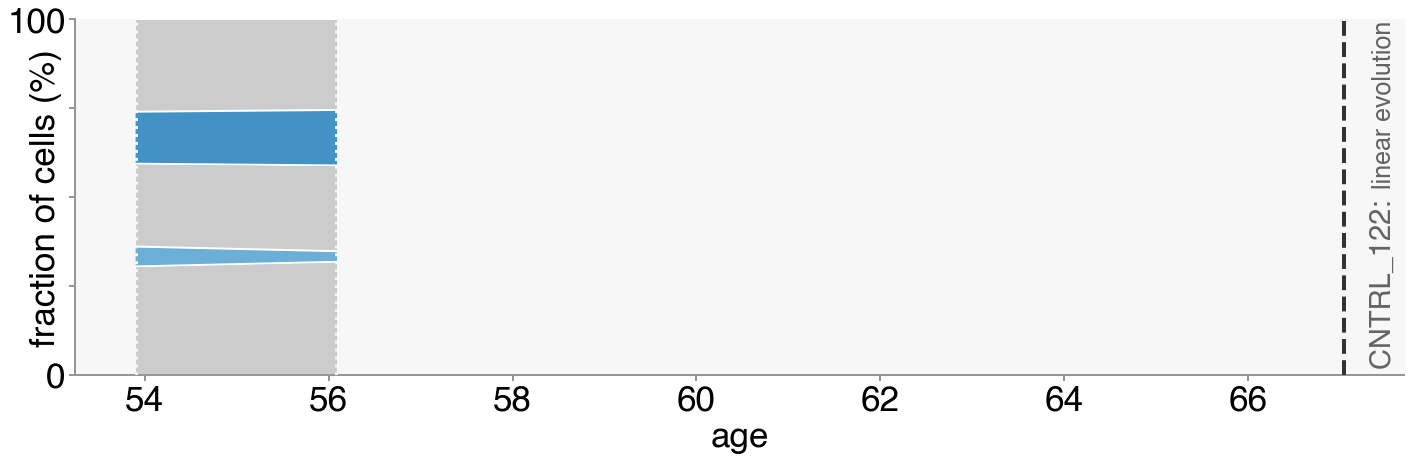

TET2_p.C1263F has 1 mutation and no descendents
undetectable timepoints =  [57.17, 58.27]


TET2_p.C1263F has 1 mutation and no descendents
undetectable timepoints =  [57.17, 58.27]


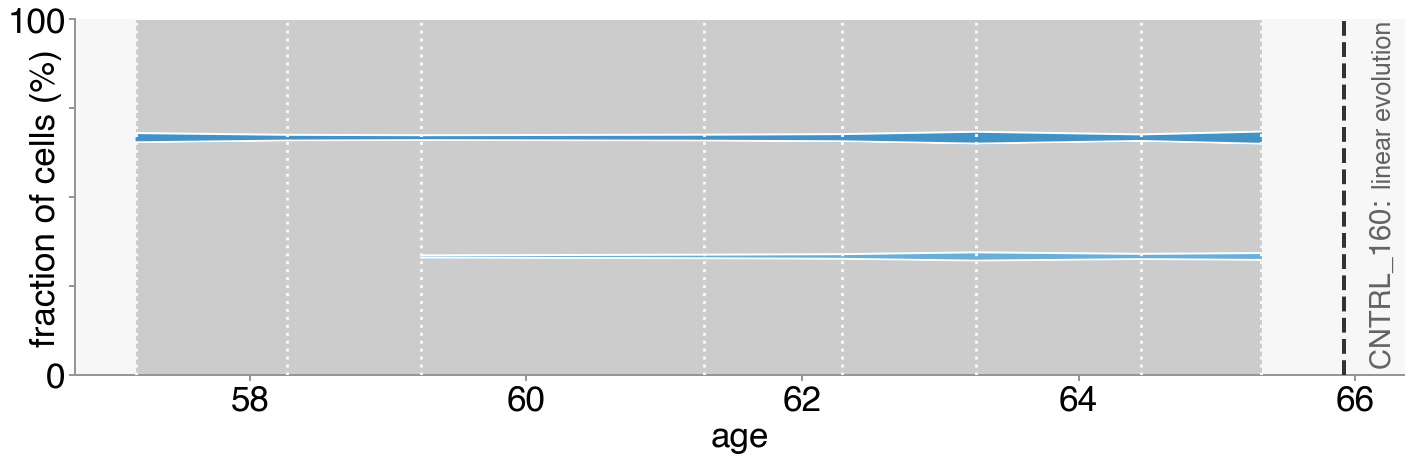

CHEK2_p.K197I has 1 mutation and no descendents
undetectable timepoints =  [63.57]
STAG2_p.E534V has 1 mutation and no descendents
undetectable timepoints =  [62.51, 64.55, 65.5, 66.67]
STAG2_p.E534V only present at one age
TP53_p.S9C has 1 mutation and no descendents
undetectable timepoints =  [62.51, 64.55, 65.5, 66.67]
TP53_p.S9C only present at one age


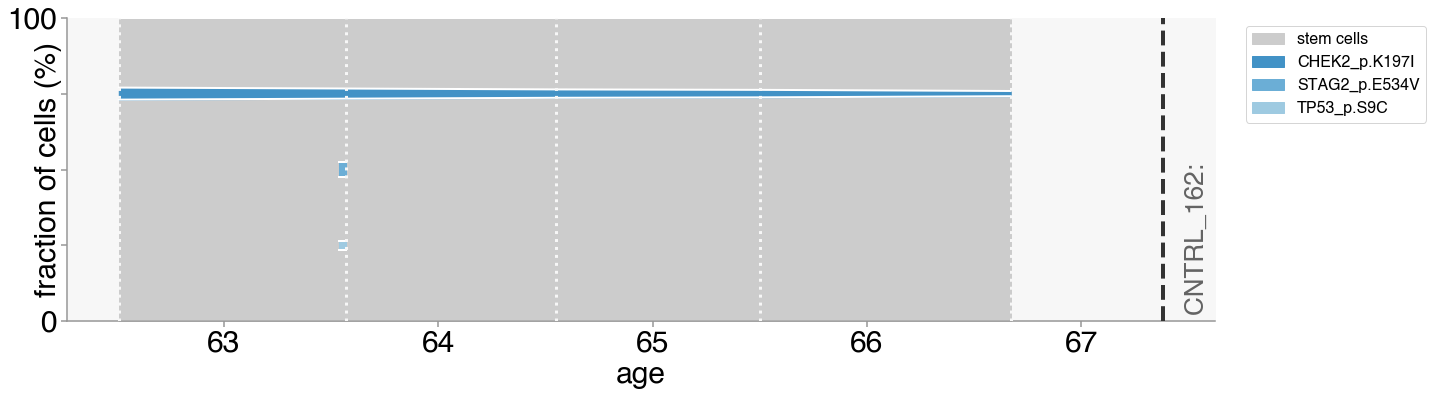

CHEK2_p.K197I has 1 mutation and no descendents
undetectable timepoints =  [63.57]
STAG2_p.E534V has 1 mutation and no descendents
undetectable timepoints =  [62.51, 64.55, 65.5, 66.67]
STAG2_p.E534V only present at one age
TP53_p.S9C has 1 mutation and no descendents
undetectable timepoints =  [62.51, 64.55, 65.5, 66.67]
TP53_p.S9C only present at one age


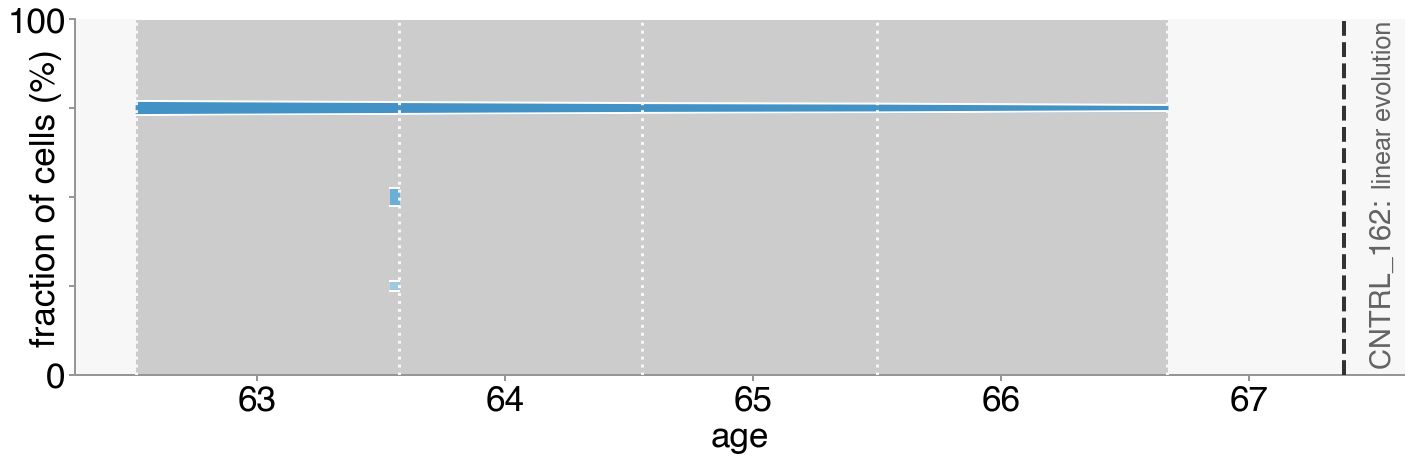

TP53_p.C275Y has 1 mutation and no descendents
undetectable timepoints =  [68.03]
GNAS_p.R86S has 1 mutation and no descendents
undetectable timepoints =  [62.87, 63.96, 65.98]


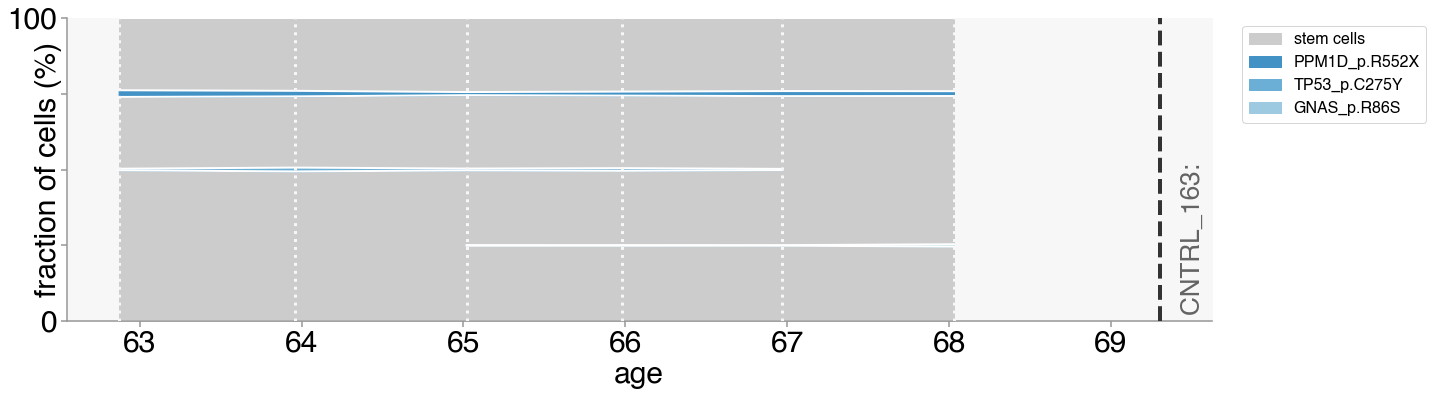

TP53_p.C275Y has 1 mutation and no descendents
undetectable timepoints =  [68.03]
GNAS_p.R86S has 1 mutation and no descendents
undetectable timepoints =  [62.87, 63.96, 65.98]


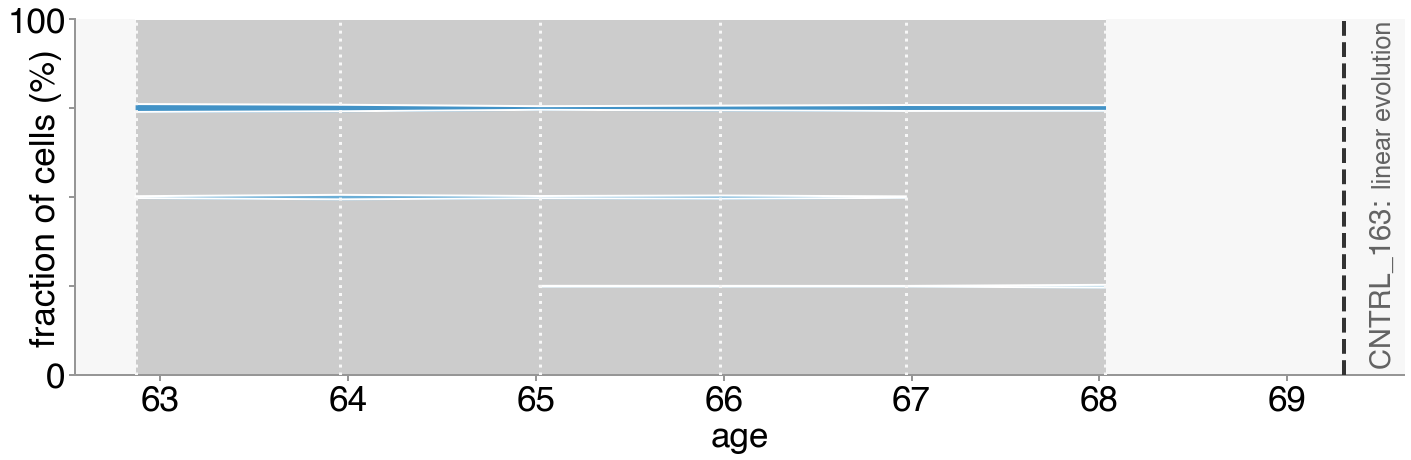

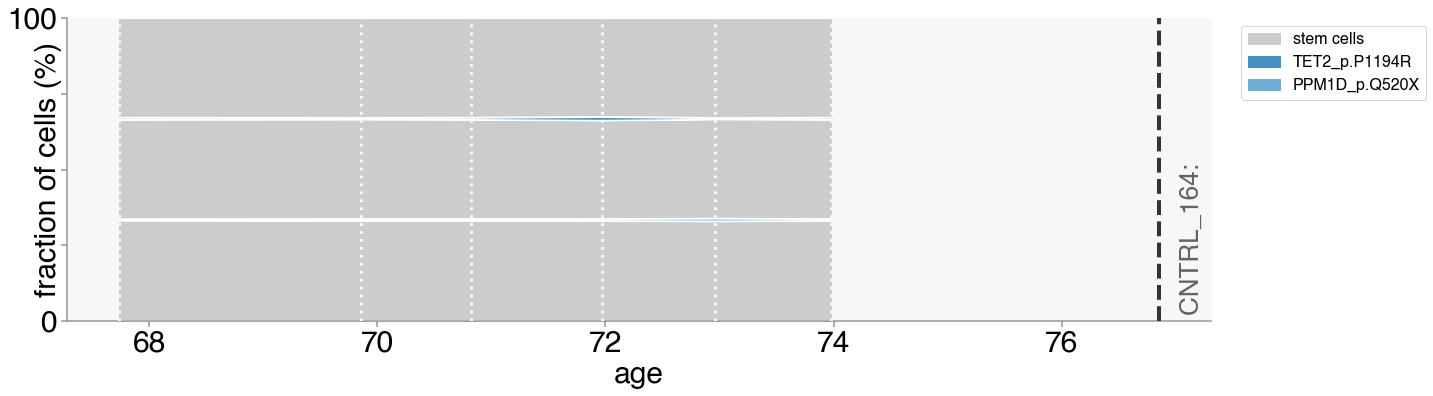

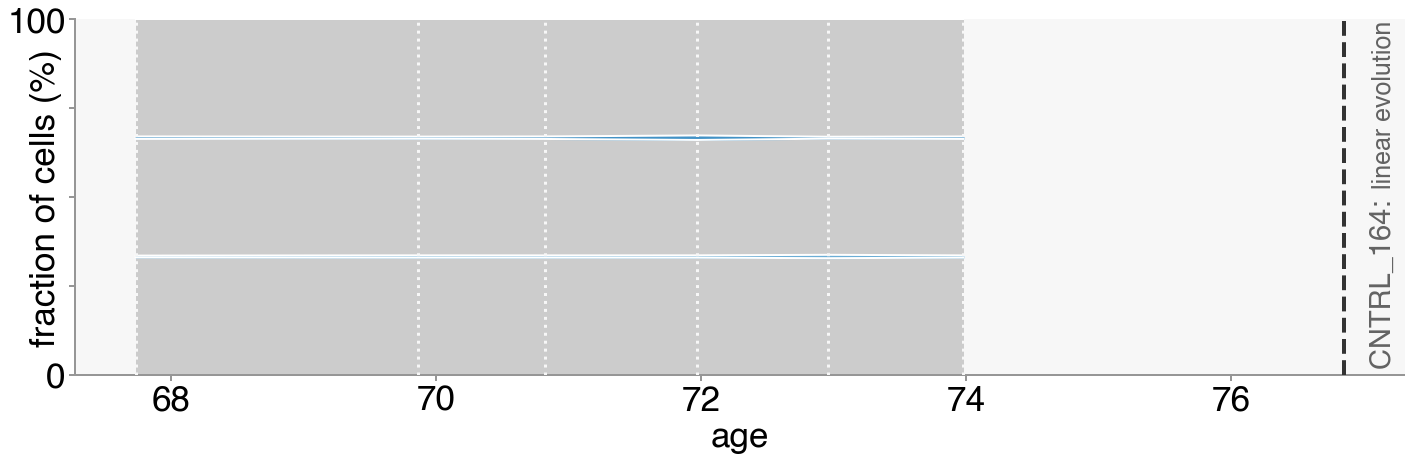

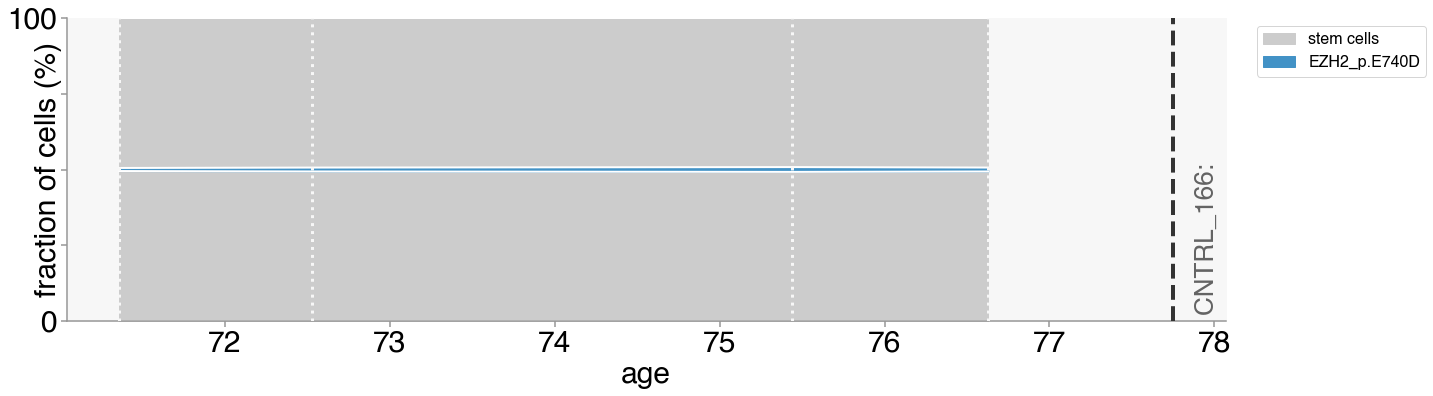

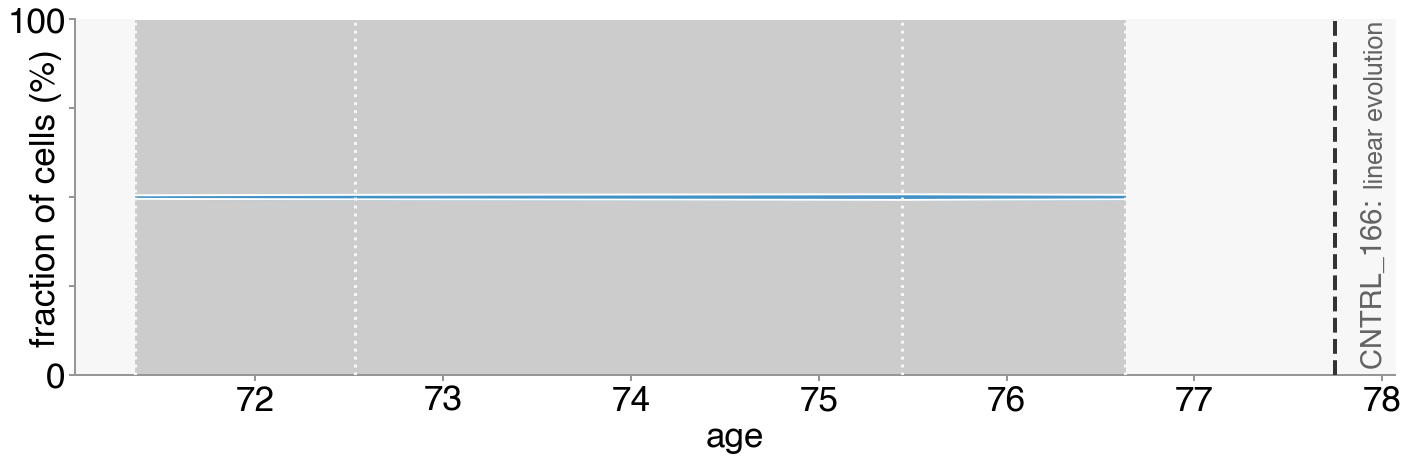

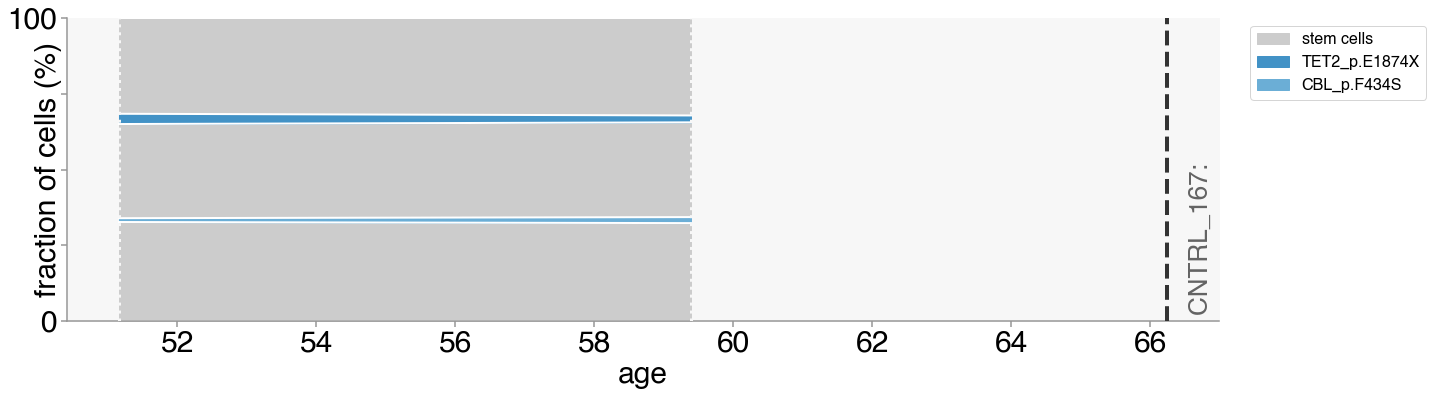

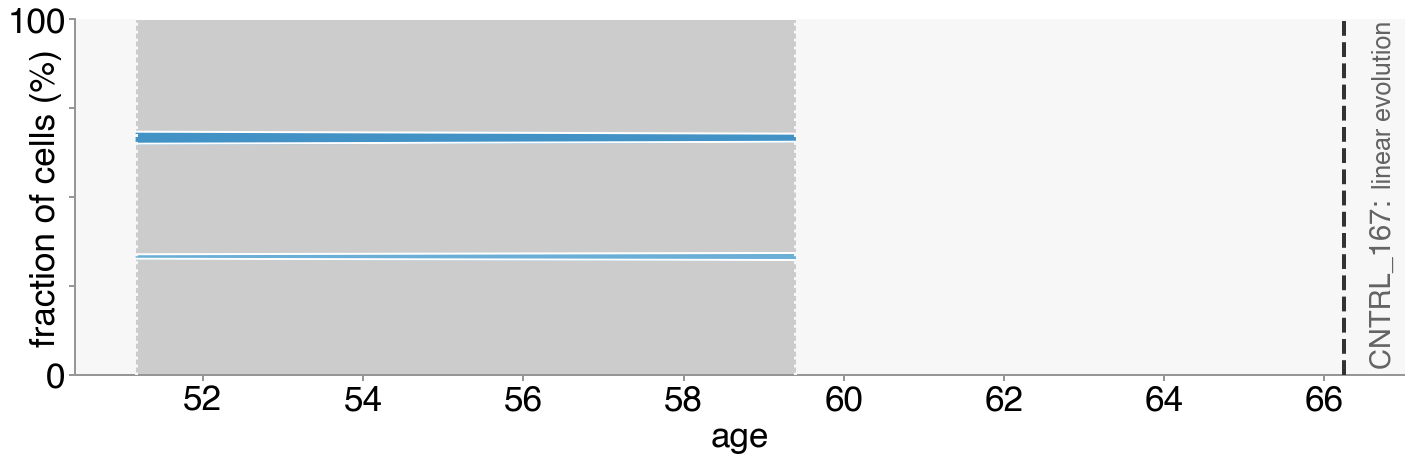

DNMT3A_p.R556S has 1 mutation and no descendents
undetectable timepoints =  [72.58]


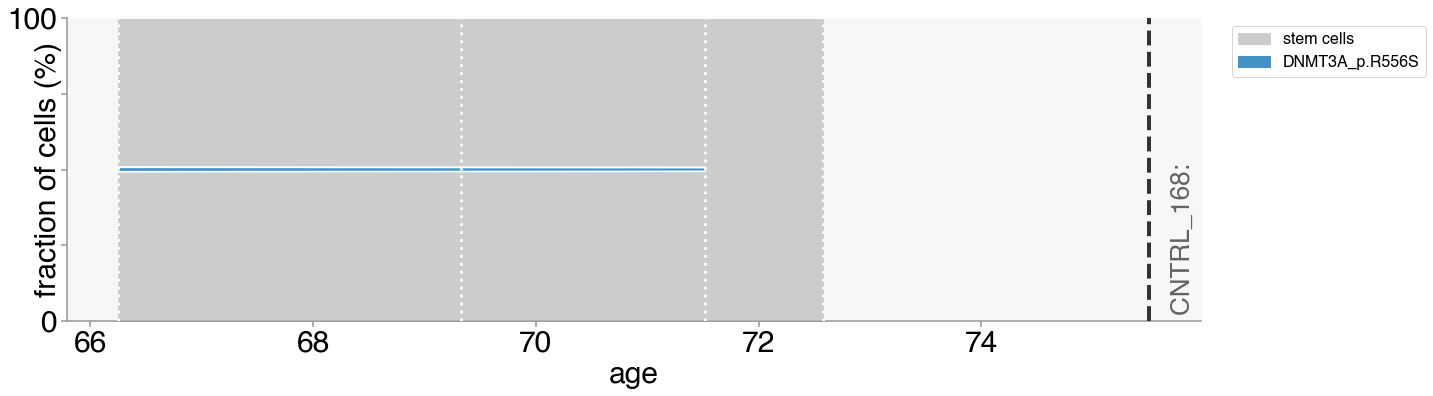

DNMT3A_p.R556S has 1 mutation and no descendents
undetectable timepoints =  [72.58]


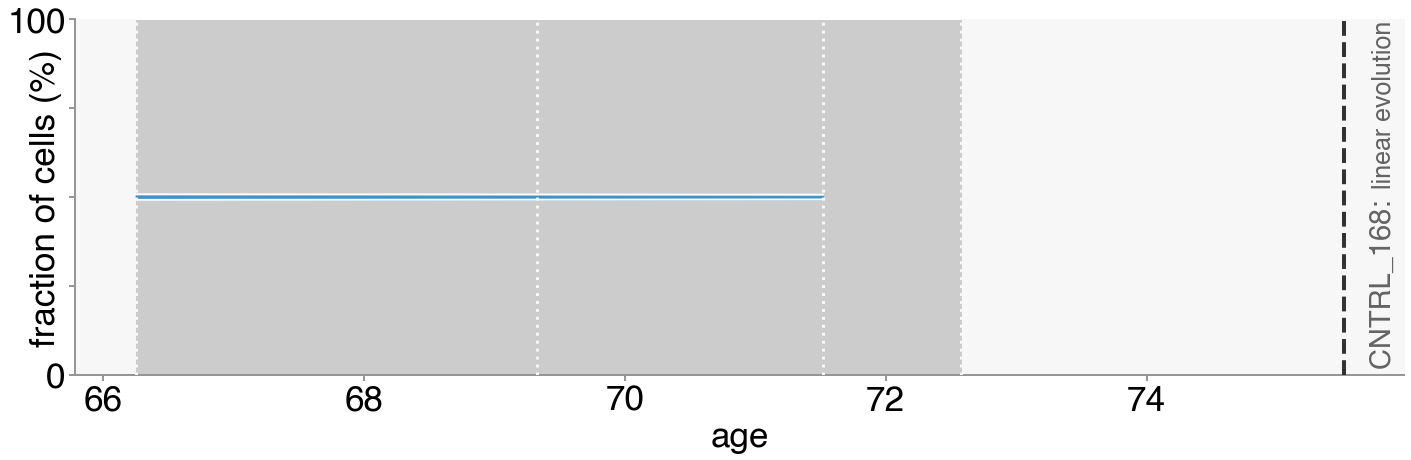

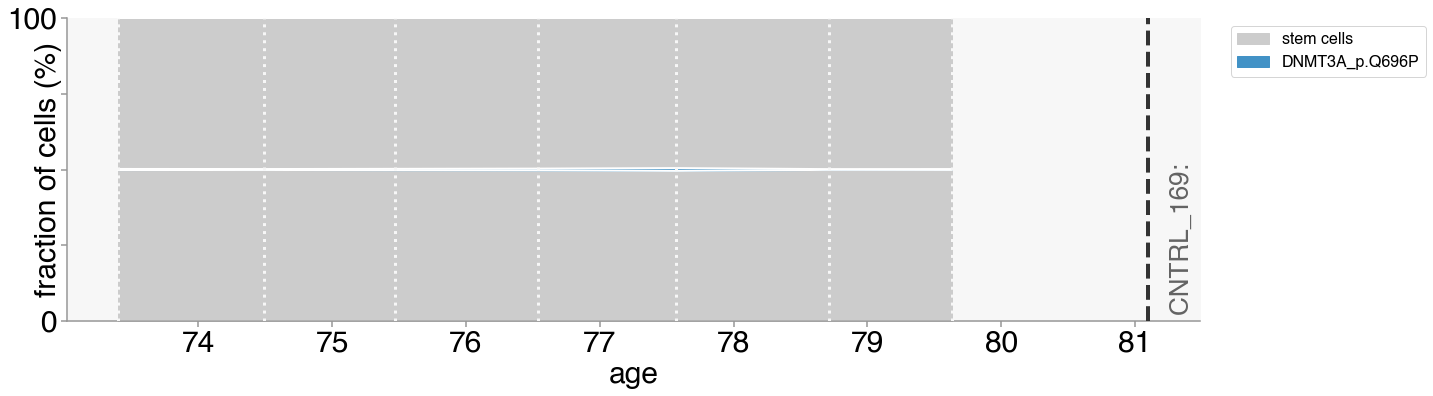

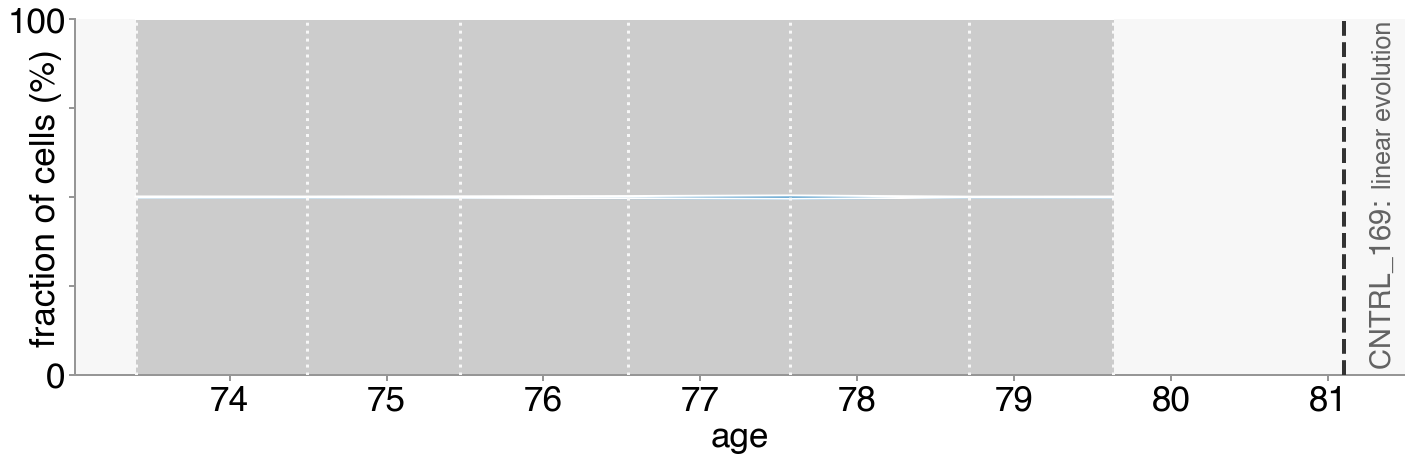

EZH2_p.Q415X has 1 mutation and no descendents
undetectable timepoints =  [58.7]


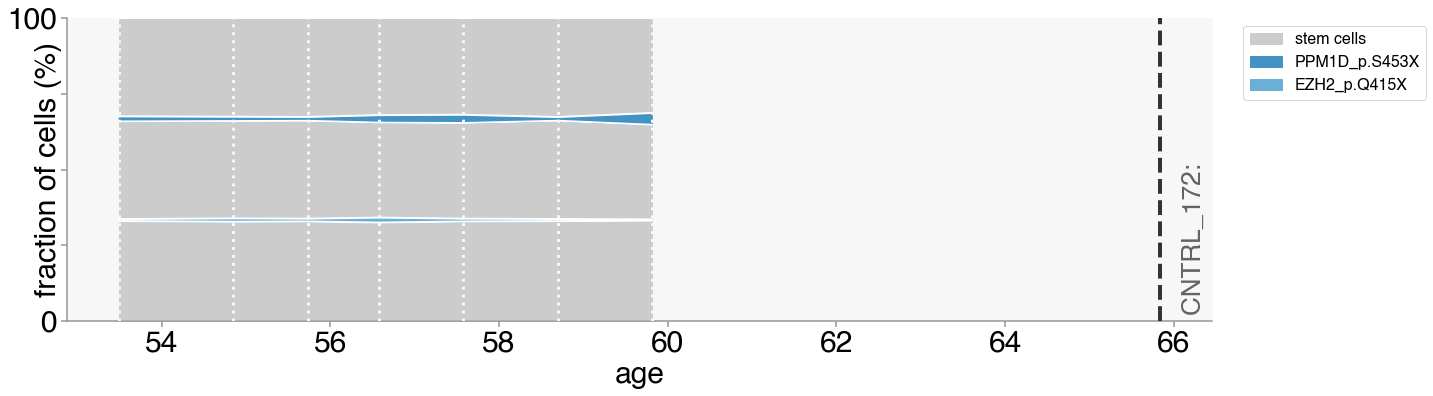

EZH2_p.Q415X has 1 mutation and no descendents
undetectable timepoints =  [58.7]


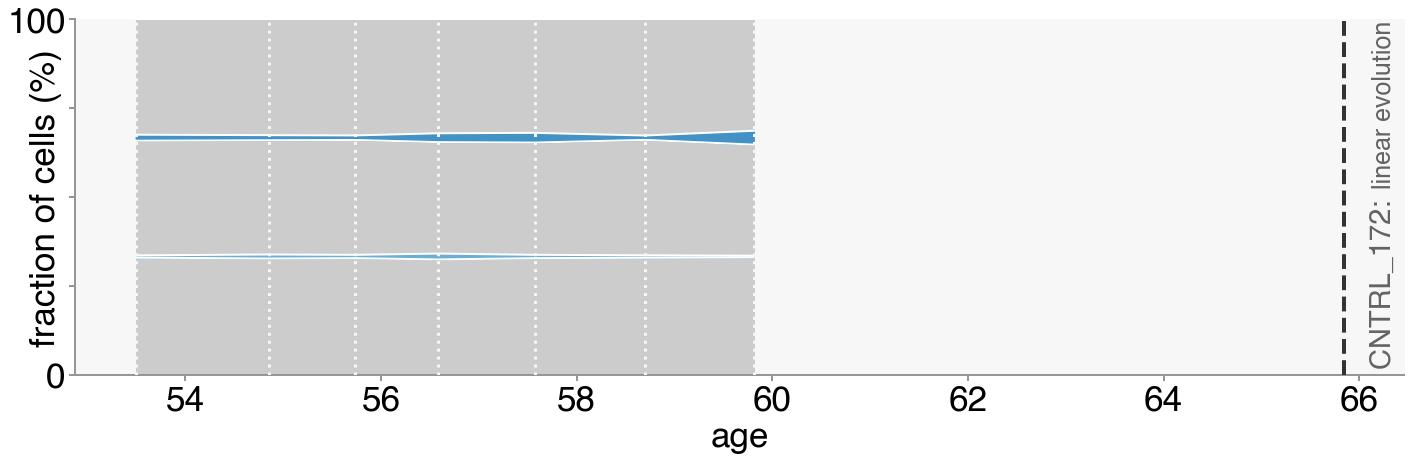

DNMT3A_p.R771X only present at one age


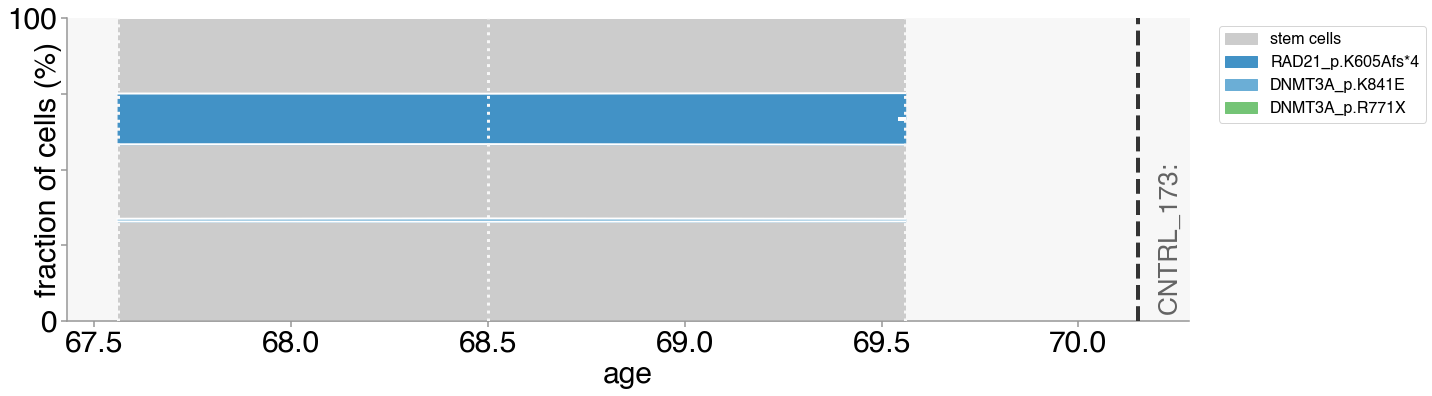

DNMT3A_p.R771X only present at one age


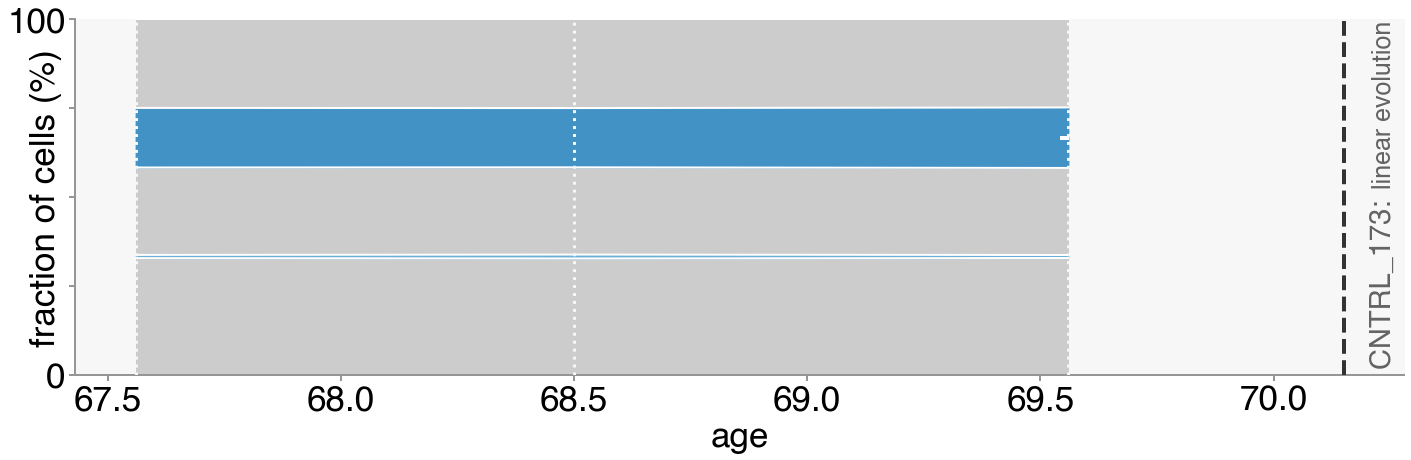

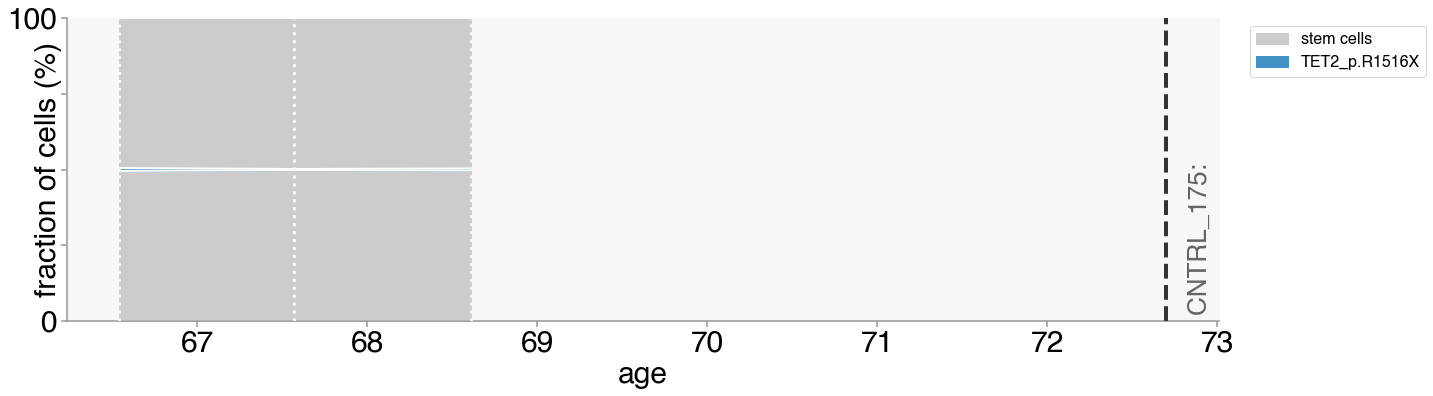

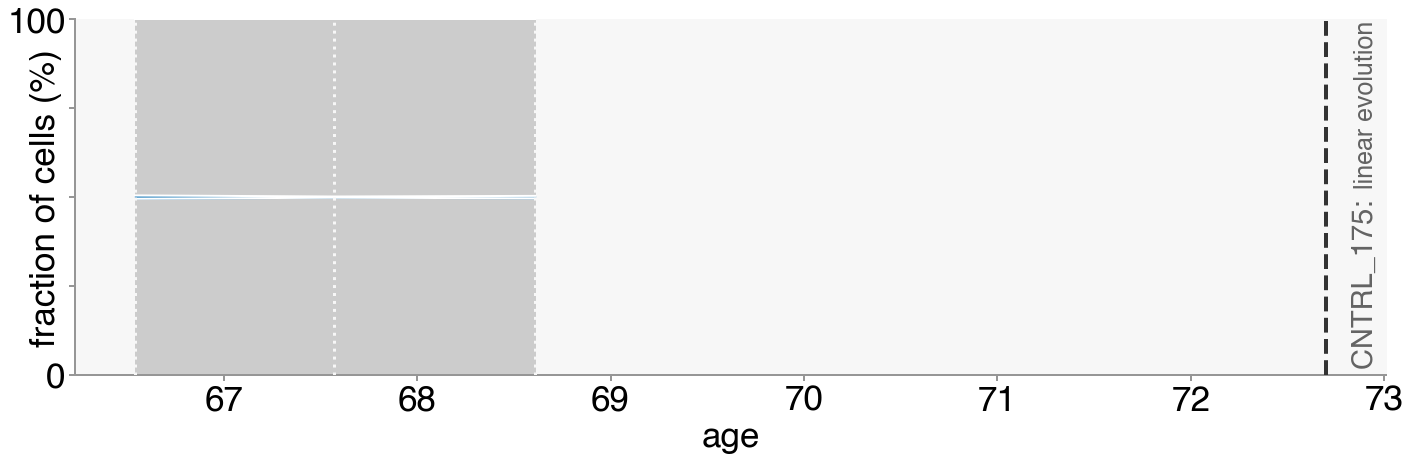

TET2_p.R544X has 1 mutation and no descendents
undetectable timepoints =  [71.07]


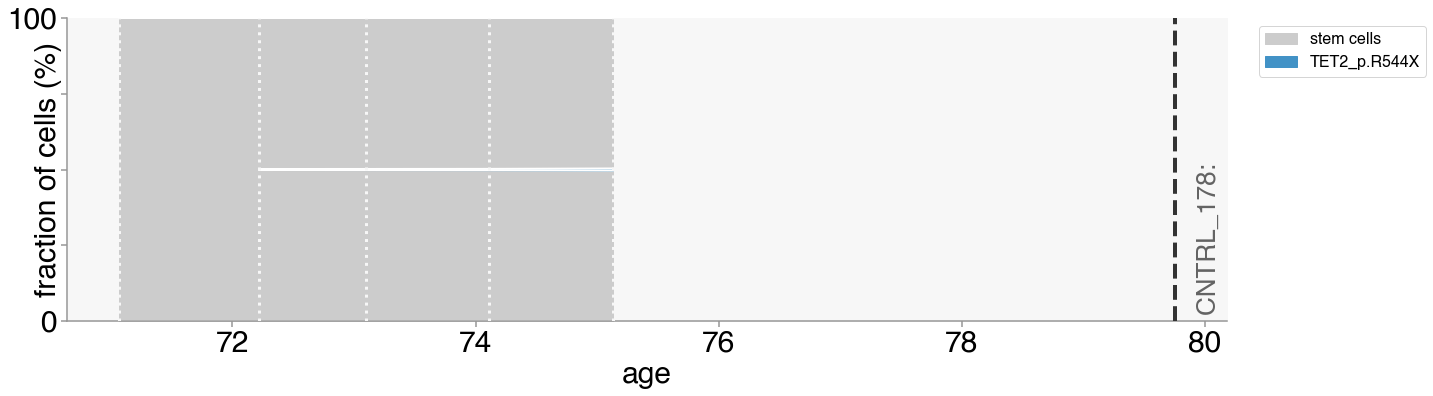

TET2_p.R544X has 1 mutation and no descendents
undetectable timepoints =  [71.07]


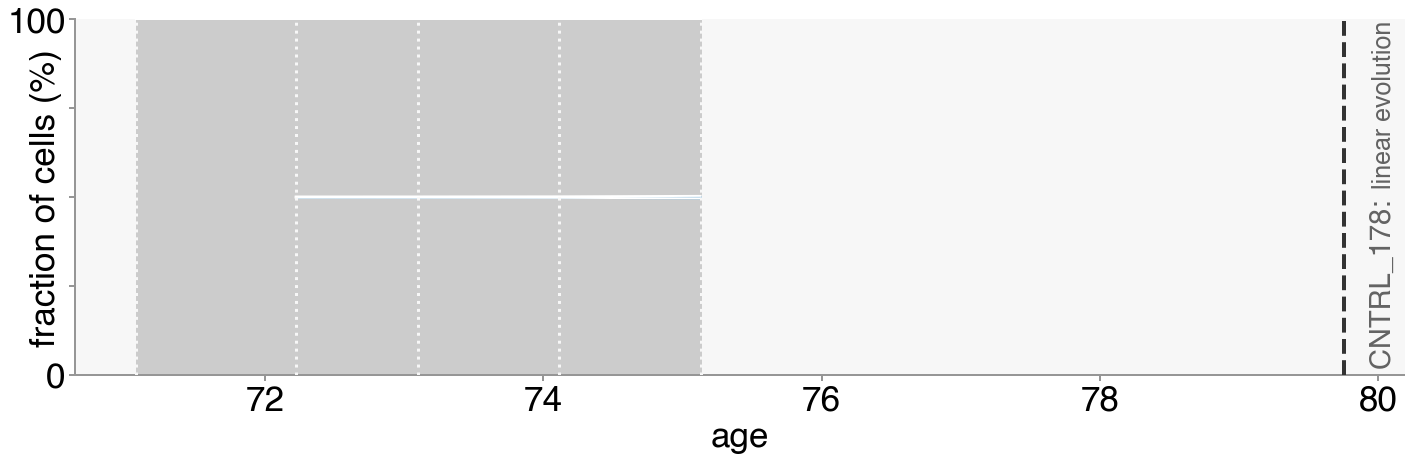

ZRSR2_p.R126X only present at one age


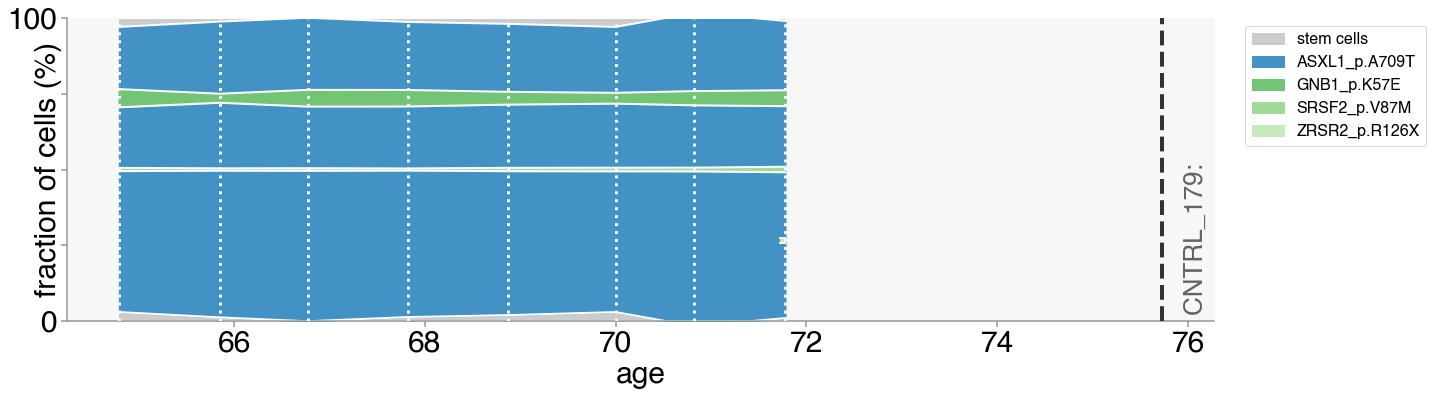

ZRSR2_p.R126X only present at one age


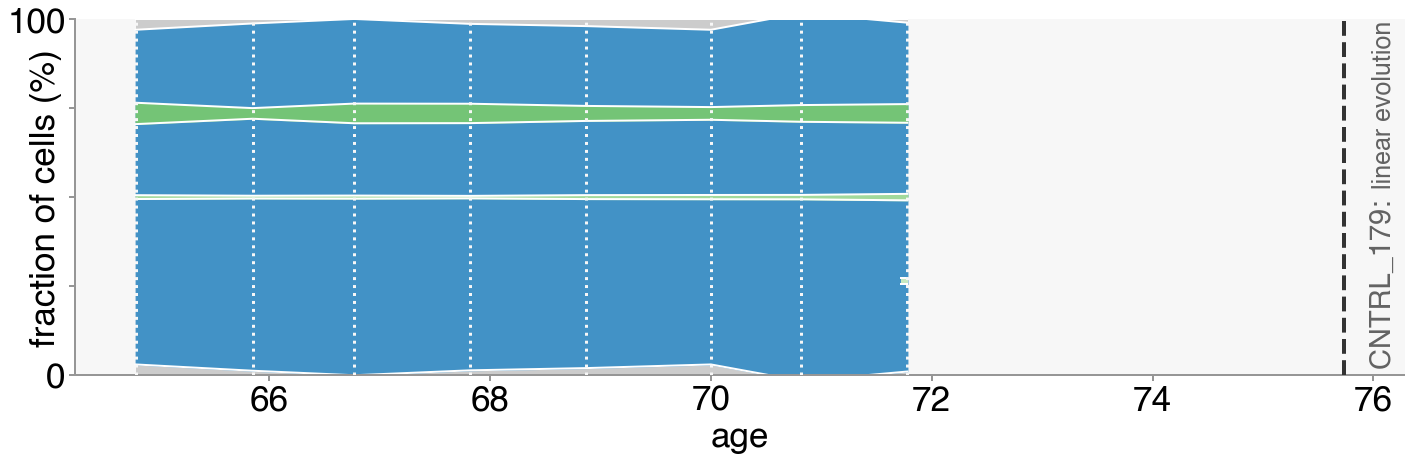

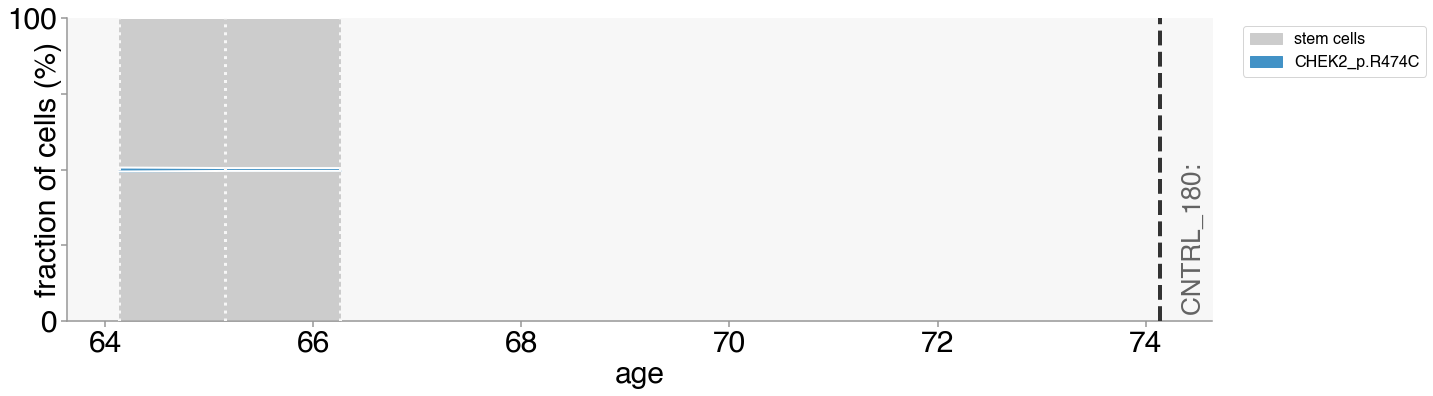

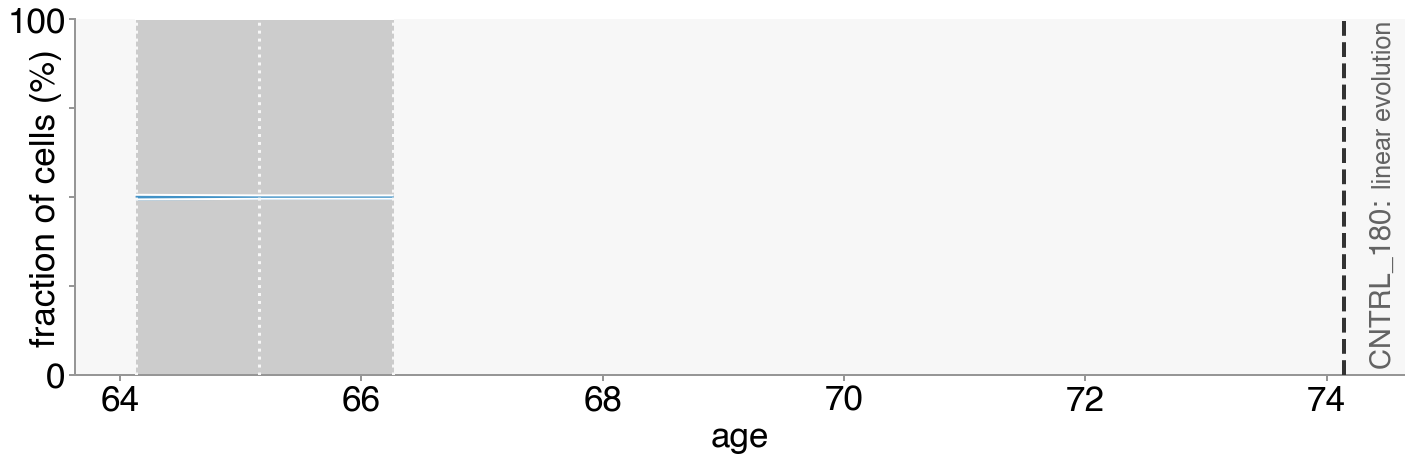

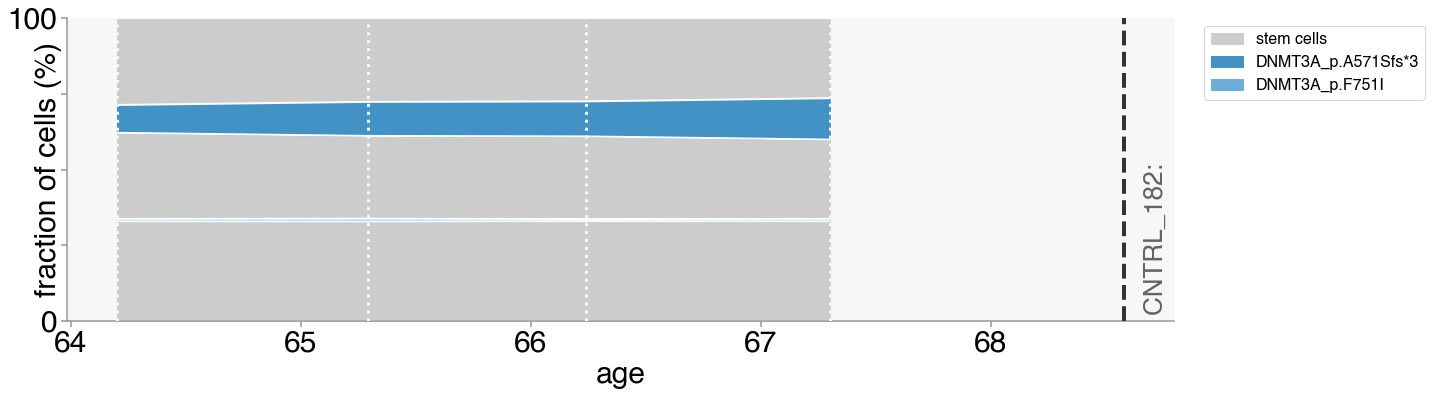

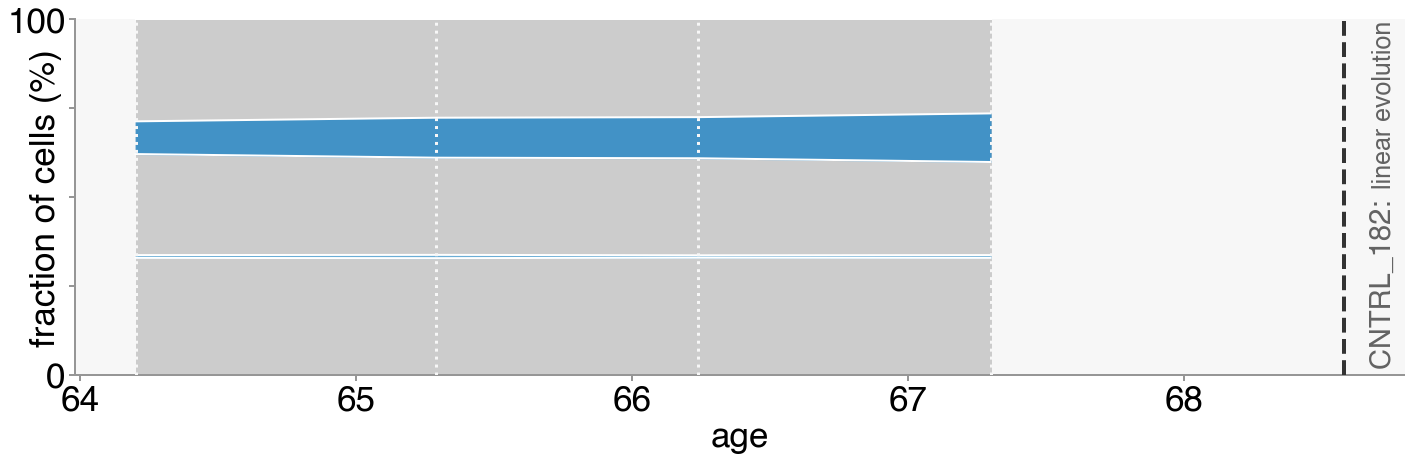

CHEK2_p.Q11H has 1 mutation and no descendents
undetectable timepoints =  [60.28, 61.33, 62.33]


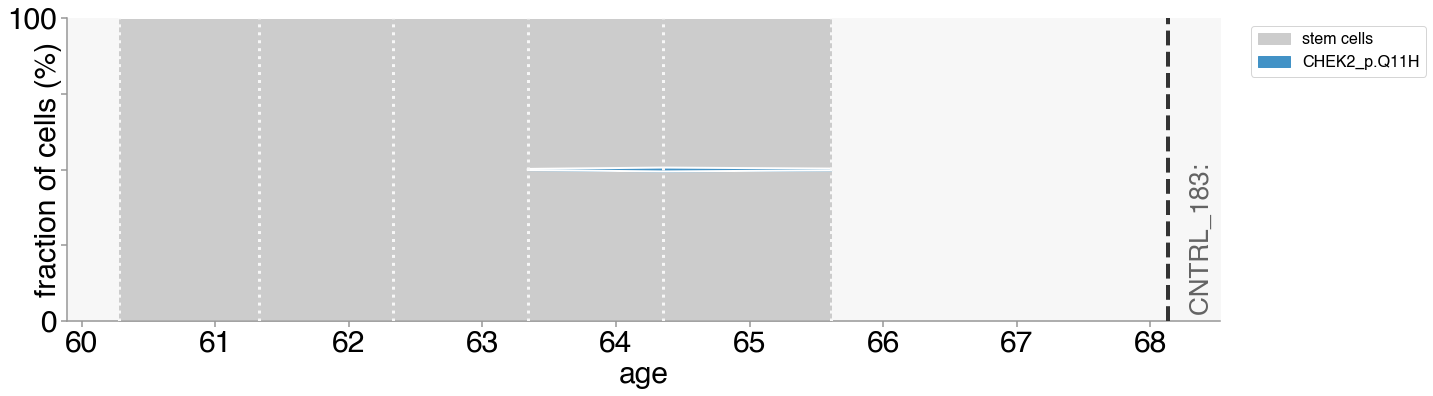

CHEK2_p.Q11H has 1 mutation and no descendents
undetectable timepoints =  [60.28, 61.33, 62.33]


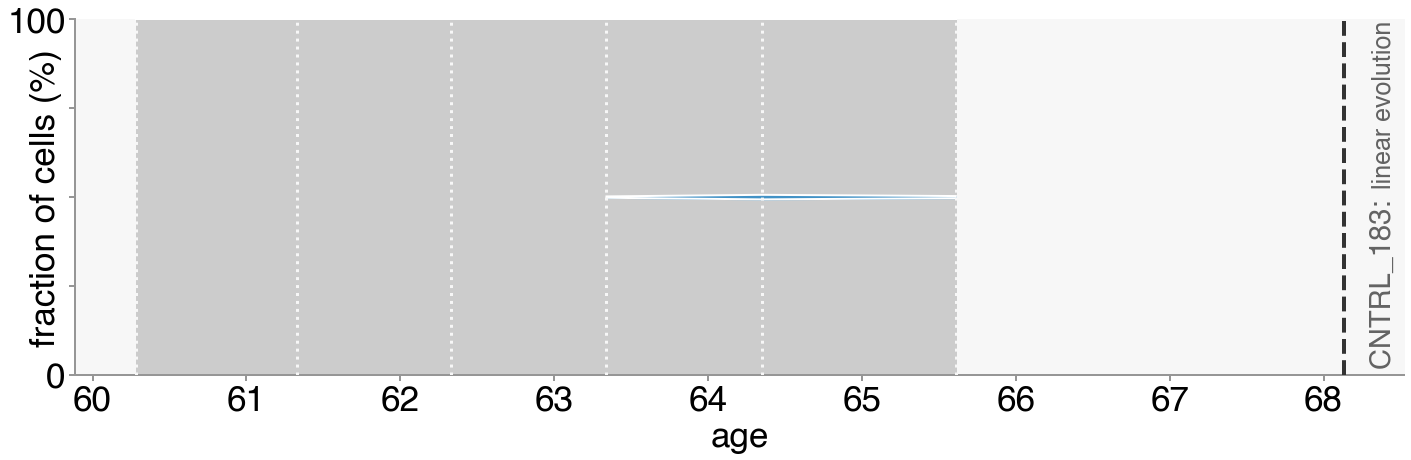

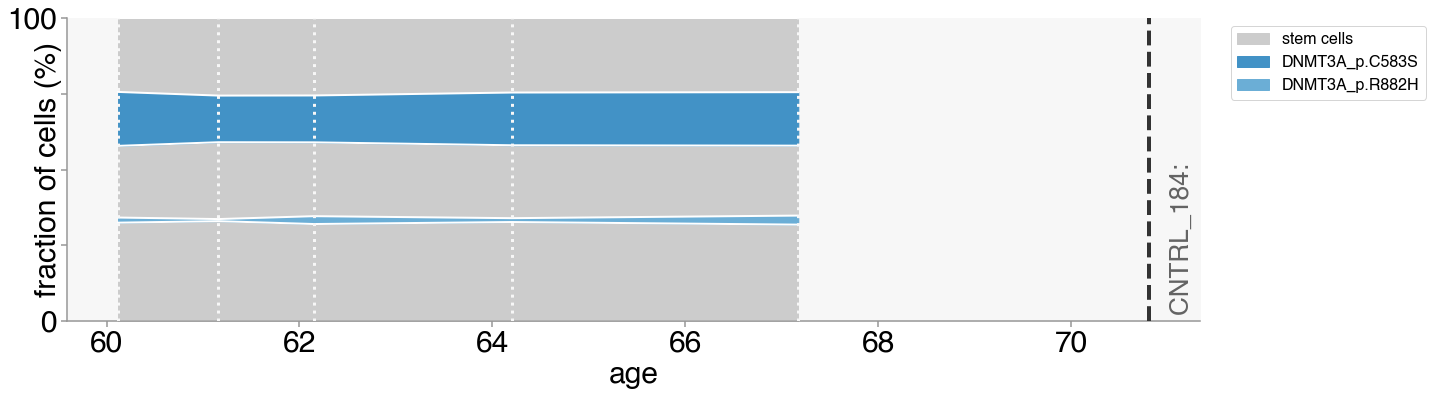

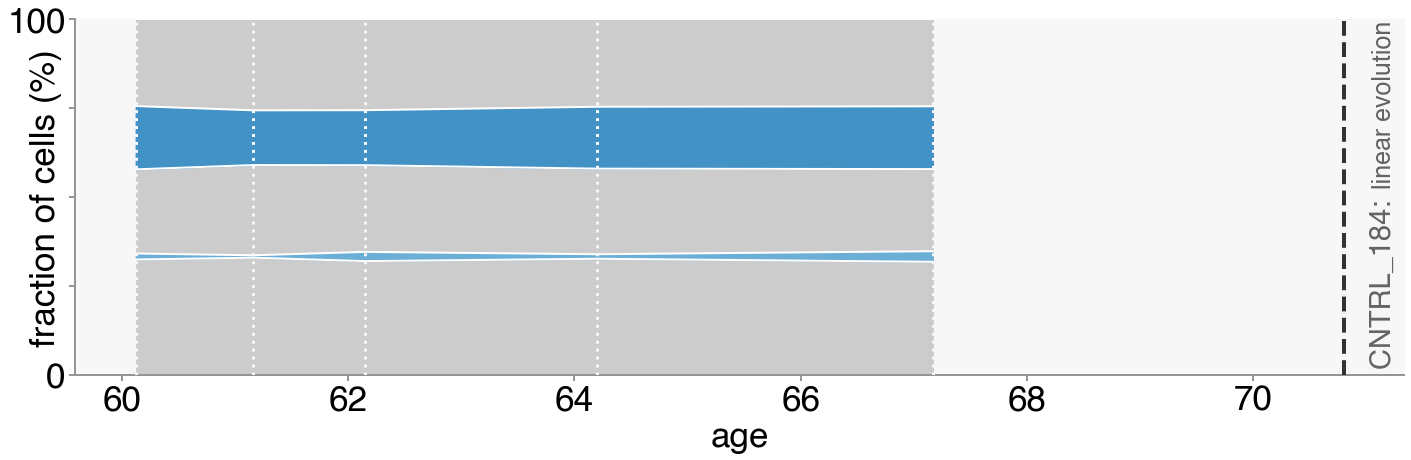

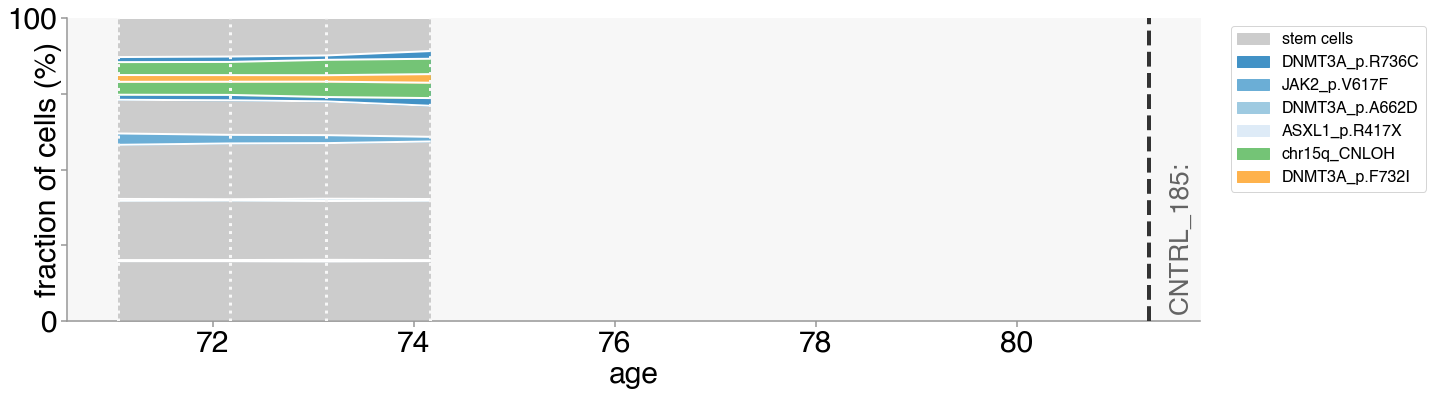

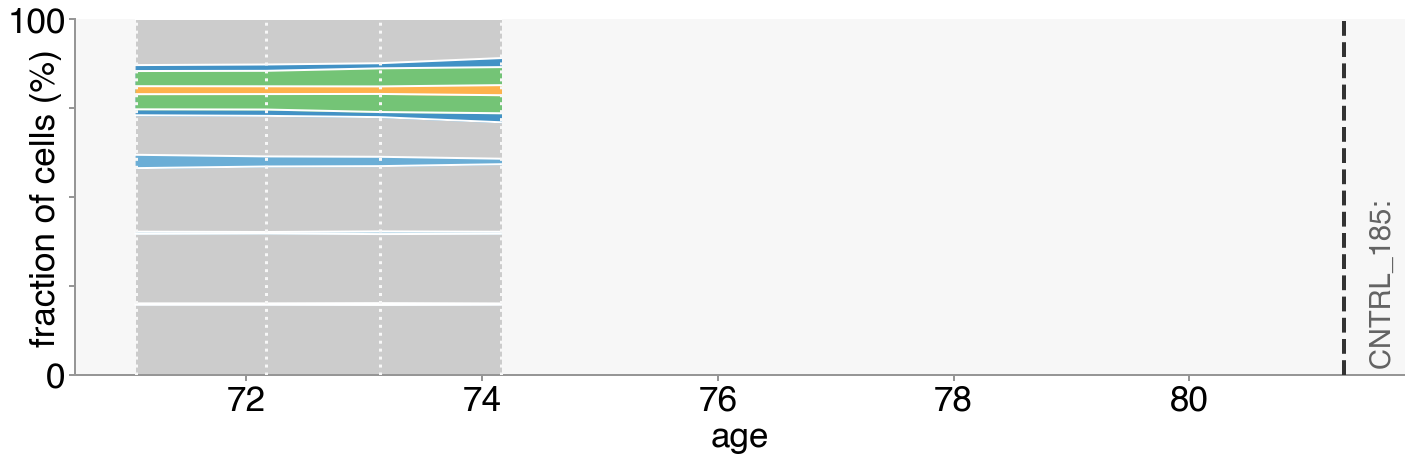

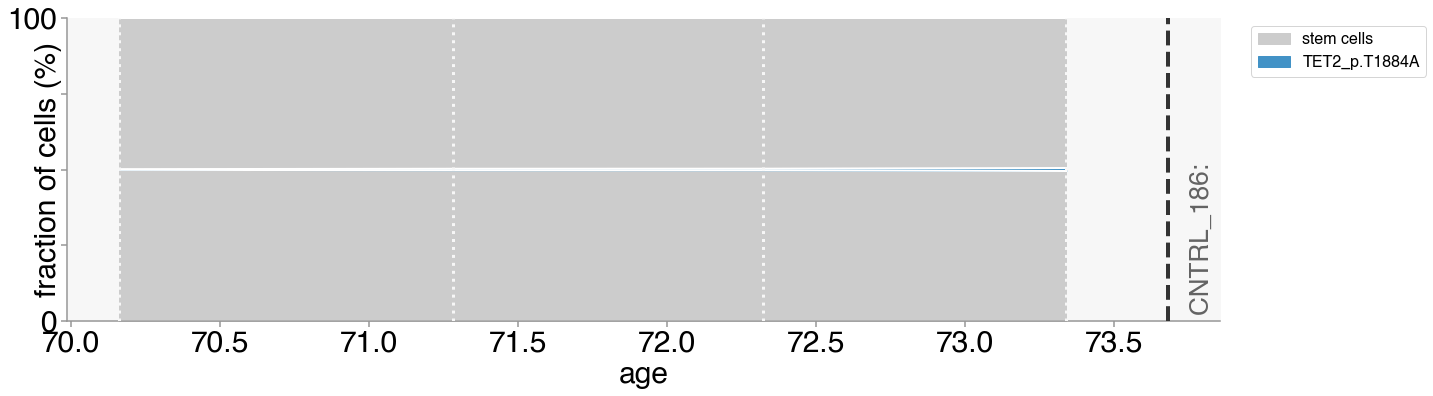

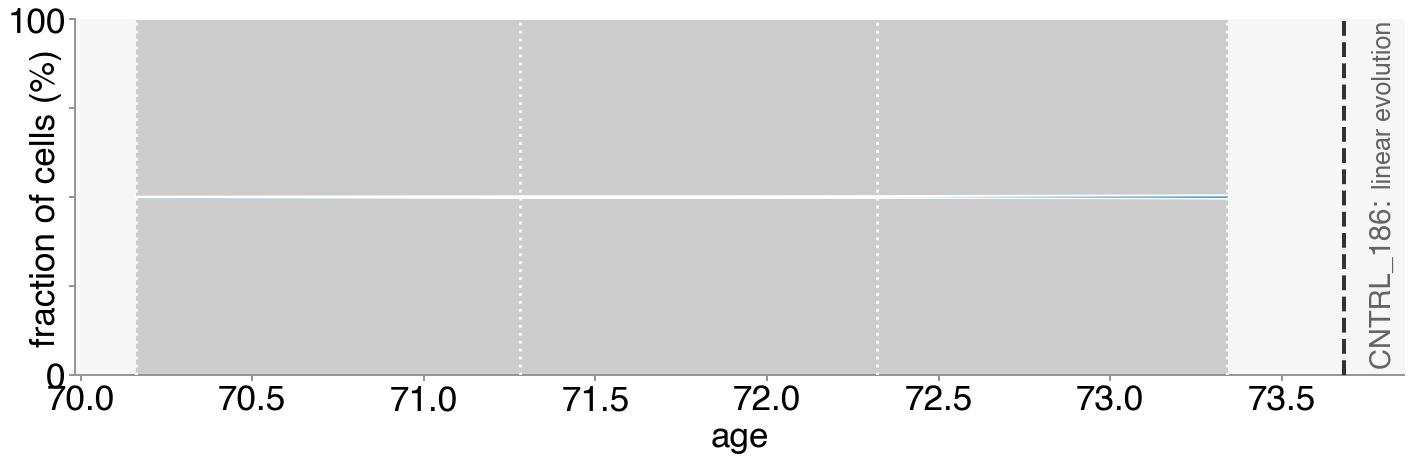

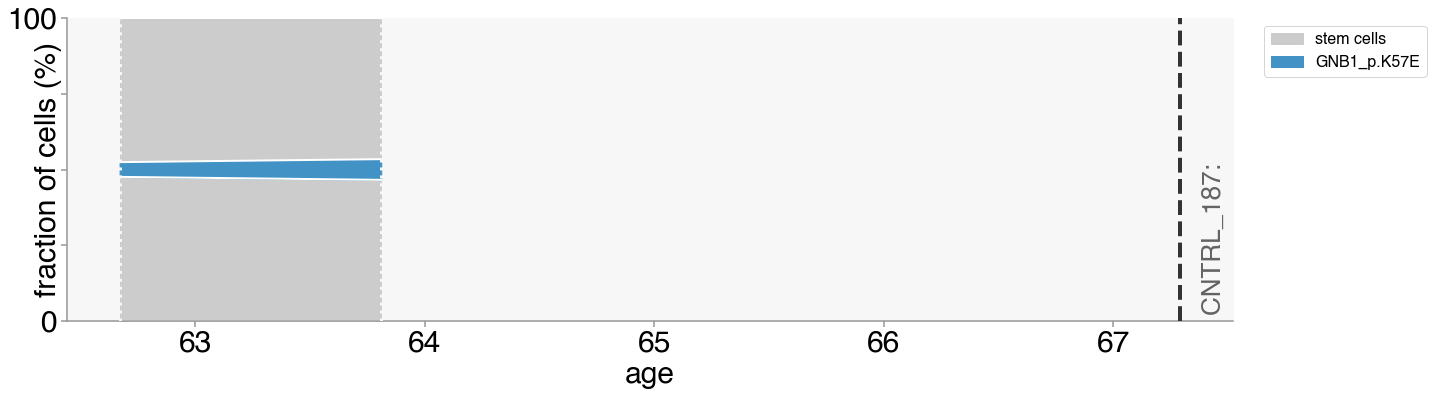

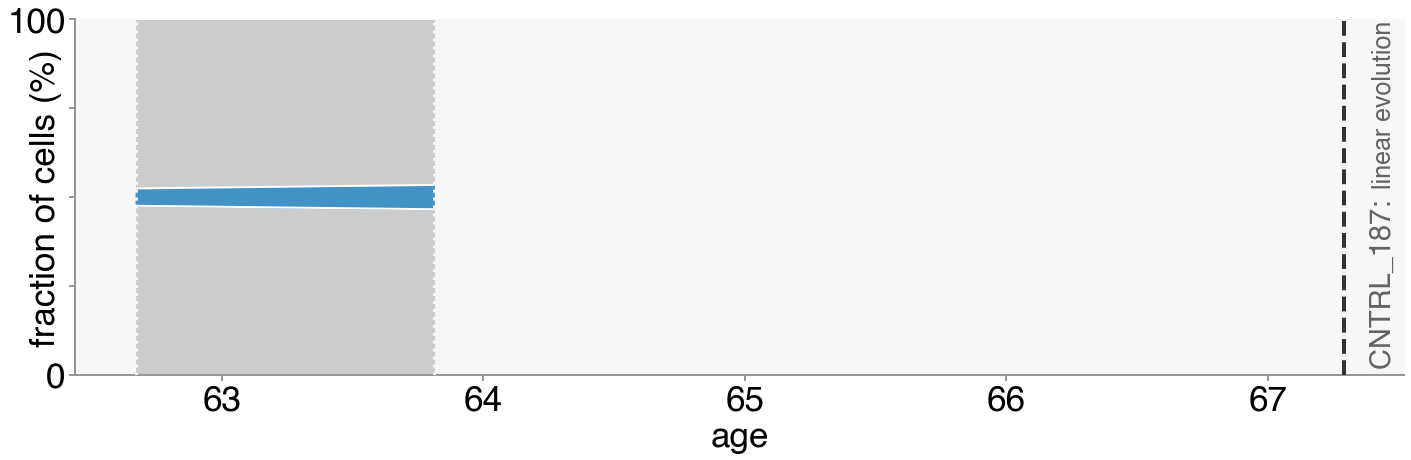

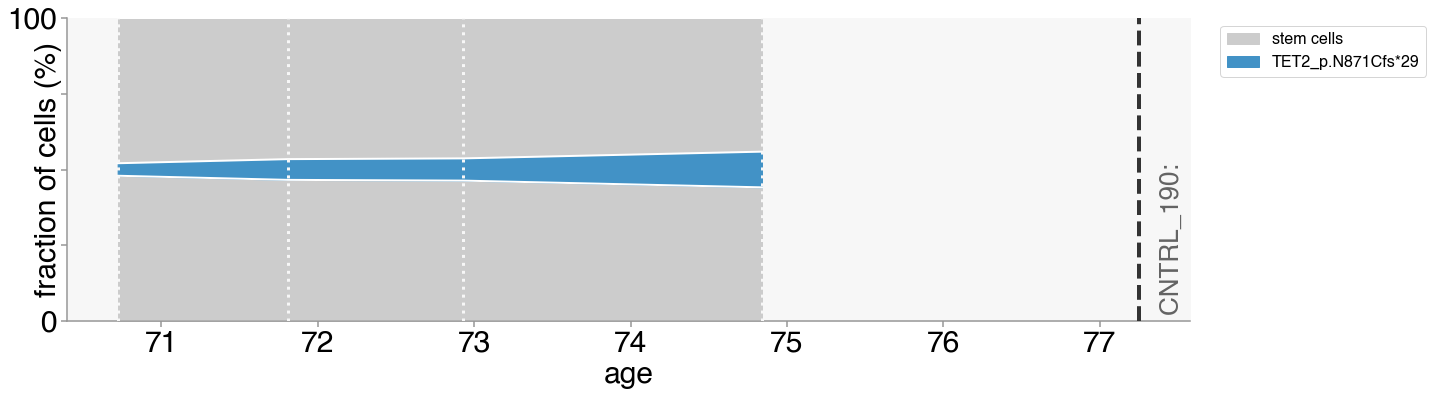

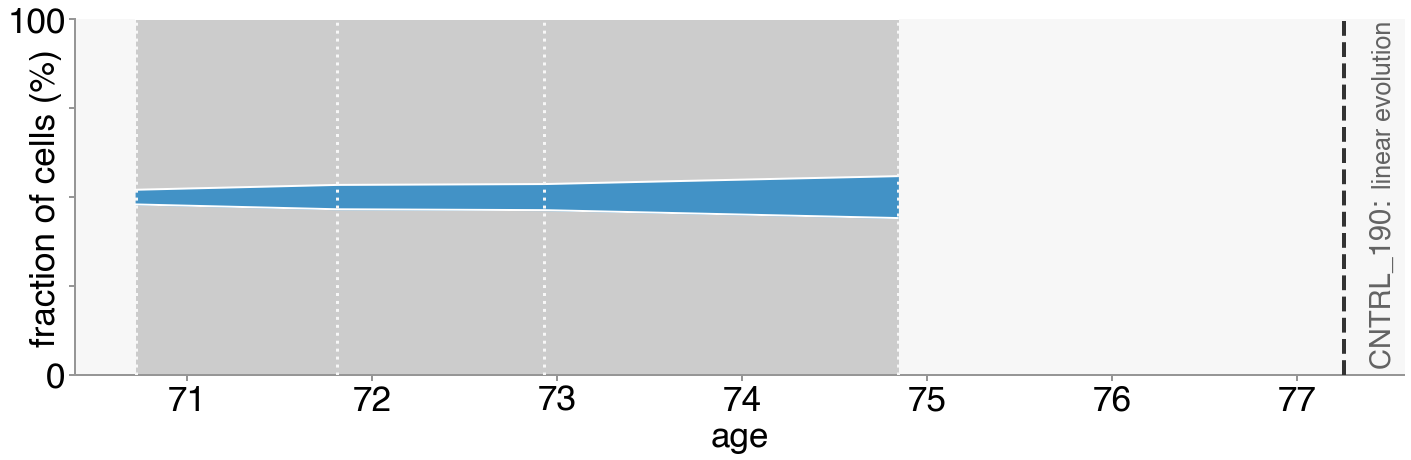

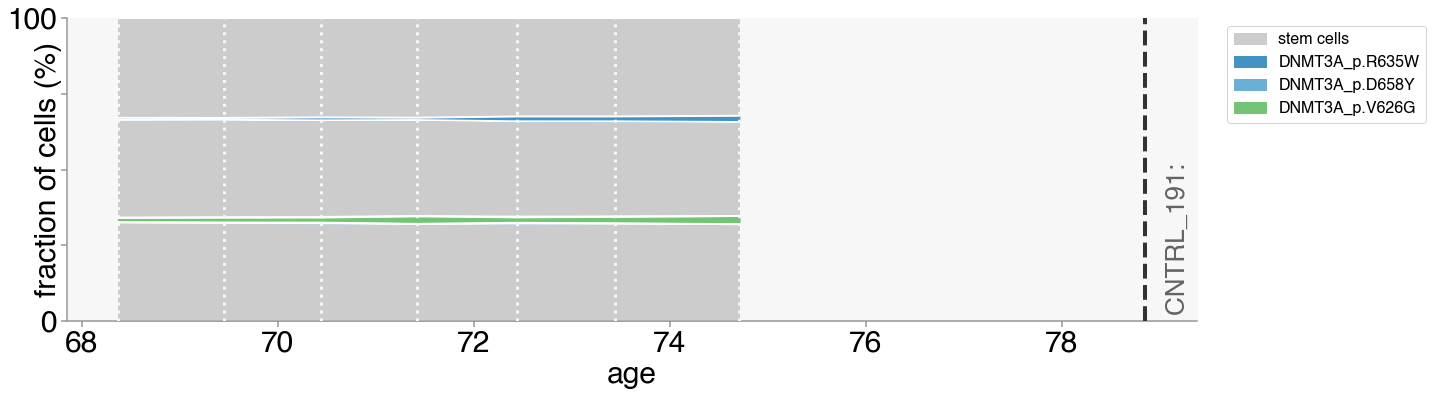

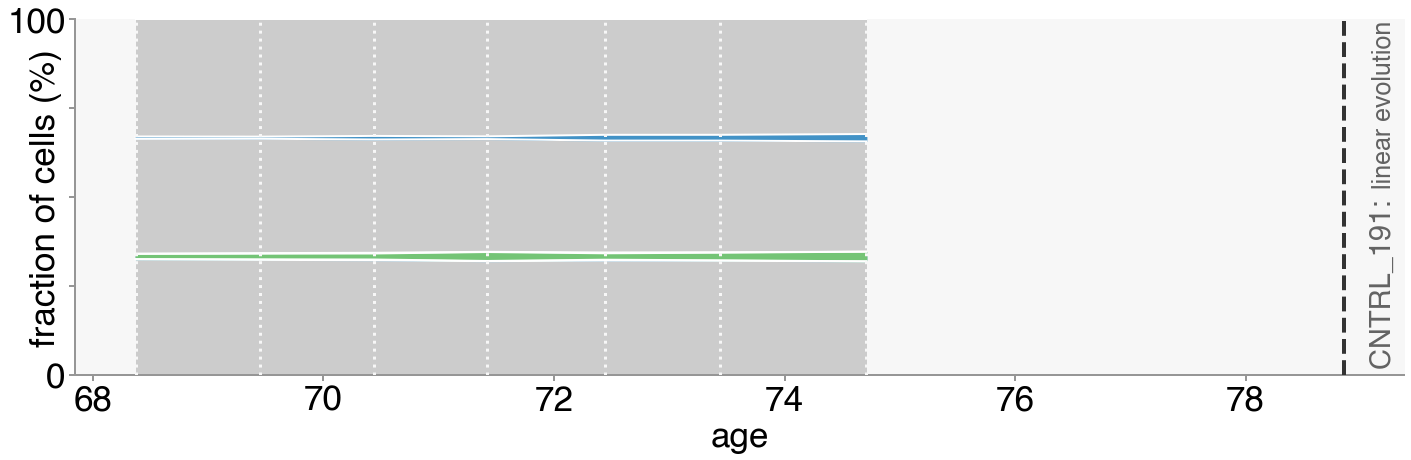

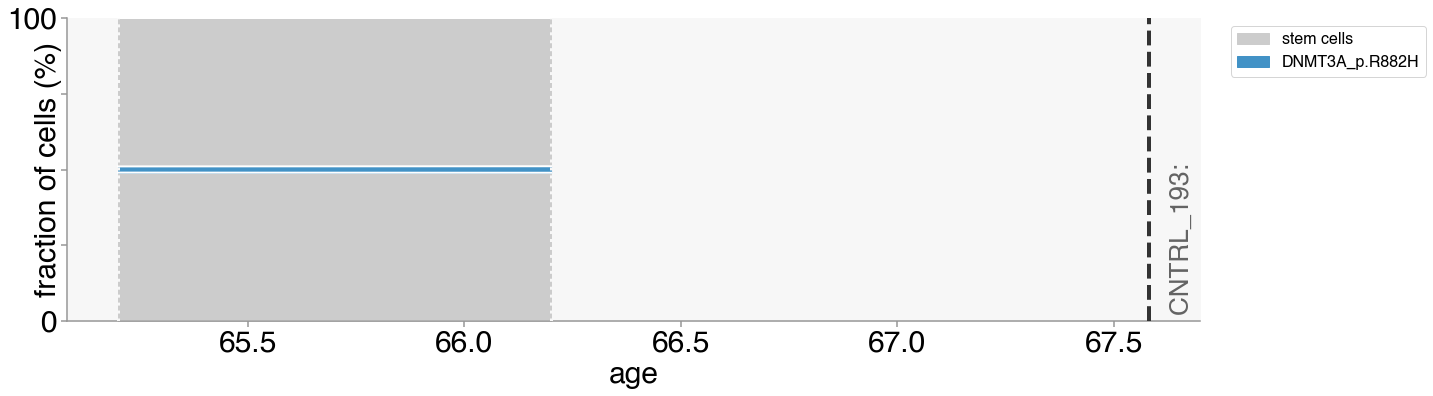

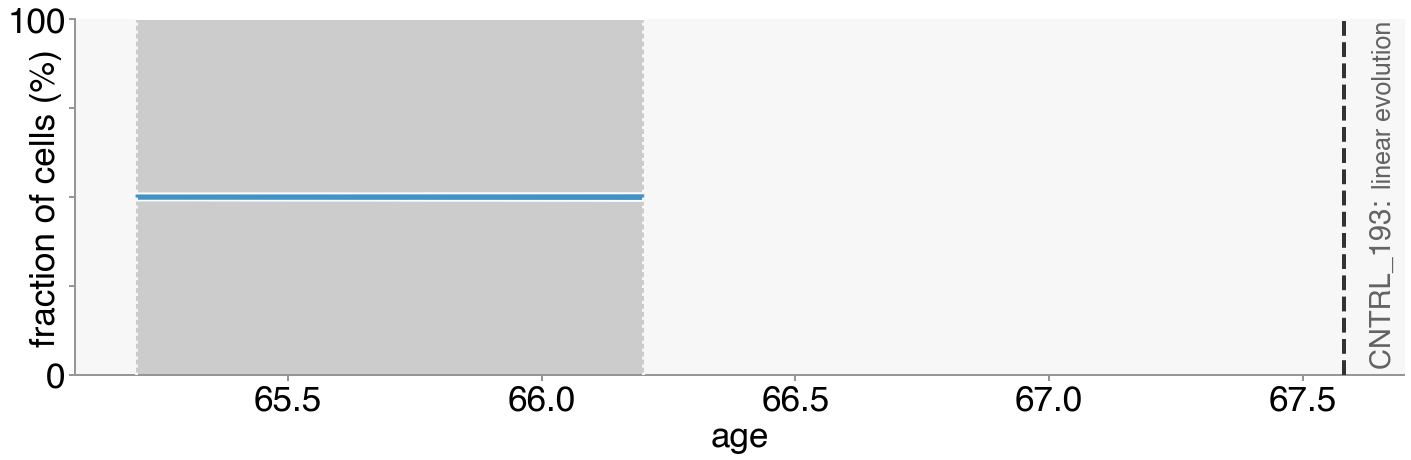

GNB1_p.R48M has 1 mutation and no descendents
undetectable timepoints =  [71.77, 72.95, 73.81, 74.92, 75.95, 77.96, 78.98]
GNB1_p.R48M only present at one age


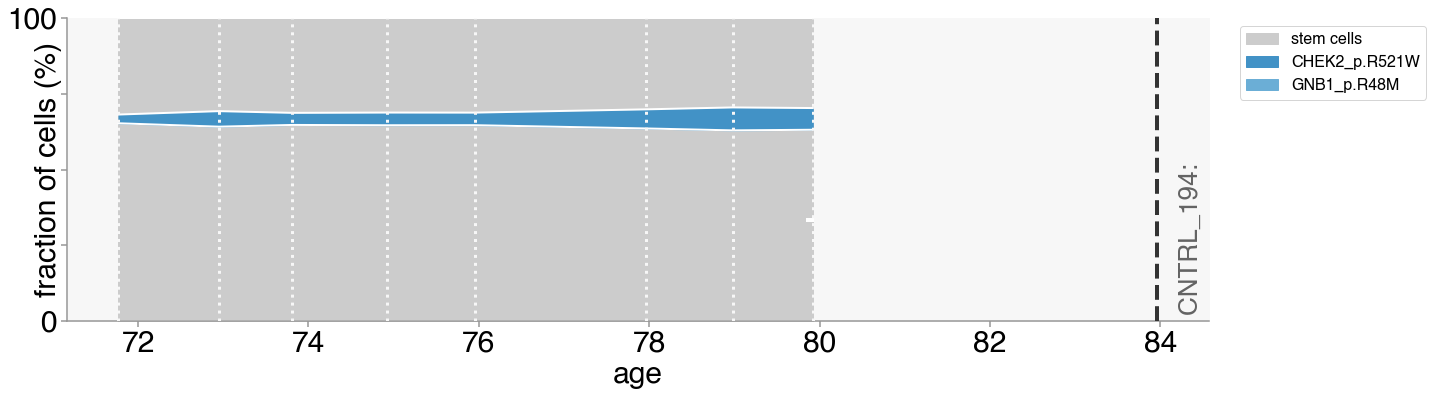

GNB1_p.R48M has 1 mutation and no descendents
undetectable timepoints =  [71.77, 72.95, 73.81, 74.92, 75.95, 77.96, 78.98]
GNB1_p.R48M only present at one age


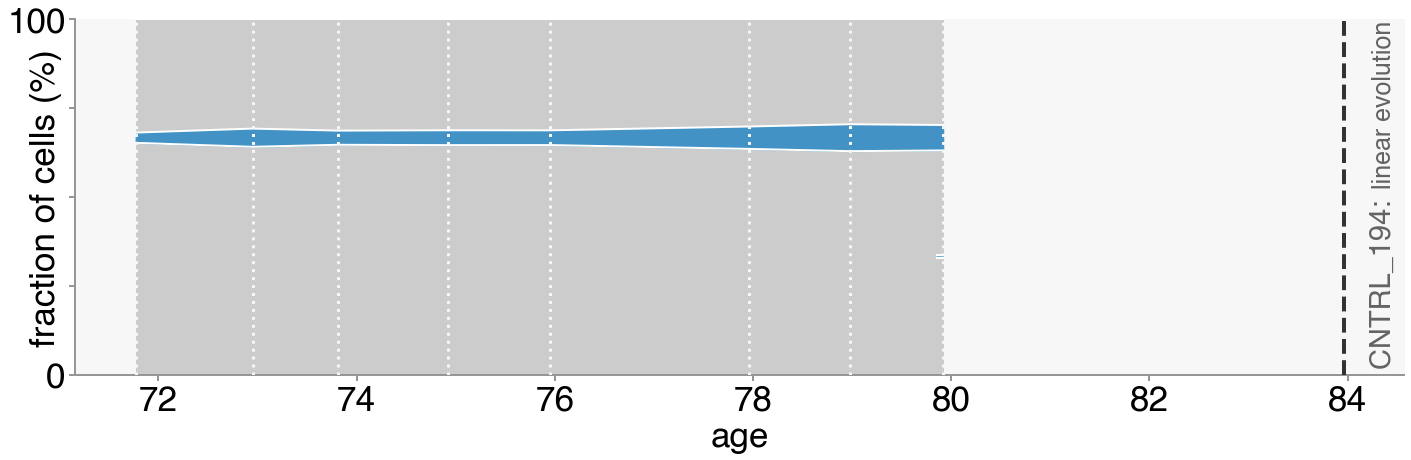

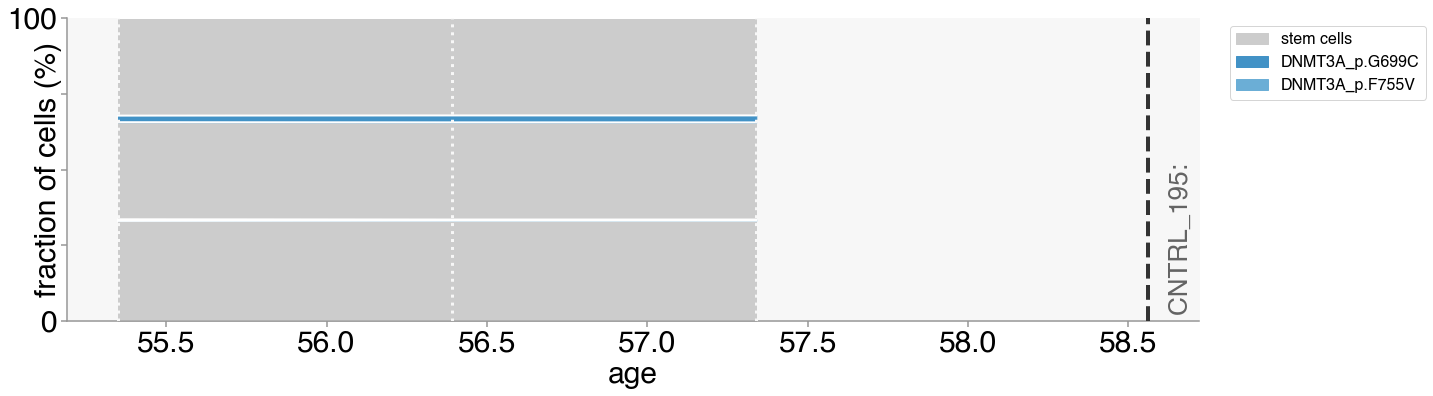

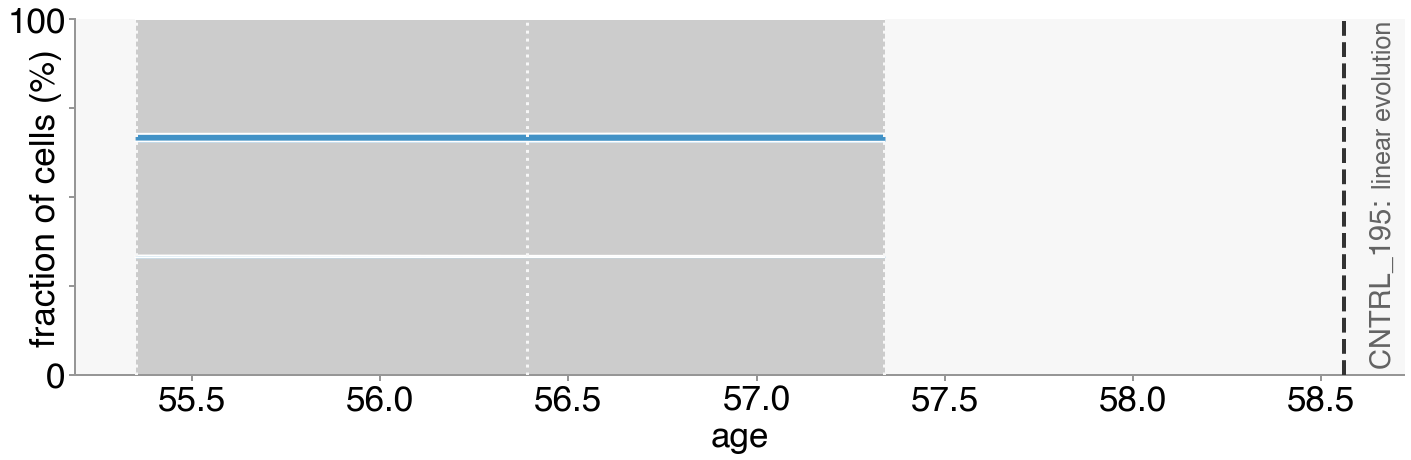

DNMT3A_p.L738P has 1 mutation and no descendents
undetectable timepoints =  [61.35, 62.51, 63.44, 64.57, 65.44]


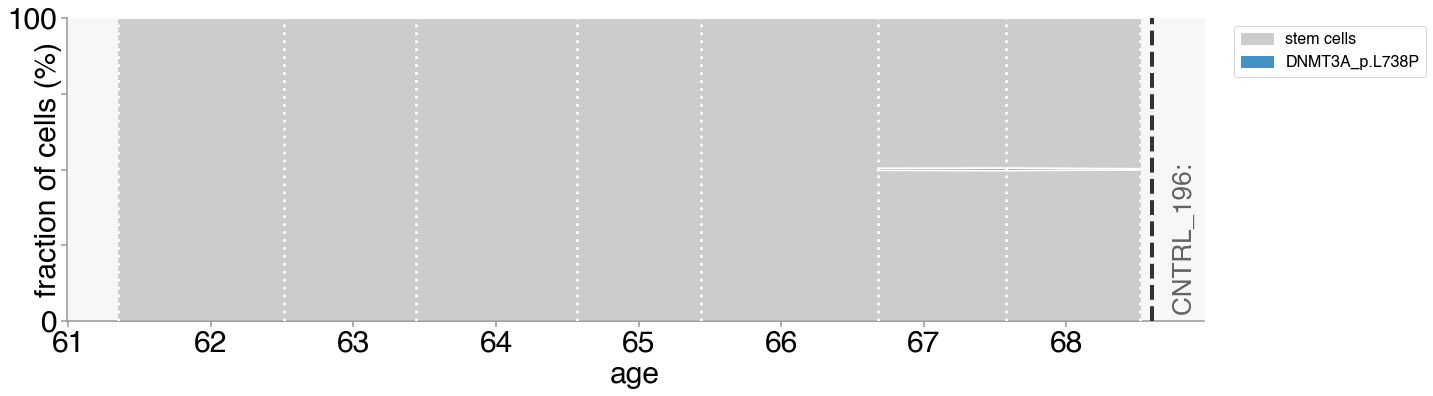

DNMT3A_p.L738P has 1 mutation and no descendents
undetectable timepoints =  [61.35, 62.51, 63.44, 64.57, 65.44]


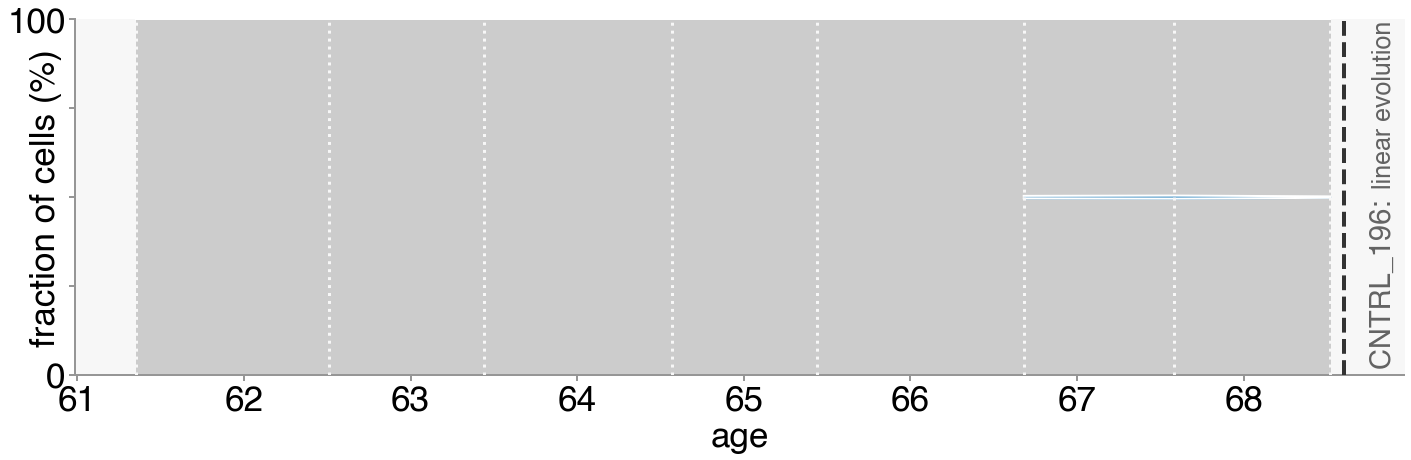

TET2_p.I1873T has 1 mutation and no descendents
undetectable timepoints =  [74.72]


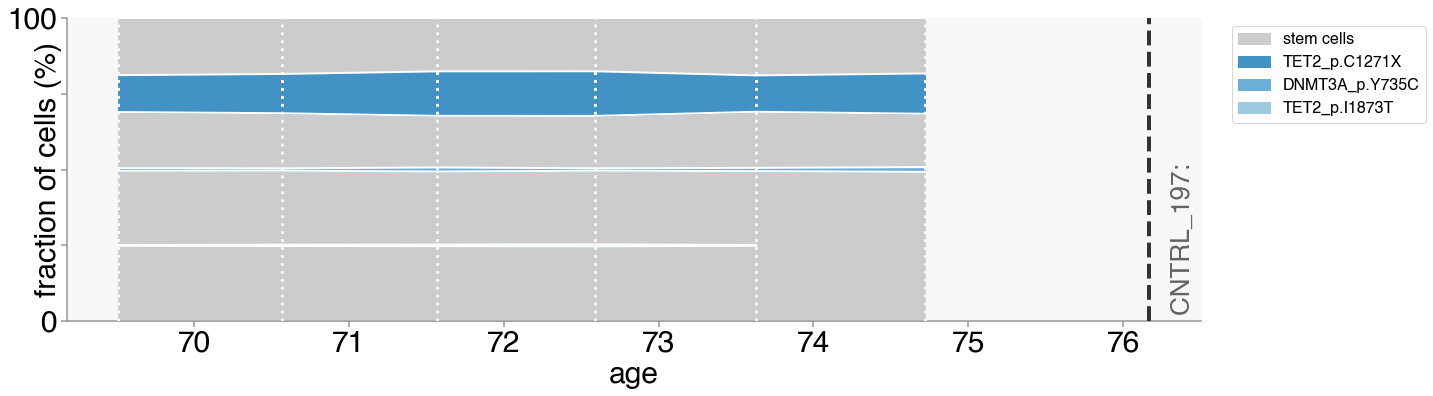

TET2_p.I1873T has 1 mutation and no descendents
undetectable timepoints =  [74.72]


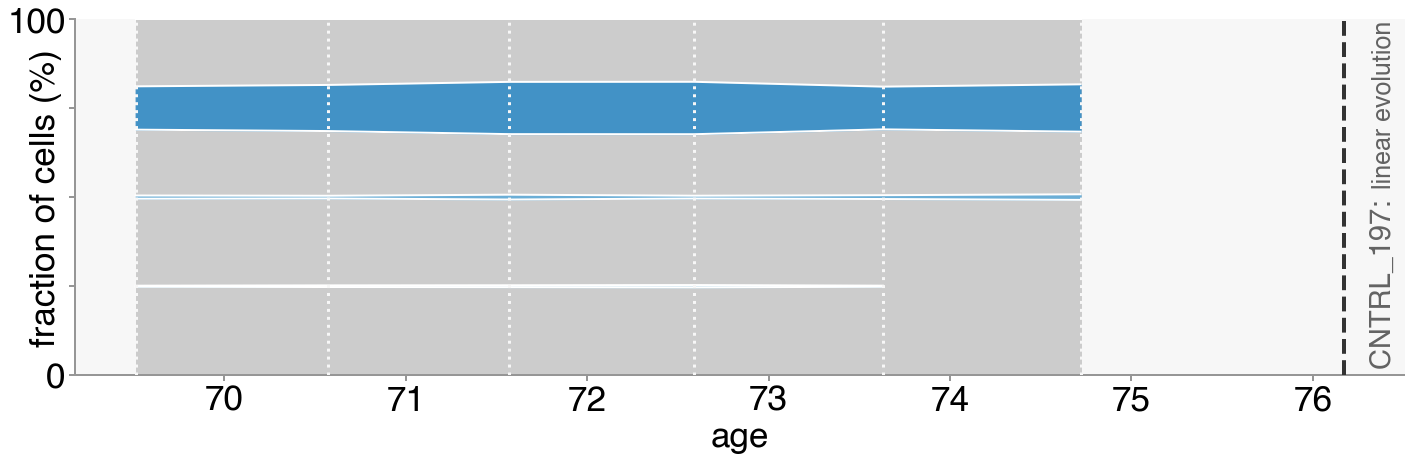

IDH2_p.R140W has 1 mutation and no descendents
undetectable timepoints =  [61.01, 61.86, 63.01, 64.07, 64.93, 66.92]
IDH2_p.R140W only present at one age


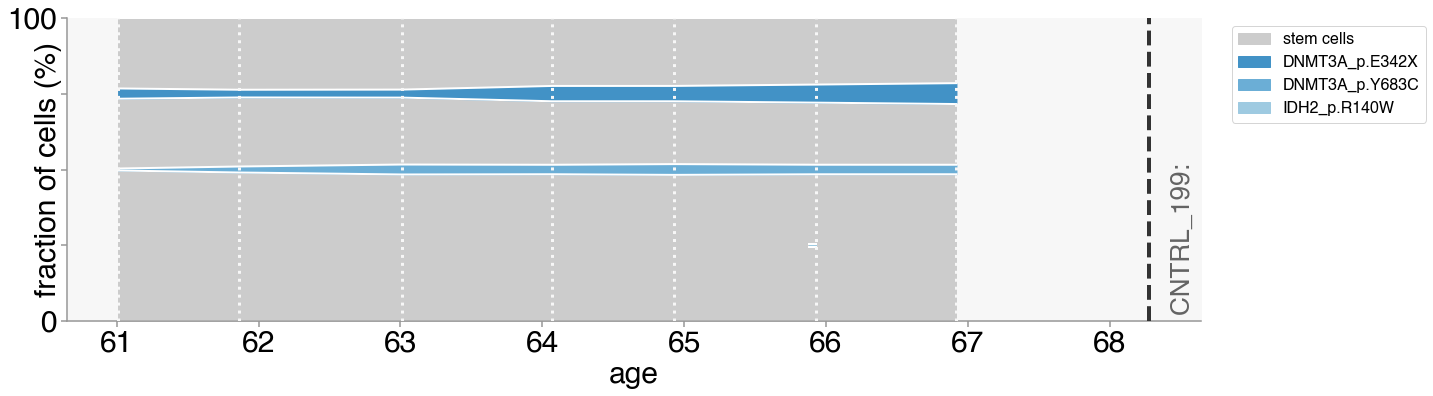

IDH2_p.R140W has 1 mutation and no descendents
undetectable timepoints =  [61.01, 61.86, 63.01, 64.07, 64.93, 66.92]
IDH2_p.R140W only present at one age


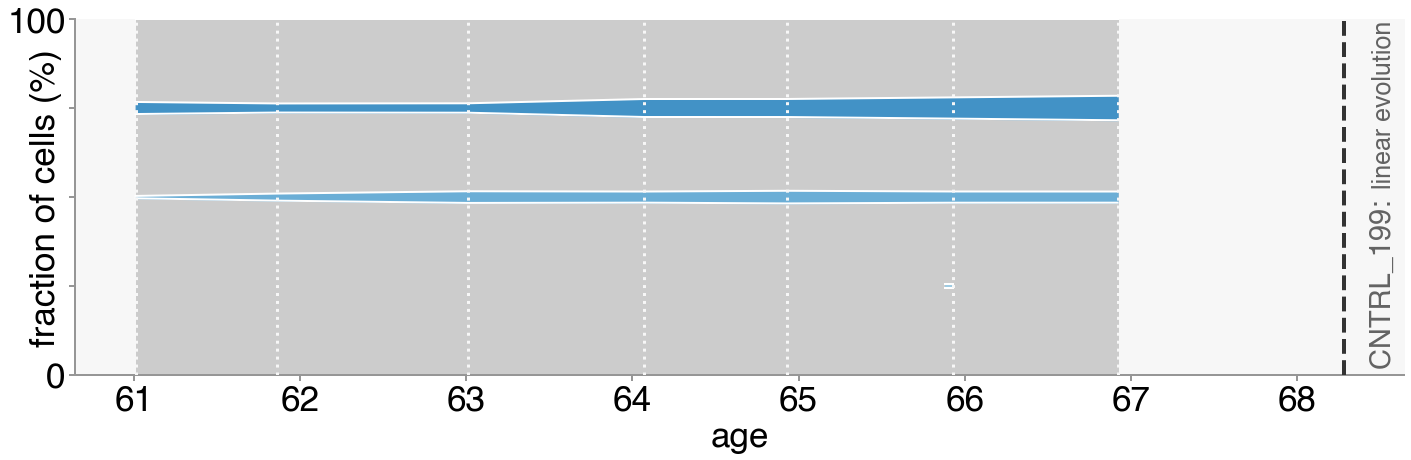

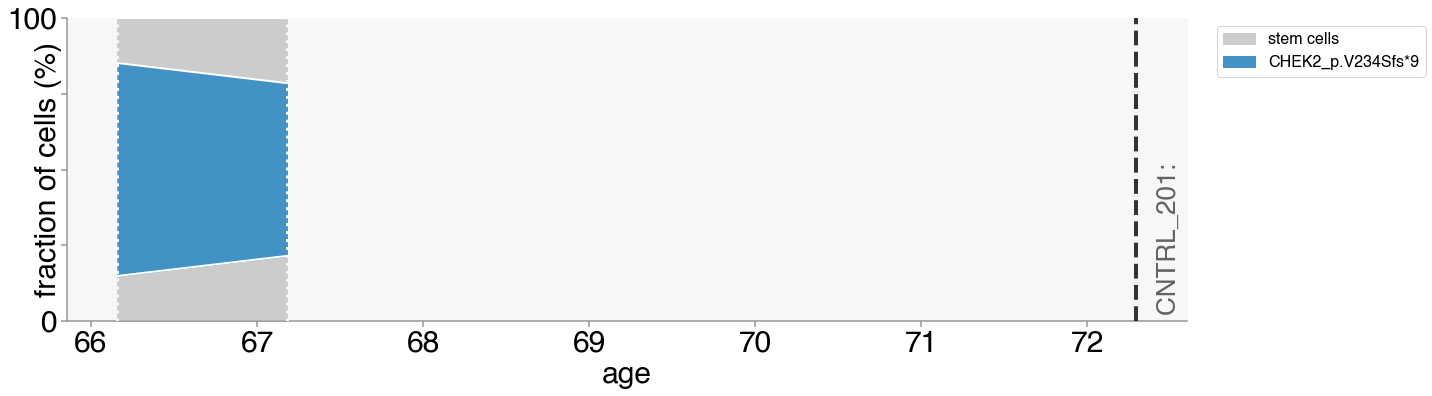

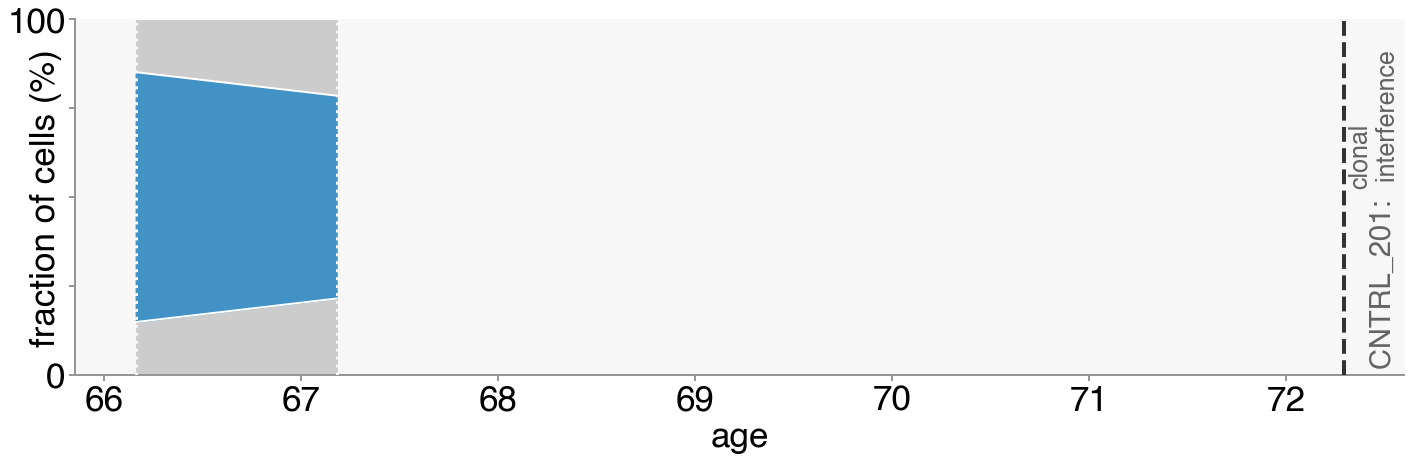

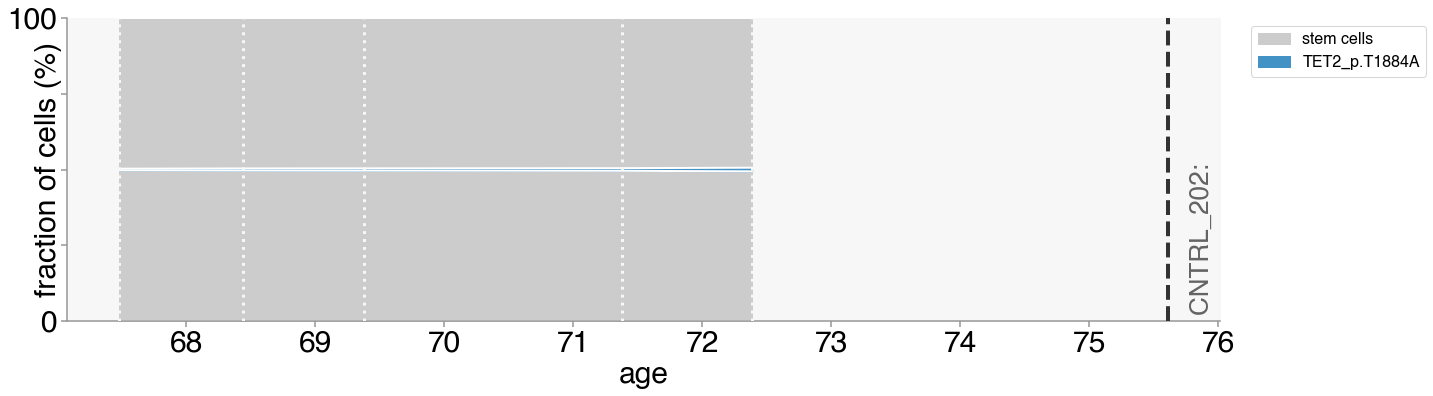

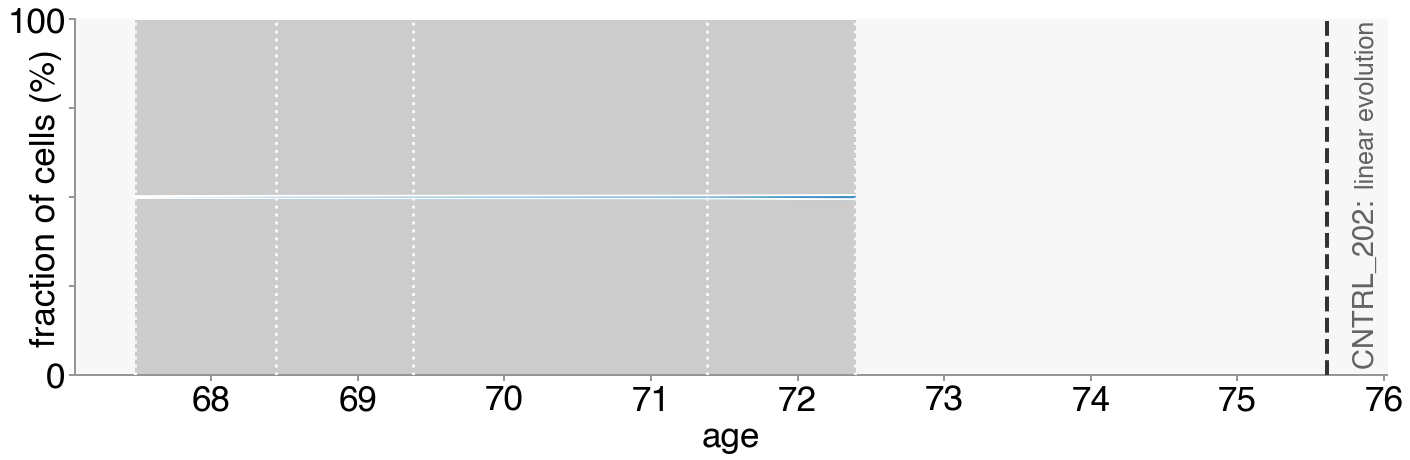

KRAS_p.K117N has 1 mutation and no descendents
undetectable timepoints =  [67.03, 68.14, 69.17, 70.09]
KRAS_p.K117N only present at one age


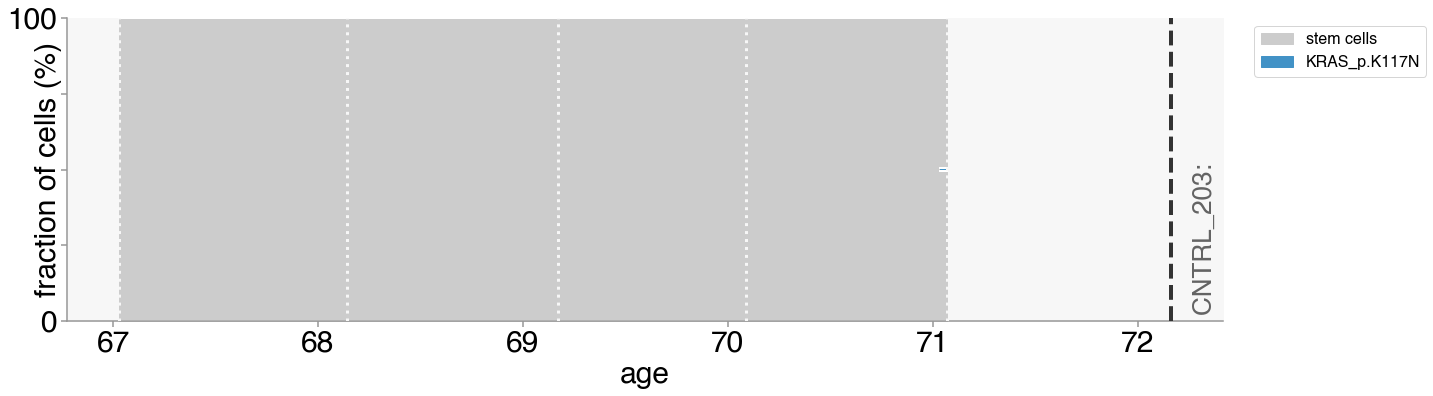

KRAS_p.K117N has 1 mutation and no descendents
undetectable timepoints =  [67.03, 68.14, 69.17, 70.09]
KRAS_p.K117N only present at one age


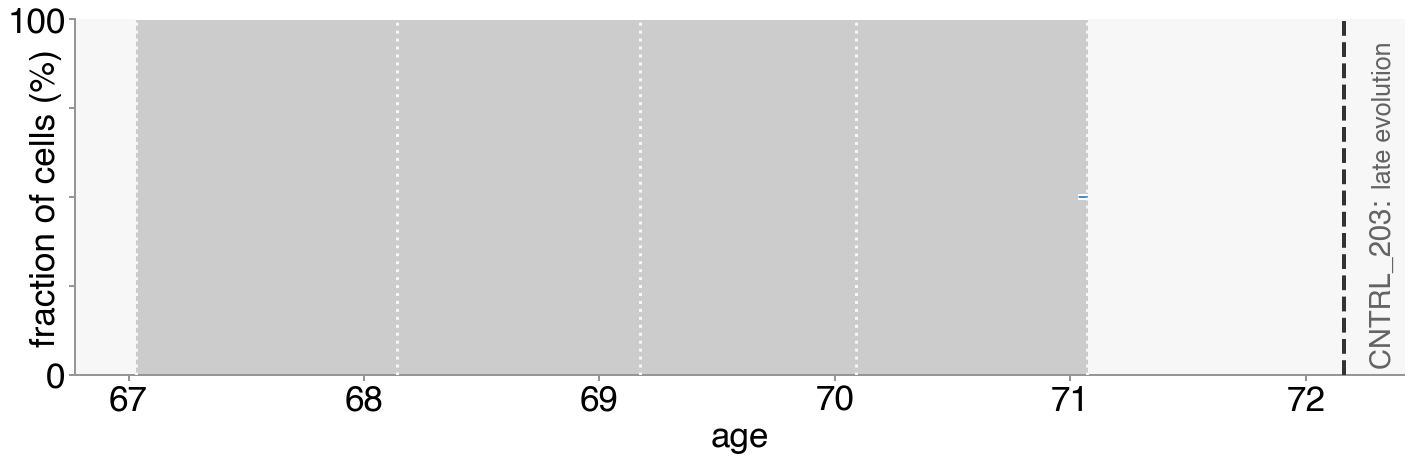

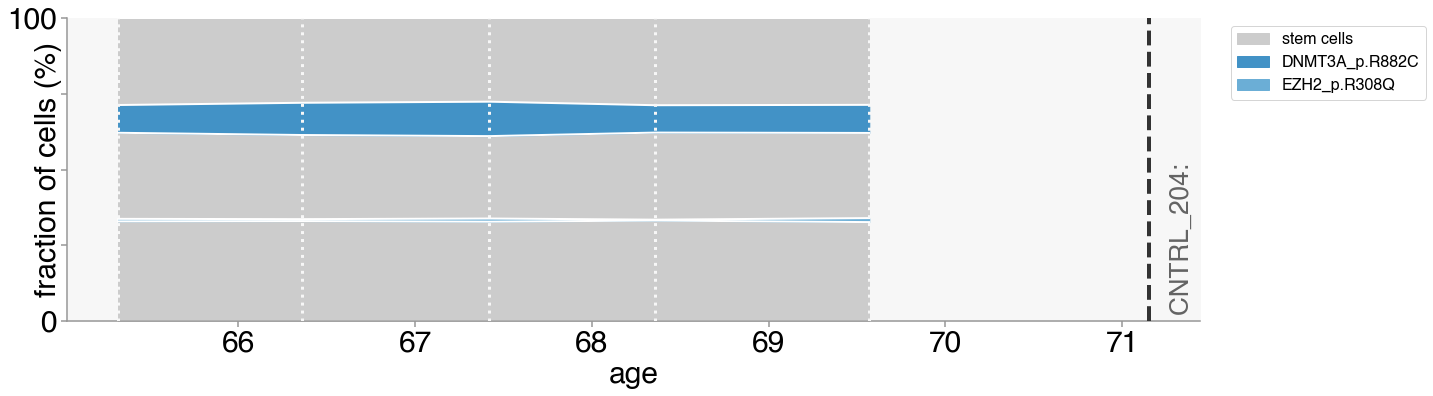

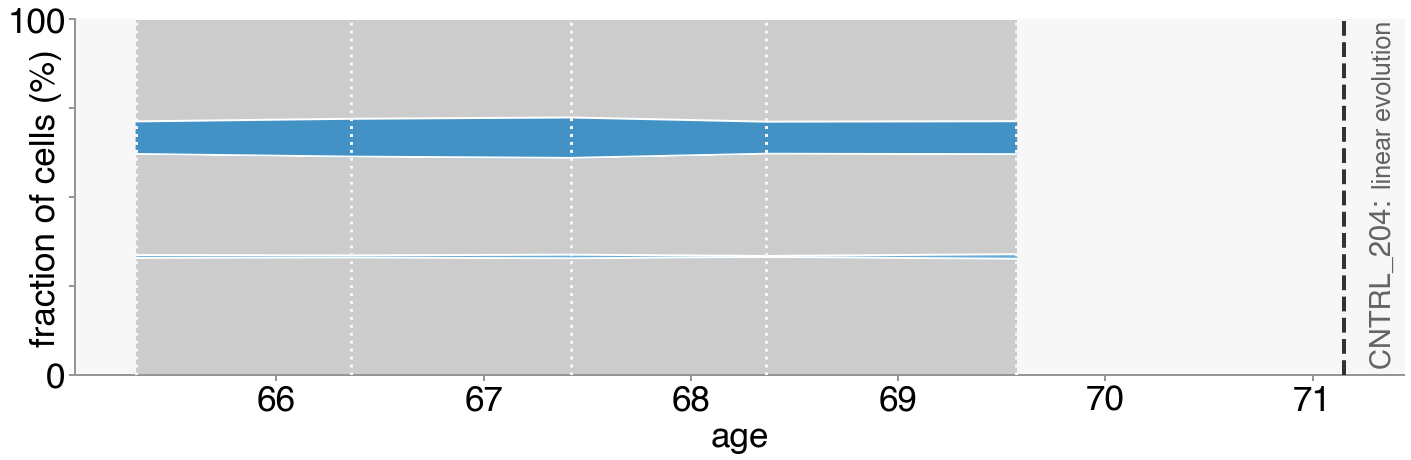

In [30]:
#Controls which don't need midline adjustment
controls_without_variants = []

for sample_name in controls:
    if sample_name not in ['CNTRL_192']:
        try:
            ages_list = sample_ages_sorted[sample_name]
            diagnosis_age = sample_diagnosis_age[sample_name]
            phylogeny = retrieve_phylogeny(sample_name)
            phylogeny = add_midline_shift(phylogeny, [0, 0, 0, 0, 0, 0, 0, 0])
            phylogeny = trajectory_colors(phylogeny)
            timepoints = cell_fraction_timepoints(phylogeny, ages_list)
            Muller_plot_v3_muller_colours(timepoints, phylogeny, sample_name, diagnosis_age)
            Muller_plot_v3_muller_colours_no_legend(timepoints, phylogeny, sample_name, diagnosis_age)
        except FileNotFoundError:
            controls_without_variants.append(sample_name)